# Machine Learning Engineer Nanodegree
## Capstone Project
# &#x1F4D1; &nbsp; P6: Sberbank Russian Housing Market

## Links and Code Library
- [Sberbank Russian Housing Market](https://www.kaggle.com/c/sberbank-russian-housing-market)
- [Model evaluation: quantifying the quality of predictions](http://scikit-learn.org/stable/modules/model_evaluation.html)

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: honeydew;} 
a {color: #31c831; font-family: 'Roboto';} 
h1 {color: forestgreen; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #ccc;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #ccc;}
h4 {color: #31c831; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #ccc;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: forestgreen;}      
div.output_stderr pre {background-color: ghostwhite;}  
div.output_stderr {background-color: slategrey;}                        
</style>
<script>
code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    };
    code_show = !code_show;
} 
$(document).ready(code_display);
</script>
<form action="javascript: code_display()">
<input style="color: forestgreen; background: honeydew; opacity: 0.8;" \ 
type="submit" value="Click to display or hide code cells">
</form>      

In [2]:
hide_code = ''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import scipy

import seaborn as sns
import matplotlib.pylab as plt

from random import random
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML, SVG

from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.model_selection import KFold, ParameterGrid, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

import keras as ks
from keras.models import Sequential, load_model, Model
from keras.optimizers import SGD, RMSprop
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [3]:
hide_code
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train)
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg

def history_plot(fit_history):
    plt.figure(figsize=(18, 12))
    
    plt.subplot(211)
    plt.plot(fit_history.history['loss'], color='#348ABD', label = 'train')
    plt.plot(fit_history.history['val_loss'], color='#228B22', label = 'test')
    plt.legend()
    plt.title('Loss Function');  
    
    plt.subplot(212)
    plt.plot(fit_history.history['mean_absolute_error'], color='#348ABD', label = 'train')
    plt.plot(fit_history.history['val_mean_absolute_error'], color='#228B22', label = 'test')
    plt.legend()
    plt.title('Mean Absolute Error');   

def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
    separator1, separator2 = '<_>'*18, '-'*10
    print(separator1, '\n', regressor, '\n'+separator1)
    print("EV score. Train: ", explained_variance_score(y_train, y_train_reg))
    print("EV score. Test: ", explained_variance_score(y_test, y_test_reg))
    print(separator2)
    print("R2 score. Train: ", r2_score(y_train, y_train_reg))
    print("R2 score. Test: ", r2_score(y_test, y_test_reg))
    print(separator2)
    print("MSE score. Train: ", mean_squared_error(y_train, y_train_reg))
    print("MSE score. Test: ", mean_squared_error(y_test, y_test_reg))
    print(separator2)
    print("MAE score. Train: ", mean_absolute_error(y_train, y_train_reg))
    print("MAE score. Test: ", mean_absolute_error(y_test, y_test_reg))
    print(separator2)
    print("MdAE score. Train: ", median_absolute_error(y_train, y_train_reg))
    print("MdAE score. Test: ", median_absolute_error(y_test, y_test_reg))
    
def scores2(regressor, target, target_predict):
    separator1, separator2 = '<_>'*18, '-'*10
    print(separator1, '\n', regressor, '\n'+separator1)
    print("EV score:", explained_variance_score(target, target_predict))
    print(separator2)
    print("R2 score:", r2_score(target, target_predict))
    print(separator2)
    print("MSE score:", mean_squared_error(target, target_predict))
    print(separator2)
    print("MAE score:", mean_absolute_error(target, target_predict))
    print(separator2)
    print("MdAE score:", median_absolute_error(target, target_predict))

## Capstone Proposal Overview 
In this capstone project proposal, prior to completing the following **Capstone Project**, we will leverage what we've learned throughout the Nanodegree program to author a proposal for solving a problem of our choice by applying machine learning algorithms and techniques. A project proposal encompasses seven key points: 

- The project's **domain background** : the field of research where the project is derived;
- A **problem statement** : a problem being investigated for which a solution will be defined;
- The **datasets and inputs** : data or inputs being used for the problem;
- A **solution statement** : a the solution proposed for the problem given;
- A **benchmark model** : some simple or historical model or result to compare the defined solution to;
- A set of **evaluation metrics** : functional representations for how the solution can be measured;
- An outline of the **project design** : how the solution will be developed and results obtained.

## Domain Background
**Housing costs** demand a significant investment from both consumers and developers. And when it comes to planning a budget—whether personal or corporate—the last thing anyone needs is uncertainty about one of their budgets expenses. Sberbank, Russia’s oldest and largest bank, helps their customers by making predictions about reality prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.

Although the housing market is relatively stable in Russia, the country’s volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as a number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.

## Problem Statement 
Sberbank is challenging programmers to develop algorithms which use a broad spectrum of features to predict real prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow Sberbank to provide more certainty to their customers in an uncertain economy.

## Datasets and Inputs
### Data Description (data_dictionary.txt)

In [4]:
hide_code
HTML('''<div id="data">
<p><iframe src="data_dictionary.txt" frameborder="3" height="300" width="99%"></iframe></p>
</div>''')

### Load and Display the Data

In [4]:
hide_code
macro = pd.read_csv('macro.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
hide_code
macro[100:110].T[1:15]

100        101        102        103        104  \
oil_urals                 82.87      82.87      82.87      82.87      82.87   
gdp_quart                9995.8     9995.8     9995.8     9995.8     9995.8   
gdp_quart_growth            4.1        4.1        4.1        4.1        4.1   
cpi                       319.8      319.8      319.8      319.8      319.8   
ppi                       350.2      350.2      350.2      350.2      350.2   
gdp_deflator                NaN        NaN        NaN        NaN        NaN   
balance_trade            16.604     16.604     16.604     16.604     16.604   
balance_trade_growth       14.1       14.1       14.1       14.1       14.1   
usdrub                  29.1525    29.0261       29.1    28.9194    29.0239   
eurrub                  39.2564    39.4051    39.5008    39.5233    39.3691   
brent                     84.83      84.77      84.72      86.15      87.17   
net_capital_export          NaN        NaN        NaN        NaN        NaN   
gdp_annual              38807.2    38807.2    38807.2    38807.2    38807.2   
gdp_annual_growth    -0.0782086 -0.0782086 -0.0782086 -0.0782086 -0.0782086   

                            105        106        107        108        109  
oil_urals                 82.87      82.87      82.87      82.87      82.87  
gdp_quart                9995.8     9995.8     9995.8     9995.8     9995.8  
gdp_quart_growth            4.1        4.1        4.1        4.1        4.1  
cpi                       319.8      319.8      319.8      319.8      319.8  
ppi                       350.2      350.2      350.2      350.2      350.2  
gdp_deflator                NaN        NaN        NaN        NaN        NaN  
balance_trade            16.604     16.604     16.604     16.604     16.604  
balance_trade_growth       14.1       14.1       14.1       14.1       14.1  
usdrub                   29.092     29.092     29.092    29.1835    29.1398  
eurrub                  39.2524    39.2524    39.2524    39.3214    39.1532  
brent                     85.99      85.99      85.99      84.23       84.8  
net_capital_export          NaN        NaN        NaN        NaN        NaN  
gdp_annual              38807.2    38807.2    38807.2    38807.2    38807.2  
gdp_annual_growth    -0.0782086 -0.0782086 -0.0782086 -0.0782086 -0.0782086

In [6]:
hide_code
train[200:208].T[1:15]

200             201         202             203  \
timestamp       2011-10-25      2011-10-25  2011-10-25      2011-10-25   
full_sq                 38              33          30              76   
life_sq                 19              14          18              51   
floor                   15               8           3               2   
max_floor              NaN             NaN         NaN             NaN   
material               NaN             NaN         NaN             NaN   
build_year             NaN             NaN         NaN             NaN   
num_room               NaN             NaN         NaN             NaN   
kitch_sq               NaN             NaN         NaN             NaN   
state                  NaN             NaN         NaN             NaN   
product_type    Investment      Investment  Investment      Investment   
sub_area      Horoshevskoe  Juzhnoe Butovo     Marfino  Juzhnoportovoe   
area_m         8.56843e+06     2.61551e+07  2.1044e+06     4.57959e+06   
raion_popul          56535          178264       26943           71715   

                               204          205          206  \
timestamp               2011-10-26   2011-10-26   2011-10-26   
full_sq                         44           35           72   
life_sq                         29           21           45   
floor                            8            5           10   
max_floor                      NaN          NaN          NaN   
material                       NaN          NaN          NaN   
build_year                     NaN          NaN          NaN   
num_room                       NaN          NaN          NaN   
kitch_sq                       NaN          NaN          NaN   
state                          NaN          NaN          NaN   
product_type            Investment   Investment   Investment   
sub_area      Vostochnoe Izmajlovo    Lefortovo   Krylatskoe   
area_m                     3.8e+06  8.99364e+06  1.21645e+07   
raion_popul                  76308        89971        78507   

                             207  
timestamp             2011-10-26  
full_sq                       32  
life_sq                       18  
floor                          6  
max_floor                    NaN  
material                     NaN  
build_year                   NaN  
num_room                     NaN  
kitch_sq                     NaN  
state                        NaN  
product_type          Investment  
sub_area      Chertanovo Juzhnoe  
area_m               9.28244e+06  
raion_popul               143661

## Solution Statement
### Selection of Features

In [7]:
hide_code
X_list_num = ['timestamp',
              'full_sq', 'num_room', 'area_m', 
              'kremlin_km', 'big_road2_km', 'big_road1_km',
              'workplaces_km',
              'stadium_km', 'swim_pool_km', 'fitness_km', 
              'detention_facility_km', 'cemetery_km',
              'radiation_km', 'oil_chemistry_km',
              'theater_km', 'exhibition_km', 'museum_km', 
              'park_km', 'public_healthcare_km',  
              'metro_min_walk','metro_km_avto', 
              'bus_terminal_avto_km', 'public_transport_station_min_walk',
              'railroad_station_walk_min', 'railroad_station_avto_km',
              'kindergarten_km', 'school_km', 'preschool_km',
              'university_km', 'additional_education_km',
              'shopping_centers_km', 'big_market_km',
              'ekder_all', 'work_all', 'young_all']

X_list_cat = ['sub_area', 'ID_metro', 
              'office_raion', 'sport_objects_raion',
              'raion_popul', 'healthcare_centers_raion',
              'school_education_centers_raion', 
              'preschool_education_centers_raion']

target_train = train['price_doc']

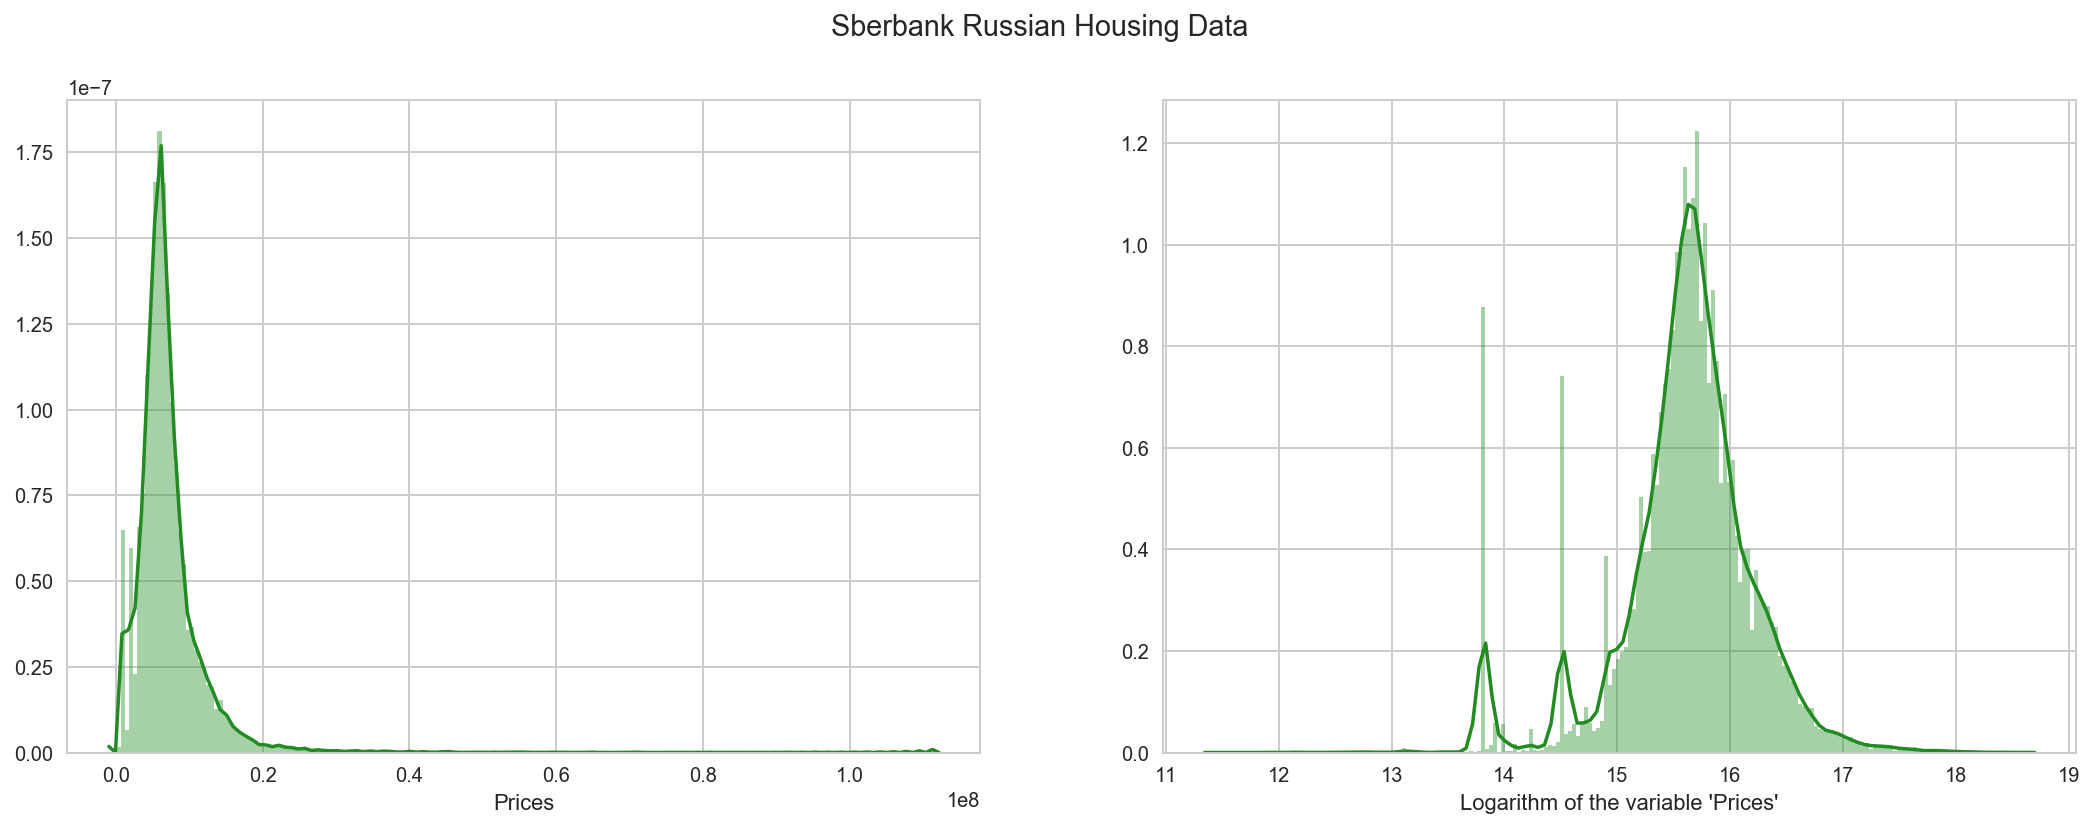

In [8]:
hide_code
plt.style.use('seaborn-whitegrid')
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

sns.distplot(target_train, bins=200, color='#228B22', ax=ax1)
ax1.set_xlabel("Prices")

sns.distplot(np.log(target_train), bins=200, color='#228B22', ax=ax2)
ax2.set_xlabel("Logarithm of the variable 'Prices'")

plt.suptitle('Sberbank Russian Housing Data');

In [9]:
hide_code
print ("Sberbank Russian Housing Dataset Statistics: \n")
print ("Number of houses = ", len(target_train))
print ("Number of features = ", len(list(train[X_list_num+X_list_cat].keys())))
print ("Minimum house price = ", np.min(target_train))
print ("Maximum house price = ", np.max(target_train))
print ("Mean house price = ", "%.2f" % np.mean(target_train))
print ("Median house price = ", "%.2f" % np.median(target_train))
print ("Standard deviation of house prices =", "%.2f" % np.std(target_train))

Sberbank Russian Housing Dataset Statistics: 

Number of houses =  30471
Number of features =  44
Minimum house price =  100000
Maximum house price =  111111112
Mean house price =  7123035.28
Median house price =  6274411.00
Standard deviation of house prices = 4780032.89


### Fill in Missing Values

In [10]:
hide_code
train[X_list_num].isnull().sum()

timestamp                               0
full_sq                                 0
num_room                             9572
area_m                                  0
kremlin_km                              0
big_road2_km                            0
big_road1_km                            0
workplaces_km                           0
stadium_km                              0
swim_pool_km                            0
fitness_km                              0
detention_facility_km                   0
cemetery_km                             0
radiation_km                            0
oil_chemistry_km                        0
theater_km                              0
exhibition_km                           0
museum_km                               0
park_km                                 0
public_healthcare_km                    0
metro_min_walk                         25
metro_km_avto                           0
bus_terminal_avto_km                    0
public_transport_station_min_walk 

In [11]:
hide_code
test[X_list_num].isnull().sum()

timestamp                             0
full_sq                               0
num_room                              0
area_m                                0
kremlin_km                            0
big_road2_km                          0
big_road1_km                          0
workplaces_km                         0
stadium_km                            0
swim_pool_km                          0
fitness_km                            0
detention_facility_km                 0
cemetery_km                           0
radiation_km                          0
oil_chemistry_km                      0
theater_km                            0
exhibition_km                         0
museum_km                             0
park_km                               0
public_healthcare_km                  0
metro_min_walk                       34
metro_km_avto                         0
bus_terminal_avto_km                  0
public_transport_station_min_walk     0
railroad_station_walk_min            34


In [12]:
hide_code
df_train = pd.DataFrame(train, columns=X_list_num)
df_train_cat = pd.DataFrame(train, columns=X_list_num+X_list_cat)

df_test = pd.DataFrame(test, columns=X_list_num)
df_test_cat = pd.DataFrame(test, columns=X_list_num+X_list_cat)

df_train['prices'] = target_train
df_train_cat['prices'] = target_train

df_train = df_train.dropna(subset=['num_room'])
df_train_cat = df_train_cat.dropna(subset=['num_room'])

df_train['metro_min_walk'] = \
df_train['metro_min_walk'].interpolate(method='linear')
df_train_cat['metro_min_walk'] = \
df_train_cat['metro_min_walk'].interpolate(method='linear')

df_train['railroad_station_walk_min'] = \
df_train['railroad_station_walk_min'].interpolate(method='linear')
df_train_cat['railroad_station_walk_min'] = \
df_train_cat['railroad_station_walk_min'].interpolate(method='linear')

df_test['metro_min_walk'] = \
df_test['metro_min_walk'].interpolate(method='linear')
df_test_cat['metro_min_walk'] = \
df_test_cat['metro_min_walk'].interpolate(method='linear')

df_test['railroad_station_walk_min'] = \
df_test['railroad_station_walk_min'].interpolate(method='linear')
df_test_cat['railroad_station_walk_min'] = \
df_test_cat['railroad_station_walk_min'].interpolate(method='linear')

len(df_train)

20899

### Categorical and Macro Features
#### Add the Macro Feature

In [13]:
hide_code
usdrub_pairs = dict(zip(list(macro['timestamp']), list(macro['usdrub'])))
# salary_pairs = dict(zip(list(macro['timestamp']), list(macro['salary'])))

df_train['timestamp'].replace(usdrub_pairs,inplace=True)
df_train_cat['timestamp'].replace(usdrub_pairs,inplace=True)

df_test['timestamp'].replace(usdrub_pairs,inplace=True)
df_test_cat['timestamp'].replace(usdrub_pairs,inplace=True)

df_train.rename(columns={'timestamp' : 'usdrub'}, inplace=True)
df_train_cat.rename(columns={'timestamp' : 'usdrub'}, inplace=True)

df_test.rename(columns={'timestamp' : 'usdrub'}, inplace=True)
df_test_cat.rename(columns={'timestamp' : 'usdrub'}, inplace=True)

#### Preprocess Categorical Features

In [14]:
hide_code
separator = '<_>'*38
for df in [df_train_cat, df_test_cat]:
    print ('\n', separator)
    
    print('\nsub area')
    print('Number of categories:', len(set(df['sub_area'])))
    print(set(df['sub_area']))

    print('\nID metro')
    print('Number of categories:', len(set(df['ID_metro'])))
    print(set(df['ID_metro']))

    print('\noffice raion')
    print('Number of categories:', len(set(df['office_raion'])))
    print(set(df['office_raion']))

    print('\nsport objects raion')
    print('Number of categories:', len(set(df['sport_objects_raion'])))
    print(set(df_train_cat['sport_objects_raion']))

    print('\nraion popul')
    print('Number of categories:', len(set(df['raion_popul'])))
    print(set(df['raion_popul']))

    print('\nhealthcare centers raion')
    print('Number of categories:', len(set(df_train_cat['healthcare_centers_raion'])))
    print(set(df['healthcare_centers_raion']))

    print('\nschool education centers raion')
    print('Number of categories:', len(set(df['school_education_centers_raion'])))
    print(set(df['school_education_centers_raion']))

    print('\npreschool education centers raion')
    print('Number of categories:', len(set(df['preschool_education_centers_raion'])))
    print(set(df['preschool_education_centers_raion']))


 <_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>

sub area
Number of categories: 146
{'Poselenie Rjazanovskoe', 'Losinoostrovskoe', 'Presnenskoe', 'Marfino', 'Veshnjaki', 'Meshhanskoe', "Mar'ina Roshha", 'Kotlovka', 'Birjulevo Vostochnoe', "Gol'janovo", 'Ramenki', 'Fili Davydkovo', 'Teplyj Stan', 'Levoberezhnoe', 'Poselenie Marushkinskoe', 'Jaroslavskoe', 'Arbat', "Moskvorech'e-Saburovo", 'Zapadnoe Degunino', 'Bibirevo', 'Ljublino', 'Nekrasovka', 'Hovrino', 'Pechatniki', 'Butyrskoe', 'Ostankinskoe', 'Rostokino', 'Horoshevskoe', 'Akademicheskoe', 'Taganskoe', 'Poselenie Filimonkovskoe', 'Vnukovo', 'Vyhino-Zhulebino', 'Timirjazevskoe', 'Silino', 'Orehovo-Borisovo Juzhnoe', 'Cheremushki', 'Horoshevo-Mnevniki', "Chertanovo Central'noe", 'Chertanovo Juzhnoe', 'Troparevo-Nikulino', 'Staroe Krjukovo', 'Bogorodskoe', 'Poselenie Novofedorovskoe', 'Danilovskoe', 'Sviblovo', 'Perovo', 'Poselenie Voronovskoe', 'Vojkovskoe', 'Aleks

In [15]:
hide_code
for feature in X_list_cat:
    for element in list(set(df_test_cat[feature])):
        if element not in list(set(df_train_cat[feature])): 
            print (feature, element)

ID_metro 224


In [16]:
hide_code
ID_metro_cat = pd.factorize(df_train_cat['ID_metro'])
df_train_cat['ID_metro'] = ID_metro_cat[0]

ID_metro_pairs = dict(zip(list(ID_metro_cat[1]), list(set(ID_metro_cat[0]))))
ID_metro_pairs[224] = 219

df_test_cat['ID_metro'].replace(ID_metro_pairs,inplace=True)

In [17]:
hide_code
for feature in X_list_cat:
    if feature !='ID_metro':
        feature_cat = pd.factorize(df_train_cat[feature])
        df_train_cat[feature] = feature_cat[0]
        feature_pairs = dict(zip(list(feature_cat[1]), list(set(feature_cat[0]))))
        df_test_cat[feature].replace(feature_pairs,inplace=True)

In [18]:
hide_code
for df in [df_train_cat, df_test_cat]:
    print ('\n', separator)
    
    print('\nsub area')
    print('Number of categories:', len(set(df['sub_area'])))
    print(set(df['sub_area']))

    print('\nID metro')
    print('Number of categories:', len(set(df['ID_metro'])))
    print(set(df['ID_metro']))

    print('\noffice raion')
    print('Number of categories:', len(set(df['office_raion'])))
    print(set(df['office_raion']))

    print('\nsport objects raion')
    print('Number of categories:', len(set(df['sport_objects_raion'])))
    print(set(df_train_cat['sport_objects_raion']))

    print('\nraion popul')
    print('Number of categories:', len(set(df['raion_popul'])))
    print(set(df['raion_popul']))

    print('\nhealthcare centers raion')
    print('Number of categories:', len(set(df_train_cat['healthcare_centers_raion'])))
    print(set(df['healthcare_centers_raion']))

    print('\nschool education centers raion')
    print('Number of categories:', len(set(df['school_education_centers_raion'])))
    print(set(df['school_education_centers_raion']))

    print('\npreschool education centers raion')
    print('Number of categories:', len(set(df['preschool_education_centers_raion'])))
    print(set(df['preschool_education_centers_raion']))


 <_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>

sub area
Number of categories: 146
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145}

ID metro
Number of categories: 219
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,

In [19]:
hide_code
df_train_cat1 = df_train_cat
encode = OneHotEncoder(sparse=False)

for column in X_list_cat:
    encode.fit(df_train_cat[[column]])
    transform = encode.transform(df_train_cat[[column]])
    
    transform = pd.DataFrame(transform, 
                             columns=[(column+"_"+str(i)) for i in df_train_cat[column].value_counts().index])
    transform = transform.set_index(df_train_cat.index.values)
    
    df_train_cat1 = pd.concat([df_train_cat1, transform], axis=1)
    df_train_cat1 = df_train_cat1.drop(column, 1)

In [20]:
hide_code
df_test_cat1 = df_test_cat
encode = OneHotEncoder(sparse=False)

for column in X_list_cat:
    encode.fit(df_test_cat[[column]])
    transform = encode.transform(df_test_cat[[column]])
    
    transform = pd.DataFrame(transform, 
                             columns=[(column+"_"+str(i)) for i in df_test_cat[column].value_counts().index])
    transform = transform.set_index(df_test_cat.index.values)
    
    df_test_cat1 = pd.concat([df_test_cat1, transform], axis=1)
    df_test_cat1 = df_test_cat1.drop(column, 1)

#### Check Encoding

In [21]:
hide_code
df_train_cat1.iloc[:, 623:636][:3].as_matrix()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [22]:
hide_code
df_train_cat['preschool_education_centers_raion'][:3]

7672    0
8056    1
8111    2
Name: preschool_education_centers_raion, dtype: int64

#### Add Missing Columns with Zero Values

In [23]:
hide_code
print('Shape of the train data frame:', df_train_cat1.shape)
print('Shape of the test data frame:', df_test_cat1.shape)

Shape of the train data frame: (20899, 636)
Shape of the test data frame: (7662, 626)


In [24]:
hide_code
print("Features in the train data, but not in the test data:")
for element in list(df_train_cat1):
    if element not in list(df_test_cat1):
        print(element)

Features in the train data, but not in the test data:
prices
sub_area_136
ID_metro_188
ID_metro_205
ID_metro_216
ID_metro_214
ID_metro_183
ID_metro_179
ID_metro_153
ID_metro_217
raion_popul_136


In [25]:
hide_code
print("Features in the test data, but not in the train data:")
for element in list(df_test_cat1):
    if element not in list(df_train_cat1):
        print(element)

Features in the test data, but not in the train data:
ID_metro_219


In [26]:
hide_code
for column in ['sub_area_136',' ID_metro_188', 'ID_metro_205', 'ID_metro_216', 'ID_metro_214',
              'ID_metro_183',' ID_metro_179', 'ID_metro_153', 'ID_metro_217', 'raion_popul_136']:
    df_test_cat1[column] = 0
    
df_train_cat1['ID_metro_219'] = 0

print('Columns with zero values were added.\n')
print('Shape of the train data frame:', df_train_cat1.shape)
print('Shape of the test data frame:', df_test_cat1.shape)

Columns with zero values were added.

Shape of the train data frame: (20899, 637)
Shape of the test data frame: (7662, 636)


### Display Correlation

In [27]:
hide_code
pearson = df_train.corr(method='pearson')
corr_with_prices = pearson.ix[-1][:-1]
corr_with_prices[abs(corr_with_prices).argsort()[::-1]]

full_sq                              0.593829
num_room                             0.476337
kremlin_km                          -0.290126
stadium_km                          -0.238431
detention_facility_km               -0.233395
university_km                       -0.222964
theater_km                          -0.222873
workplaces_km                       -0.220889
swim_pool_km                        -0.220480
exhibition_km                       -0.212144
radiation_km                        -0.208256
museum_km                           -0.203846
park_km                             -0.201636
metro_min_walk                      -0.200058
fitness_km                          -0.197702
metro_km_avto                       -0.194751
shopping_centers_km                 -0.182459
public_healthcare_km                -0.182388
big_road2_km                        -0.178865
bus_terminal_avto_km                -0.176601
ekder_all                            0.169331
area_m                            

In [28]:
hide_code
features_list2 = corr_with_prices[abs(corr_with_prices).argsort()[::-1]][:32].index.values.tolist()
print('The most correlated with prices:\n', features_list2)

The most correlated with prices:
 ['full_sq', 'num_room', 'kremlin_km', 'stadium_km', 'detention_facility_km', 'university_km', 'theater_km', 'workplaces_km', 'swim_pool_km', 'exhibition_km', 'radiation_km', 'museum_km', 'park_km', 'metro_min_walk', 'fitness_km', 'metro_km_avto', 'shopping_centers_km', 'public_healthcare_km', 'big_road2_km', 'bus_terminal_avto_km', 'ekder_all', 'area_m', 'school_km', 'preschool_km', 'additional_education_km', 'kindergarten_km', 'work_all', 'railroad_station_walk_min', 'oil_chemistry_km', 'railroad_station_avto_km', 'young_all', 'public_transport_station_min_walk']


### Scale, Shuffle and Split the Data

In [29]:
hide_code
target_train = df_train['prices'].as_matrix()

features_train = df_train.drop('prices', 1).as_matrix()
features_test = df_test.as_matrix()

features_train_cat = df_train_cat.drop('prices', 1).as_matrix()
features_test_cat = df_test_cat.as_matrix()

features_train_cat_enc = df_train_cat1.drop('prices', 1).as_matrix()
features_test_cat_enc = df_test_cat1.as_matrix()

In [30]:
hide_code
print(separator, '\n\nNumeric Features')
X_train, X_test, y_train, y_test = \
train_test_split(features_train, target_train, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric Features


((16719, 36), (4180, 36))

In [31]:
hide_code
print(separator, '\n\nNumeric and Categorical Features')
X_train_cat, X_test_cat, y_train_cat, y_test_cat = \
train_test_split(features_train_cat, target_train, test_size = 0.2, random_state = 1)
X_train_cat.shape, X_test_cat.shape

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric and Categorical Features


((16719, 44), (4180, 44))

In [32]:
hide_code
print(separator, '\n\nNumeric and Encoded Categorical Features')
X_train_cat_enc, X_test_cat_enc, y_train_cat_enc, y_test_cat_enc = \
train_test_split(features_train_cat_enc, target_train, test_size = 0.2, random_state = 1)
X_train_cat_enc.shape, X_test_cat_enc.shape

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric and Encoded Categorical Features


((16719, 636), (4180, 636))

In [33]:
hide_code
scale_X = RobustScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

scale_y = RobustScaler()
y_train = scale_y.fit_transform(y_train.reshape(-1,1))
y_test = scale_y.transform(y_test.reshape(-1,1))

scale_X_cat = RobustScaler()
X_train_cat = scale_X_cat.fit_transform(X_train_cat)
X_test_cat = scale_X_cat.transform(X_test_cat)

scale_y_cat = RobustScaler()
y_train_cat = scale_y_cat.fit_transform(y_train_cat.reshape(-1,1))
y_test_cat = scale_y_cat.transform(y_test_cat.reshape(-1,1))

scale_X_cat_enc = RobustScaler()
X_train_cat_enc = scale_X_cat_enc.fit_transform(X_train_cat_enc)
X_test_cat_enc = scale_X_cat_enc.transform(X_test_cat_enc)

scale_y_cat_enc = RobustScaler()
y_train_cat_enc = scale_y_cat_enc.fit_transform(y_train_cat_enc.reshape(-1,1))
y_test_cat_enc = scale_y_cat_enc.transform(y_test_cat_enc.reshape(-1,1))

## Benchmark Models 
### Regressors; Scikit-Learn
#### Tuning Parameters

In [37]:
hide_code
print(separator, '\n\nNumeric Features', '\nGradient Boosting Regressor')
param_grid_gbr = {'max_depth': [3, 4, 5], 'n_estimators': range(36, 361, 36)}
gridsearch_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, n_jobs=5)\
                             .fit(X_train, y_train)
gridsearch_gbr.best_params_

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric Features 
Gradient Boosting Regressor


{'max_depth': 4, 'n_estimators': 360}

In [82]:
hide_code
print ('Bagging Regressor')
param_grid_br = {'n_estimators': range(36, 361, 36)}
gridsearch_br = GridSearchCV(BaggingRegressor(), param_grid_br, n_jobs=5)\
                            .fit(X_train, y_train)
gridsearch_br.best_params_

Bagging Regressor


{'n_estimators': 360}

In [35]:
hide_code
print(separator, '\n\nNumeric and Categorical Features', '\nGradient Boosting Regressor')
param_grid_gbr_cat = {'max_depth': [3, 4, 5], 'n_estimators': range(44, 441, 44)}
gridsearch_gbr_cat = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr_cat, n_jobs=5)\
                                 .fit(X_train_cat, y_train_cat)
gridsearch_gbr_cat.best_params_

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric and Categorical Features 
Gradient Boosting Regressor


{'max_depth': 3, 'n_estimators': 396}

In [36]:
hide_code
print ('Bagging Regressor')
param_grid_br_cat = {'n_estimators': range(44, 441, 44)}
gridsearch_br_cat = GridSearchCV(BaggingRegressor(), param_grid_br_cat, n_jobs=5)\
                                .fit(X_train_cat, y_train_cat)
gridsearch_br_cat.best_params_

Bagging Regressor


{'n_estimators': 308}

In [40]:
hide_code
print(separator, '\n\nNumeric and Encoded Categorical Features', '\nGradient Boosting Regressor')
param_grid_gbr_cat_enc = {'max_depth': [3, 4, 5], 'n_estimators': [159, 318, 636]}
gridsearch_gbr_cat_enc = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr_cat_enc, n_jobs=5)\
                                     .fit(X_train_cat_enc, y_train_cat_enc)
gridsearch_gbr_cat_enc.best_params_

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric and Encoded Categorical Features 
Gradient Boosting Regressor


{'max_depth': 4, 'n_estimators': 318}

In [44]:
hide_code
print ('Bagging Regressor')
param_grid_br_cat_enc = {'n_estimators': [159, 318, 636]}
gridsearch_br_cat_enc = GridSearchCV(BaggingRegressor(), param_grid_br_cat_enc, n_jobs=5)\
                                    .fit(X_train_cat_enc, y_train_cat_enc)
gridsearch_br_cat_enc.best_params_

Bagging Regressor


{'n_estimators': 159}

#### Fit the Regressors

In [35]:
hide_code
print(separator, '\nNumeric Features')
y_train_gbr, y_test_gbr = regression(GradientBoostingRegressor(max_depth=4, n_estimators=360), 
                                     X_train, X_test, y_train)

y_train_br, y_test_br = regression(BaggingRegressor(n_estimators=360), 
                                   X_train, X_test, y_train)

scores('GradientBoostingRegressor', y_train, y_test, y_train_gbr, y_test_gbr)
scores('BaggingRegressor', y_train, y_test, y_train_br, y_test_br)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 GradientBoostingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.86189746402
EV score. Test:  0.72137950021
----------
R2 score. Train:  0.86189746402
R2 score. Test:  0.721288744262
----------
MSE score. Train:  0.251150449123
MSE score. Test:  0.557674434564
----------
MAE score. Train:  0.31458911313
MAE score. Test:  0.400674681789
----------
MdAE score. Train:  0.174402117839
MdAE score. Test:  0.197971759701
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 BaggingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.955627109863
EV score. Test:  0.71803758233
----------
R2 score. Train:  0.955605318842
R2 score. Test:  0.717703884253
----------
MSE score. Train:  0.0807352597289
MSE score. Test:  0.564847394886
------

In [36]:
hide_code
print(separator, '\nNumeric and Categorical Features')
y_train_cat_gbr, y_test_cat_gbr = \
regression(GradientBoostingRegressor(max_depth=3, n_estimators=396), 
           X_train_cat, X_test_cat, y_train_cat)

y_train_cat_br, y_test_cat_br = \
regression(BaggingRegressor(n_estimators=308), X_train_cat, X_test_cat, y_train_cat)

scores('GradientBoostingRegressor', 
       y_train_cat, y_test_cat, y_train_cat_gbr, y_test_cat_gbr)
scores('BaggingRegressor', 
       y_train_cat, y_test_cat, y_train_cat_br, y_test_cat_br)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 GradientBoostingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.819256487057
EV score. Test:  0.717198284173
----------
R2 score. Train:  0.819256487057
R2 score. Test:  0.717120072882
----------
MSE score. Train:  0.328696458248
MSE score. Test:  0.566015545327
----------
MAE score. Train:  0.352419590753
MAE score. Test:  0.407314797978
----------
MdAE score. Train:  0.190394737254
MdAE score. Test:  0.204378587242
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 BaggingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.955791223091
EV score. Test:  0.715612108446
----------
R2 score. Train:  0.955760452896
R2 score. Test:  0.715177071939
----------
MSE score. Train:  0.0804531361087
MSE score. Test:  

In [37]:
hide_code
print(separator, '\nNumeric and Encoded Categorical Features')
y_train_cat_enc_gbr, y_test_cat_enc_gbr = \
regression(GradientBoostingRegressor(max_depth=4, n_estimators=318), 
           X_train_cat_enc, X_test_cat_enc, y_train_cat_enc)

y_train_cat_enc_br, y_test_cat_enc_br = \
regression(BaggingRegressor(n_estimators=159), 
           X_train_cat_enc, X_test_cat_enc, y_train_cat_enc)

scores('GradientBoostingRegressor', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_gbr, y_test_cat_enc_gbr)
scores('BaggingRegressor', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_br, y_test_cat_enc_br)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Encoded Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 GradientBoostingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.845218755194
EV score. Test:  0.709068549988
----------
R2 score. Train:  0.845218755194
R2 score. Test:  0.708937700181
----------
MSE score. Train:  0.281482008082
MSE score. Test:  0.582387686656
----------
MAE score. Train:  0.330491575879
MAE score. Test:  0.404205001441
----------
MdAE score. Train:  0.180651597294
MdAE score. Test:  0.199672380395
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 BaggingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.954978555519
EV score. Test:  0.714800235444
----------
R2 score. Train:  0.95495121038
R2 score. Test:  0.714391146873
----------
MSE score. Train:  0.0819248080074
MSE score. 

#### MLP Regressors

In [155]:
hide_code
mlpr = MLPRegressor(hidden_layer_sizes=(324,), max_iter=200, 
                    solver='lbfgs', alpha=0.01)
mlpr.fit(X_train, y_train)

y_train_mlpr = mlpr.predict(X_train)
y_test_mlpr = mlpr.predict(X_test)

print(separator, '\nNumeric Features')
scores('MLP Regressor', y_train, y_test, y_train_mlpr, y_test_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.70262853816
EV score. Test:  0.687383005771
----------
R2 score. Train:  0.702627541531
R2 score. Test:  0.687296586598
----------
MSE score. Train:  0.540795474691
MSE score. Test:  0.625689474913
----------
MAE score. Train:  0.420978142615
MAE score. Test:  0.437882466234
----------
MdAE score. Train:  0.233990388649
MdAE score. Test:  0.239899428994


In [156]:
hide_code
mlpr_cat = MLPRegressor(hidden_layer_sizes=(396,), max_iter=200, 
                        solver='lbfgs', alpha=0.01)
mlpr_cat.fit(X_train_cat, y_train_cat)

y_train_cat_mlpr = mlpr_cat.predict(X_train_cat)
y_test_cat_mlpr = mlpr_cat.predict(X_test_cat)

print(separator, '\nNumeric and Categorical Features')
scores('MLP Regressor', y_train_cat, y_test_cat, y_train_cat_mlpr, y_test_cat_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.721716305379
EV score. Test:  0.685607658089
----------
R2 score. Train:  0.721697977088
R2 score. Test:  0.685546588486
----------
MSE score. Train:  0.506114370385
MSE score. Test:  0.629191052936
----------
MAE score. Train:  0.410047655345
MAE score. Test:  0.439993670296
----------
MdAE score. Train:  0.223439022222
MdAE score. Test:  0.239014246519


In [157]:
hide_code
mlpr_cat_enc = MLPRegressor(hidden_layer_sizes=(318,), max_iter=200, 
                            solver='lbfgs', alpha=0.01)
mlpr_cat_enc.fit(X_train_cat_enc, y_train_cat_enc)

y_train_cat_enc_mlpr = mlpr_cat_enc.predict(X_train_cat_enc)
y_test_cat_enc_mlpr = mlpr_cat_enc.predict(X_test_cat_enc)

print(separator, '\nNumeric and Encoded Categorical Features')
scores('MLP Regressor', y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_mlpr, y_test_cat_enc_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Encoded Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.754017252062
EV score. Test:  0.696561834111
----------
R2 score. Train:  0.754016034965
R2 score. Test:  0.696381826873
----------
MSE score. Train:  0.447341410909
MSE score. Test:  0.607510782346
----------
MAE score. Train:  0.395354888752
MAE score. Test:  0.440226832127
----------
MdAE score. Train:  0.210840433384
MdAE score. Test:  0.233123393999


#### Display Predictions

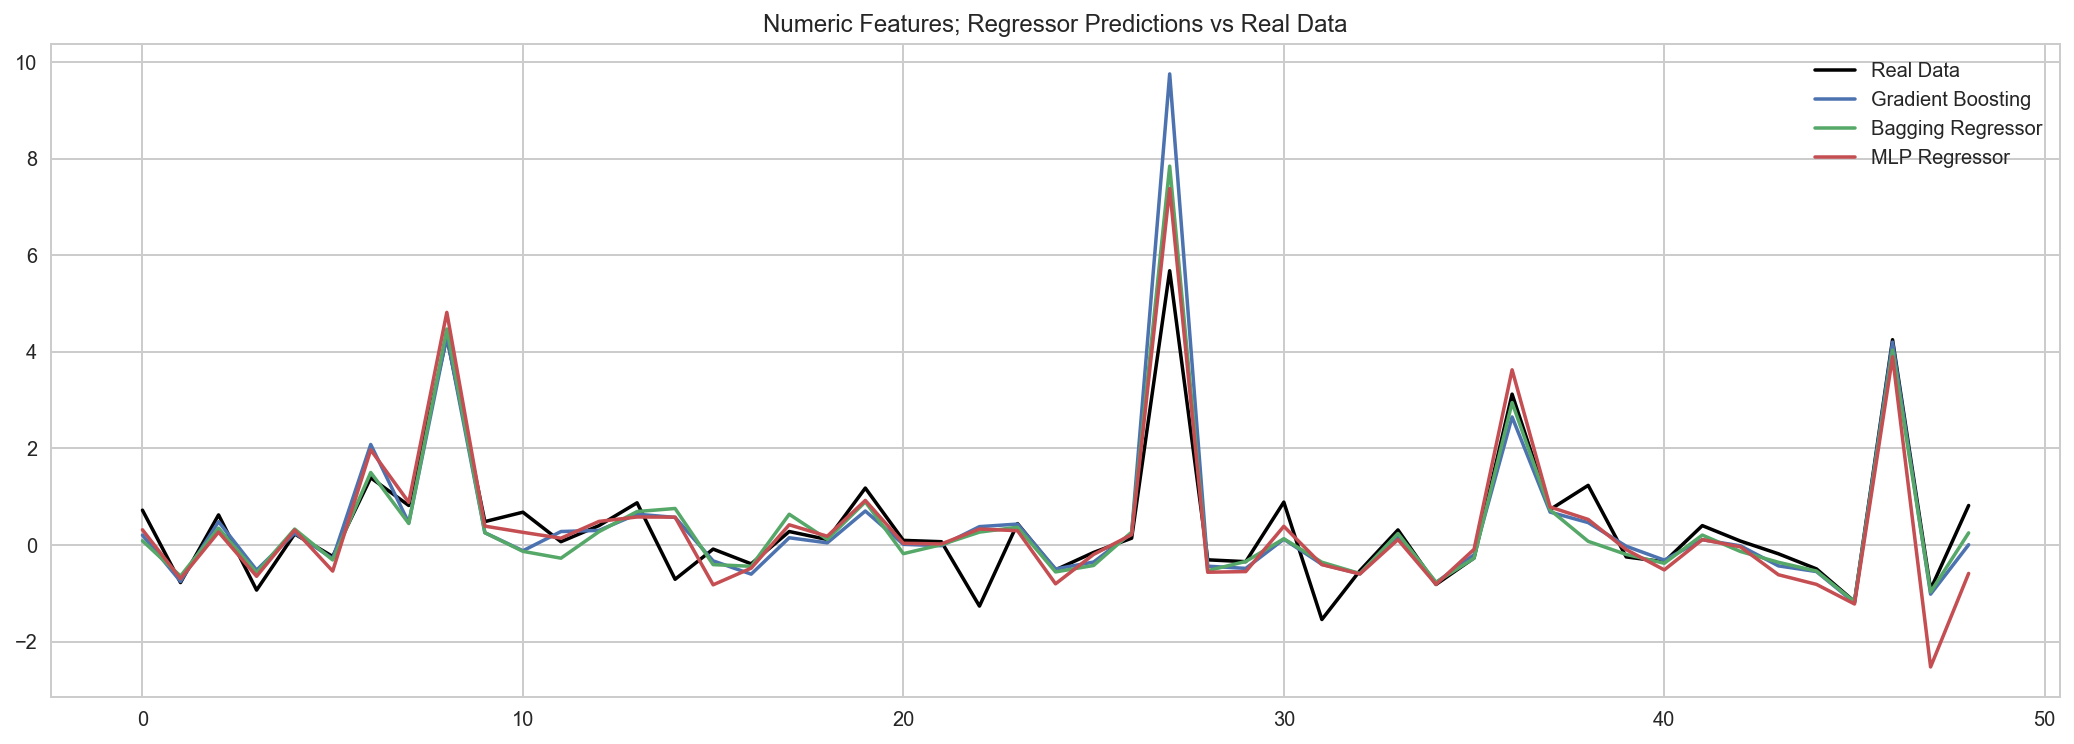

In [41]:
hide_code
plt.figure(figsize = (18, 6))
plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_br[1:50], label='Bagging Regressor')
plt.plot(y_test_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("Numeric Features; Regressor Predictions vs Real Data");

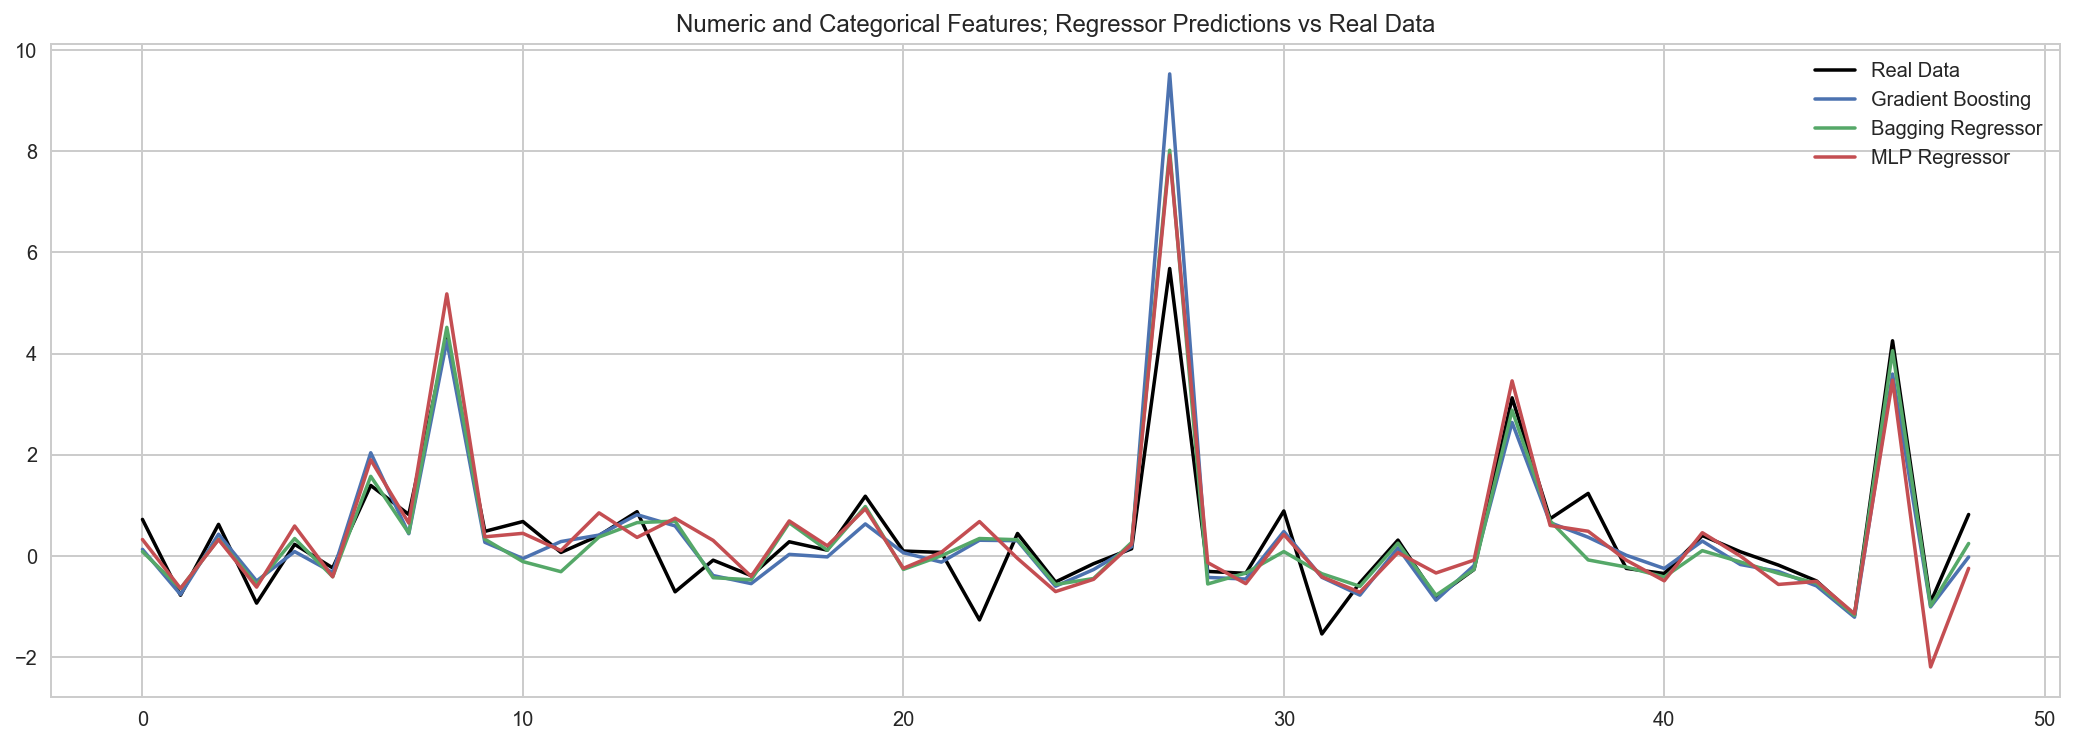

In [42]:
hide_code
plt.figure(figsize = (18, 6))
plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_cat_br[1:50], label='Bagging Regressor')
plt.plot(y_test_cat_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("Numeric and Categorical Features; Regressor Predictions vs Real Data");

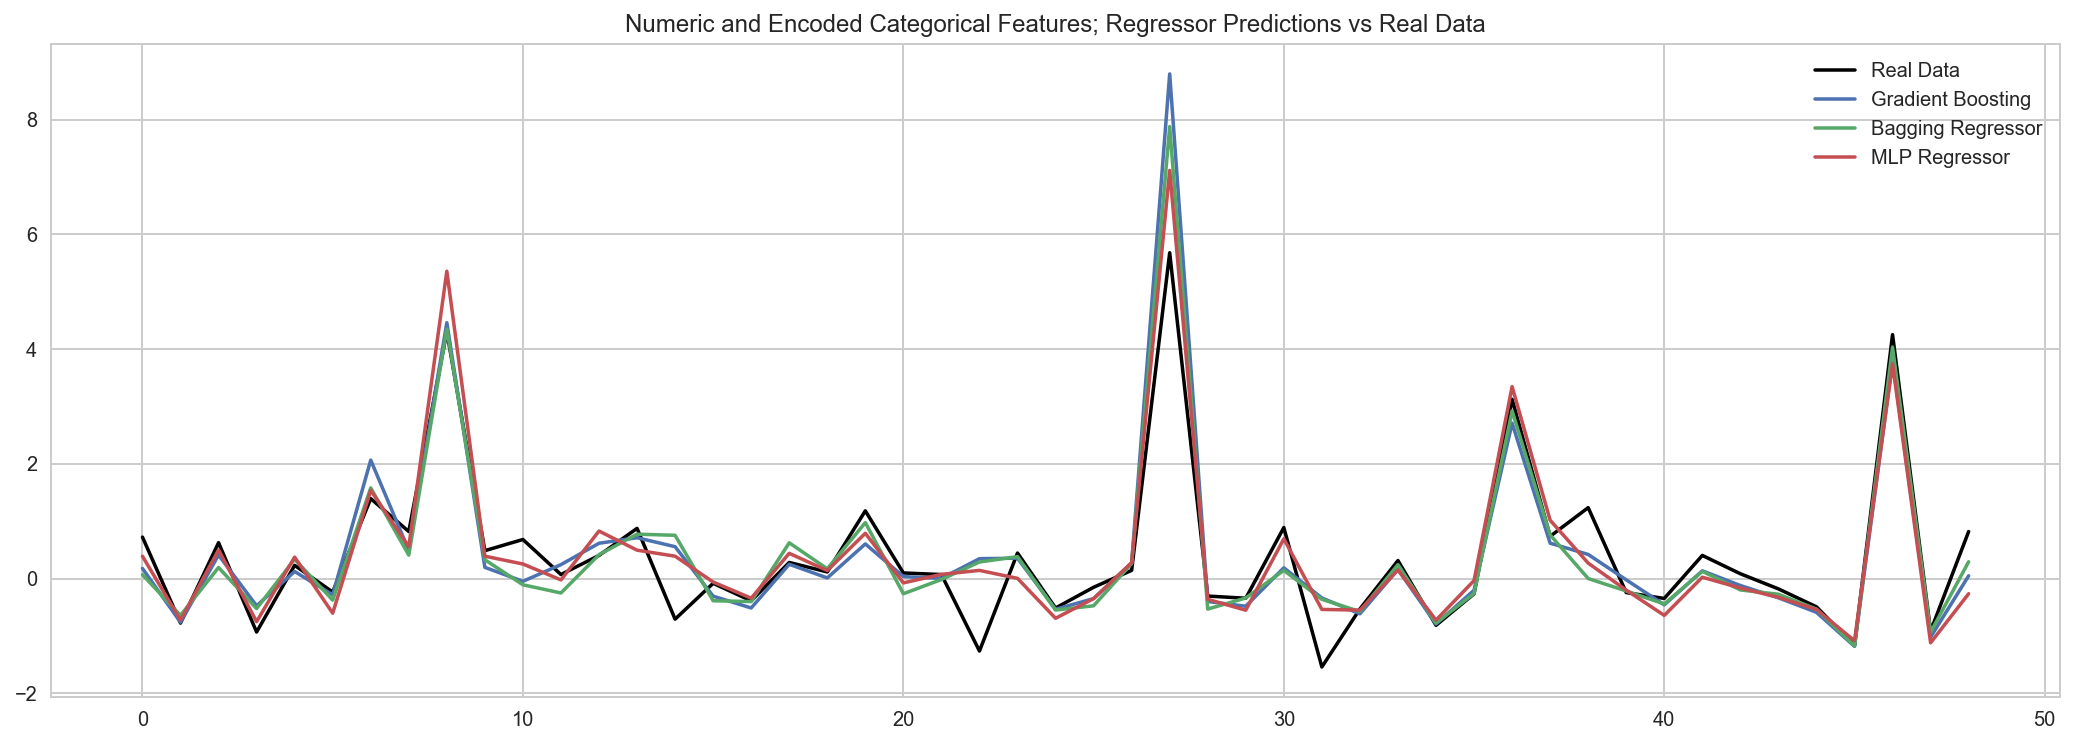

In [43]:
hide_code
plt.figure(figsize = (18, 6))
plt.plot(y_test_cat_enc[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_enc_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_cat_enc_br[1:50], label='Bagging Regressor')
plt.plot(y_test_cat_enc_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("Numeric and Encoded Categorical Features; Regressor Predictions vs Real Data");

### Neural Networks; Keras
#### MLP

In [129]:
hide_code
def mlp_model():
    model = Sequential()
    
    model.add(Dense(36, activation='relu', input_dim=36))
    model.add(Dense(36, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(144, activation='relu'))
    model.add(Dense(144, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(576, activation='relu'))
    model.add(Dense(576, activation='relu'))
    
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_model = mlp_model()
mlp_checkpointer = ModelCheckpoint(filepath='weights.best.mlp.hdf5', 
                                   verbose=2, save_best_only=True)
mlp_history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                            nb_epoch=10, batch_size=128, verbose=0, callbacks=[mlp_checkpointer])

Epoch 00000: val_loss improved from inf to 0.80657, saving model to weights.best.mlp.hdf5
Epoch 00001: val_loss improved from 0.80657 to 0.71171, saving model to weights.best.mlp.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss improved from 0.71171 to 0.67644, saving model to weights.best.mlp.hdf5
Epoch 00006: val_loss improved from 0.67644 to 0.65849, saving model to weights.best.mlp.hdf5
Epoch 00007: val_loss improved from 0.65849 to 0.65680, saving model to weights.best.mlp.hdf5
Epoch 00008: val_loss improved from 0.65680 to 0.63936, saving model to weights.best.mlp.hdf5
Epoch 00009: val_loss did not improve


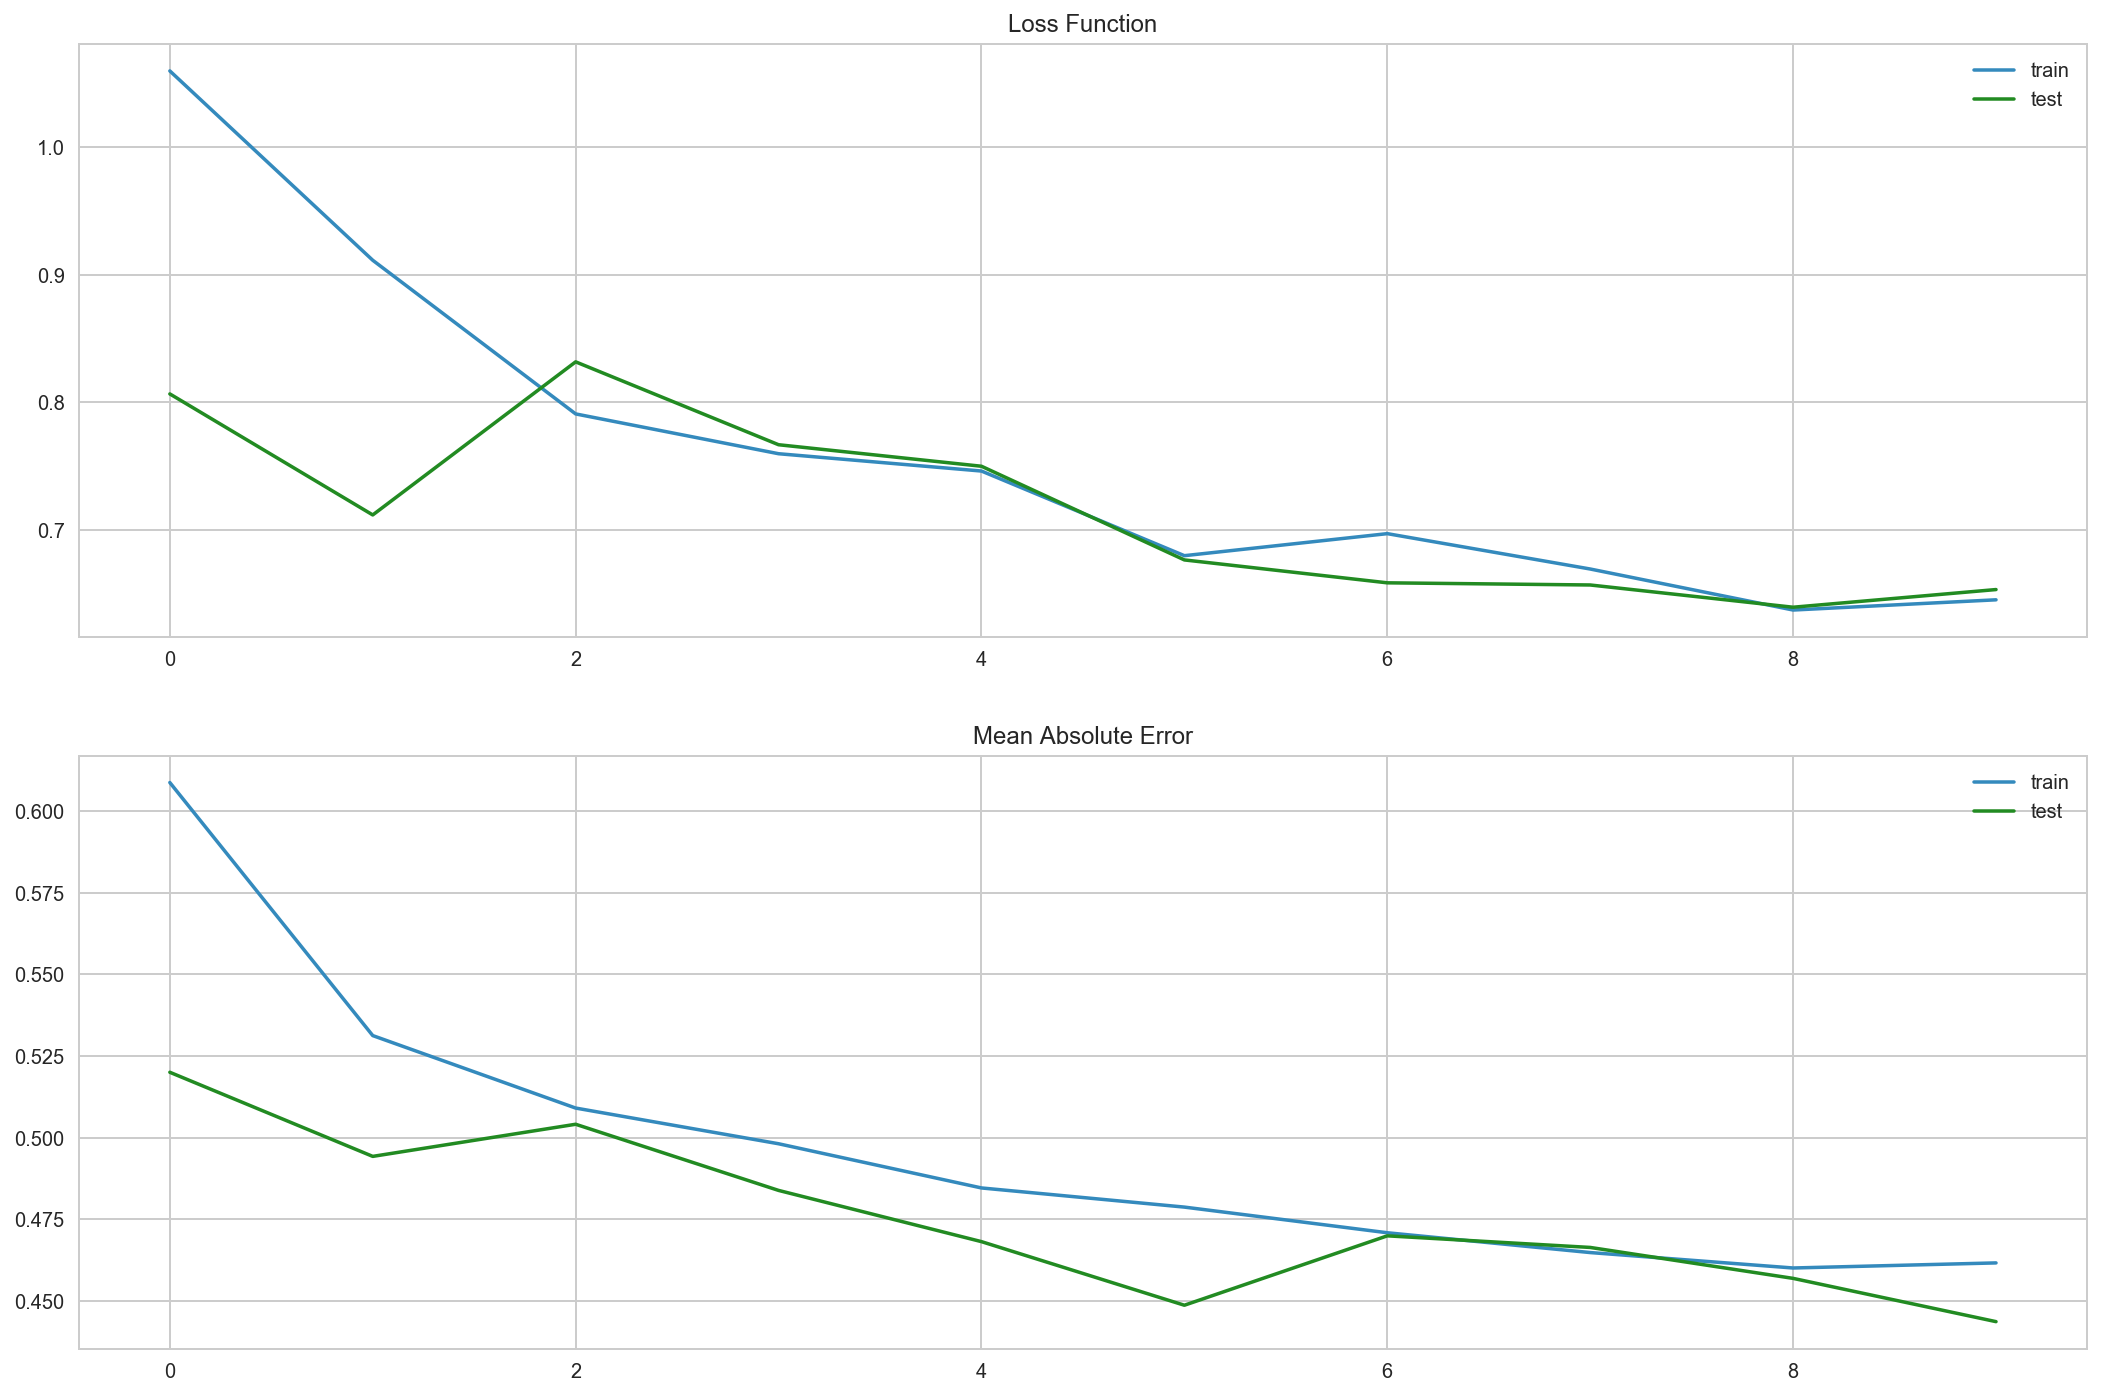

In [130]:
hide_code
history_plot(mlp_history)

In [131]:
hide_code
mlp_model.load_weights('weights.best.mlp.hdf5')

y_train_mlp = mlp_model.predict(X_train)
y_test_mlp = mlp_model.predict(X_test)

mlp_model.save('mlp_model_p6.h5')

print(separator, '\nNumeric Features')
scores('MLP Model', y_train, y_test, y_train_mlp, y_test_mlp)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.709863067247
EV score. Test:  0.680704825232
----------
R2 score. Train:  0.709417537048
R2 score. Test:  0.680462661015
----------
MSE score. Train:  0.52844732763
MSE score. Test:  0.639363503166
----------
MAE score. Train:  0.434996086181
MAE score. Test:  0.456855132022
----------
MdAE score. Train:  0.243018501865
MdAE score. Test:  0.253722723682


In [132]:
hide_code
def mlp_cat_model():
    model = Sequential()
    
    model.add(Dense(44, activation='relu', input_dim=44))
    model.add(Dense(44, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(156, activation='relu'))
    model.add(Dense(156, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(624, activation='relu'))
    model.add(Dense(624, activation='relu'))
    
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_cat_model = mlp_cat_model()
mlp_cat_checkpointer = ModelCheckpoint(filepath='weights.best.mlp_cat.hdf5', 
                                       verbose=2, save_best_only=True)
mlp_cat_history = mlp_cat_model.fit(X_train_cat, y_train_cat, 
                                    validation_data=(X_test_cat, y_test_cat),
                                    nb_epoch=12, batch_size=128, verbose=0, callbacks=[mlp_cat_checkpointer])

Epoch 00000: val_loss improved from inf to 0.86874, saving model to weights.best.mlp_cat.hdf5
Epoch 00001: val_loss improved from 0.86874 to 0.66059, saving model to weights.best.mlp_cat.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss improved from 0.66059 to 0.64345, saving model to weights.best.mlp_cat.hdf5
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve


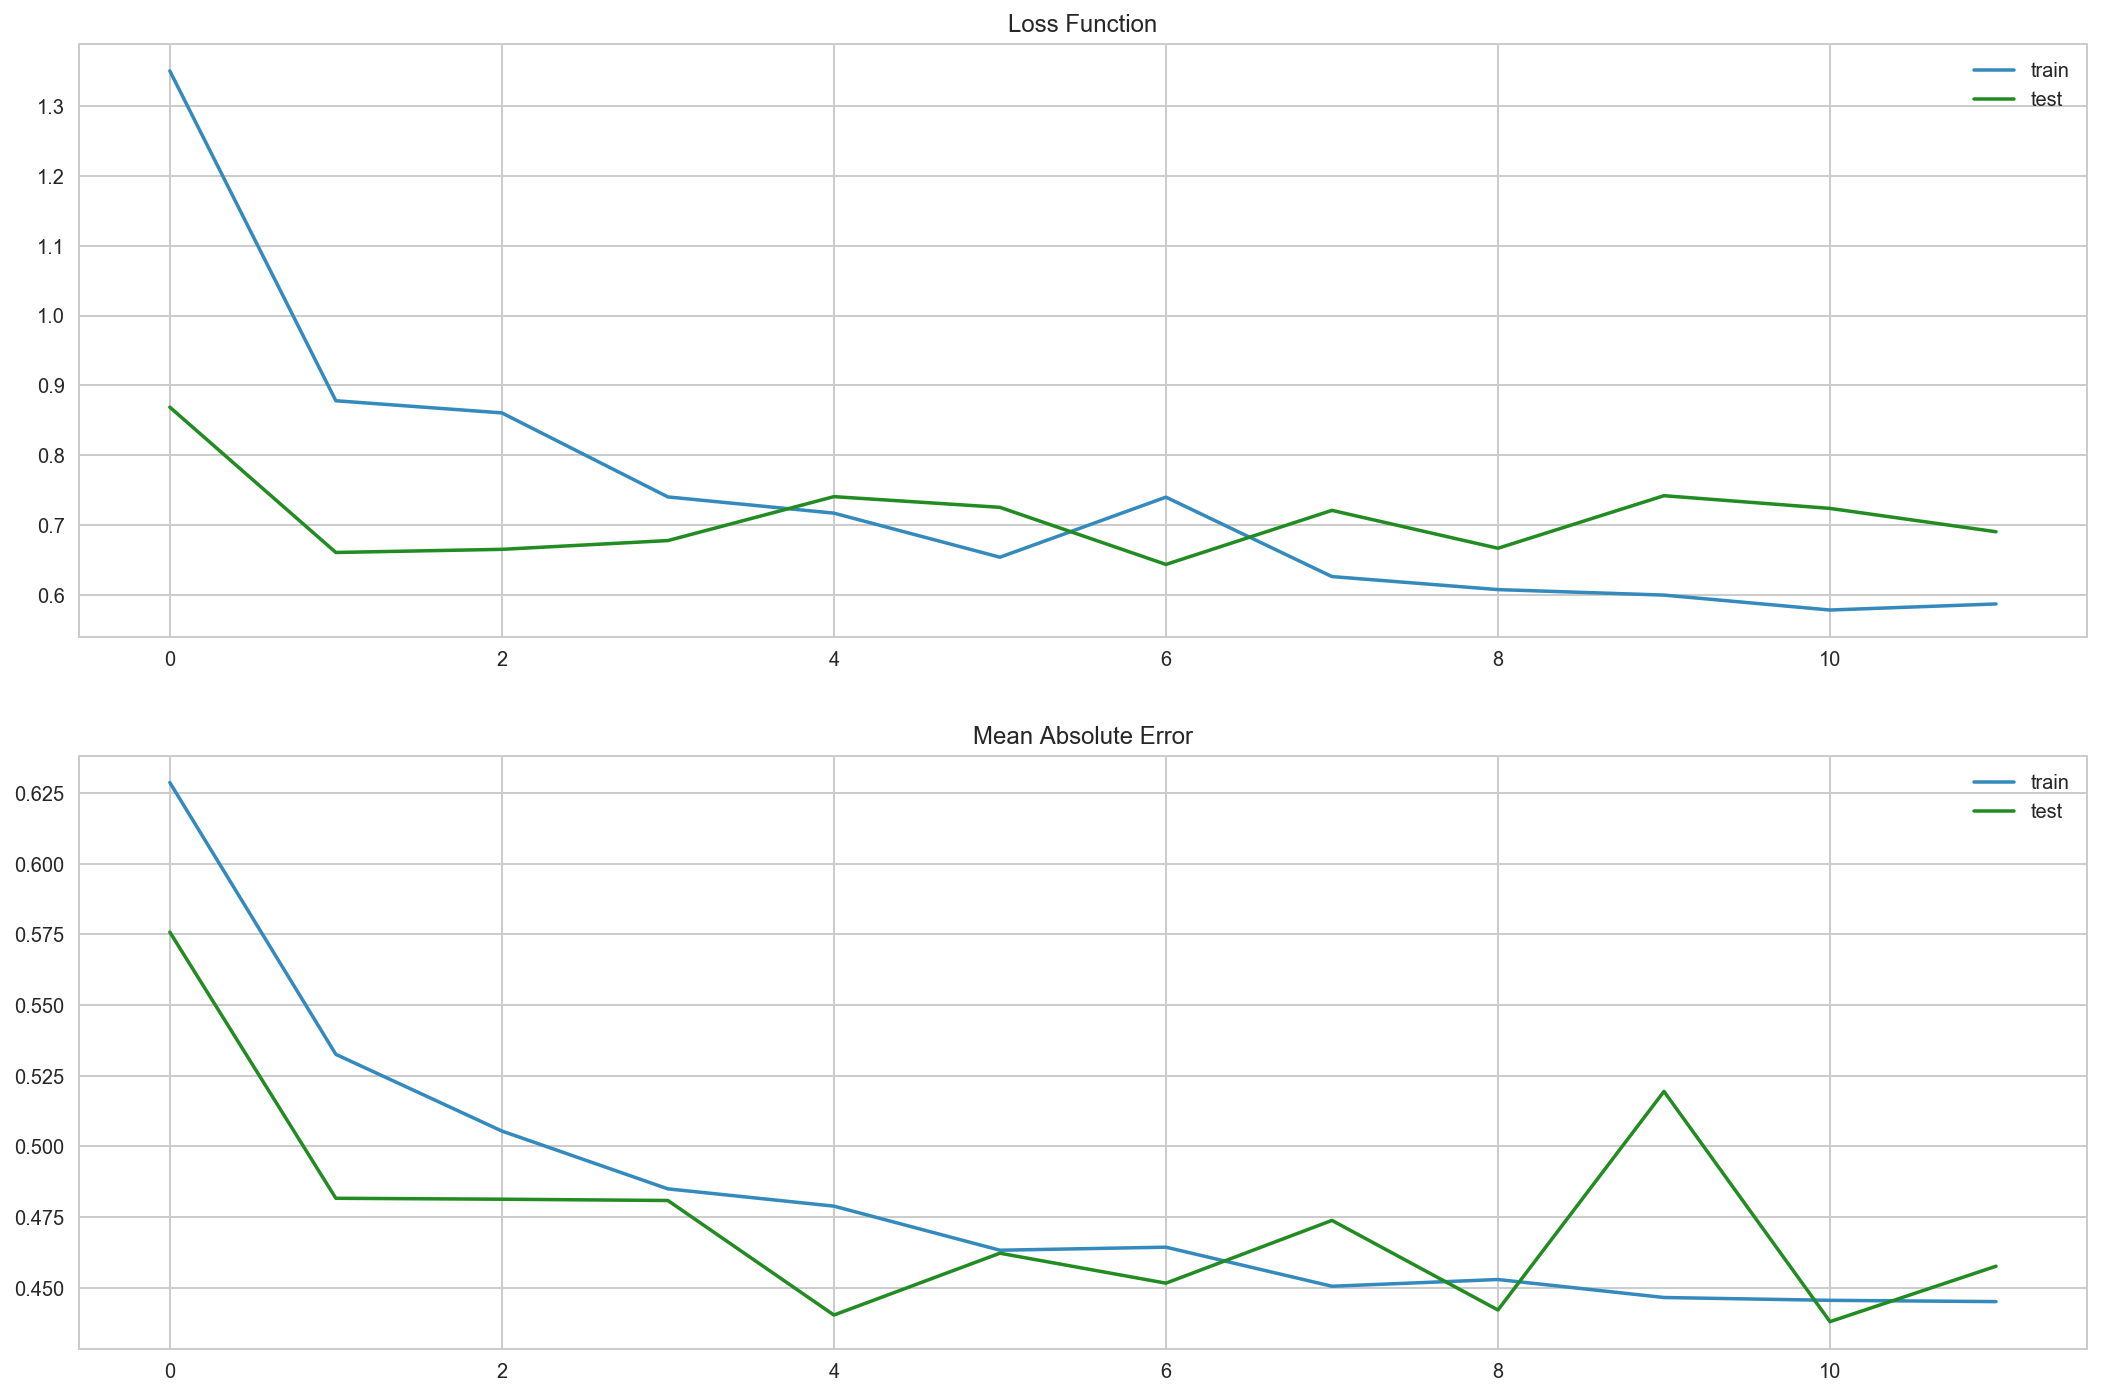

In [133]:
hide_code
history_plot(mlp_cat_history)

In [134]:
hide_code
mlp_cat_model.load_weights('weights.best.mlp_cat.hdf5')

y_train_cat_mlp = mlp_cat_model.predict(X_train_cat)
y_test_cat_mlp = mlp_cat_model.predict(X_test_cat)

mlp_cat_model.save('mlp_cat_model_p6.h5')

print(separator, '\nNumeric and Categorical Features')
scores('MLP Model', 
       y_train_cat, y_test_cat, y_train_cat_mlp, y_test_cat_mlp)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.710616372813
EV score. Test:  0.678624886609
----------
R2 score. Train:  0.710496294799
R2 score. Test:  0.678421428188
----------
MSE score. Train:  0.526485520834
MSE score. Test:  0.643447813862
----------
MAE score. Train:  0.424480455929
MAE score. Test:  0.451645619967
----------
MdAE score. Train:  0.241931742562
MdAE score. Test:  0.252723041806


In [135]:
hide_code
def mlp_cat_enc_model():
    model = Sequential()
    
    model.add(Dense(159, activation='relu', input_dim=636))
    model.add(Dense(159, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(318, activation='relu'))
    model.add(Dense(318, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(636, activation='relu'))
    model.add(Dense(636, activation='relu'))
    
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_cat_enc_model = mlp_cat_enc_model()
mlp_cat_enc_checkpointer = ModelCheckpoint(filepath='weights.best.mlp_cat_enc.hdf5', 
                                           verbose=2, save_best_only=True)
mlp_cat_enc_history = mlp_cat_enc_model.fit(X_train_cat_enc, y_train_cat_enc, 
                                            validation_data=(X_test_cat_enc, y_test_cat_enc),
                                            nb_epoch=10, batch_size=128, verbose=0, 
                                            callbacks=[mlp_cat_enc_checkpointer])

Epoch 00000: val_loss improved from inf to 0.85633, saving model to weights.best.mlp_cat_enc.hdf5
Epoch 00001: val_loss improved from 0.85633 to 0.62513, saving model to weights.best.mlp_cat_enc.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss improved from 0.62513 to 0.62429, saving model to weights.best.mlp_cat_enc.hdf5
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve


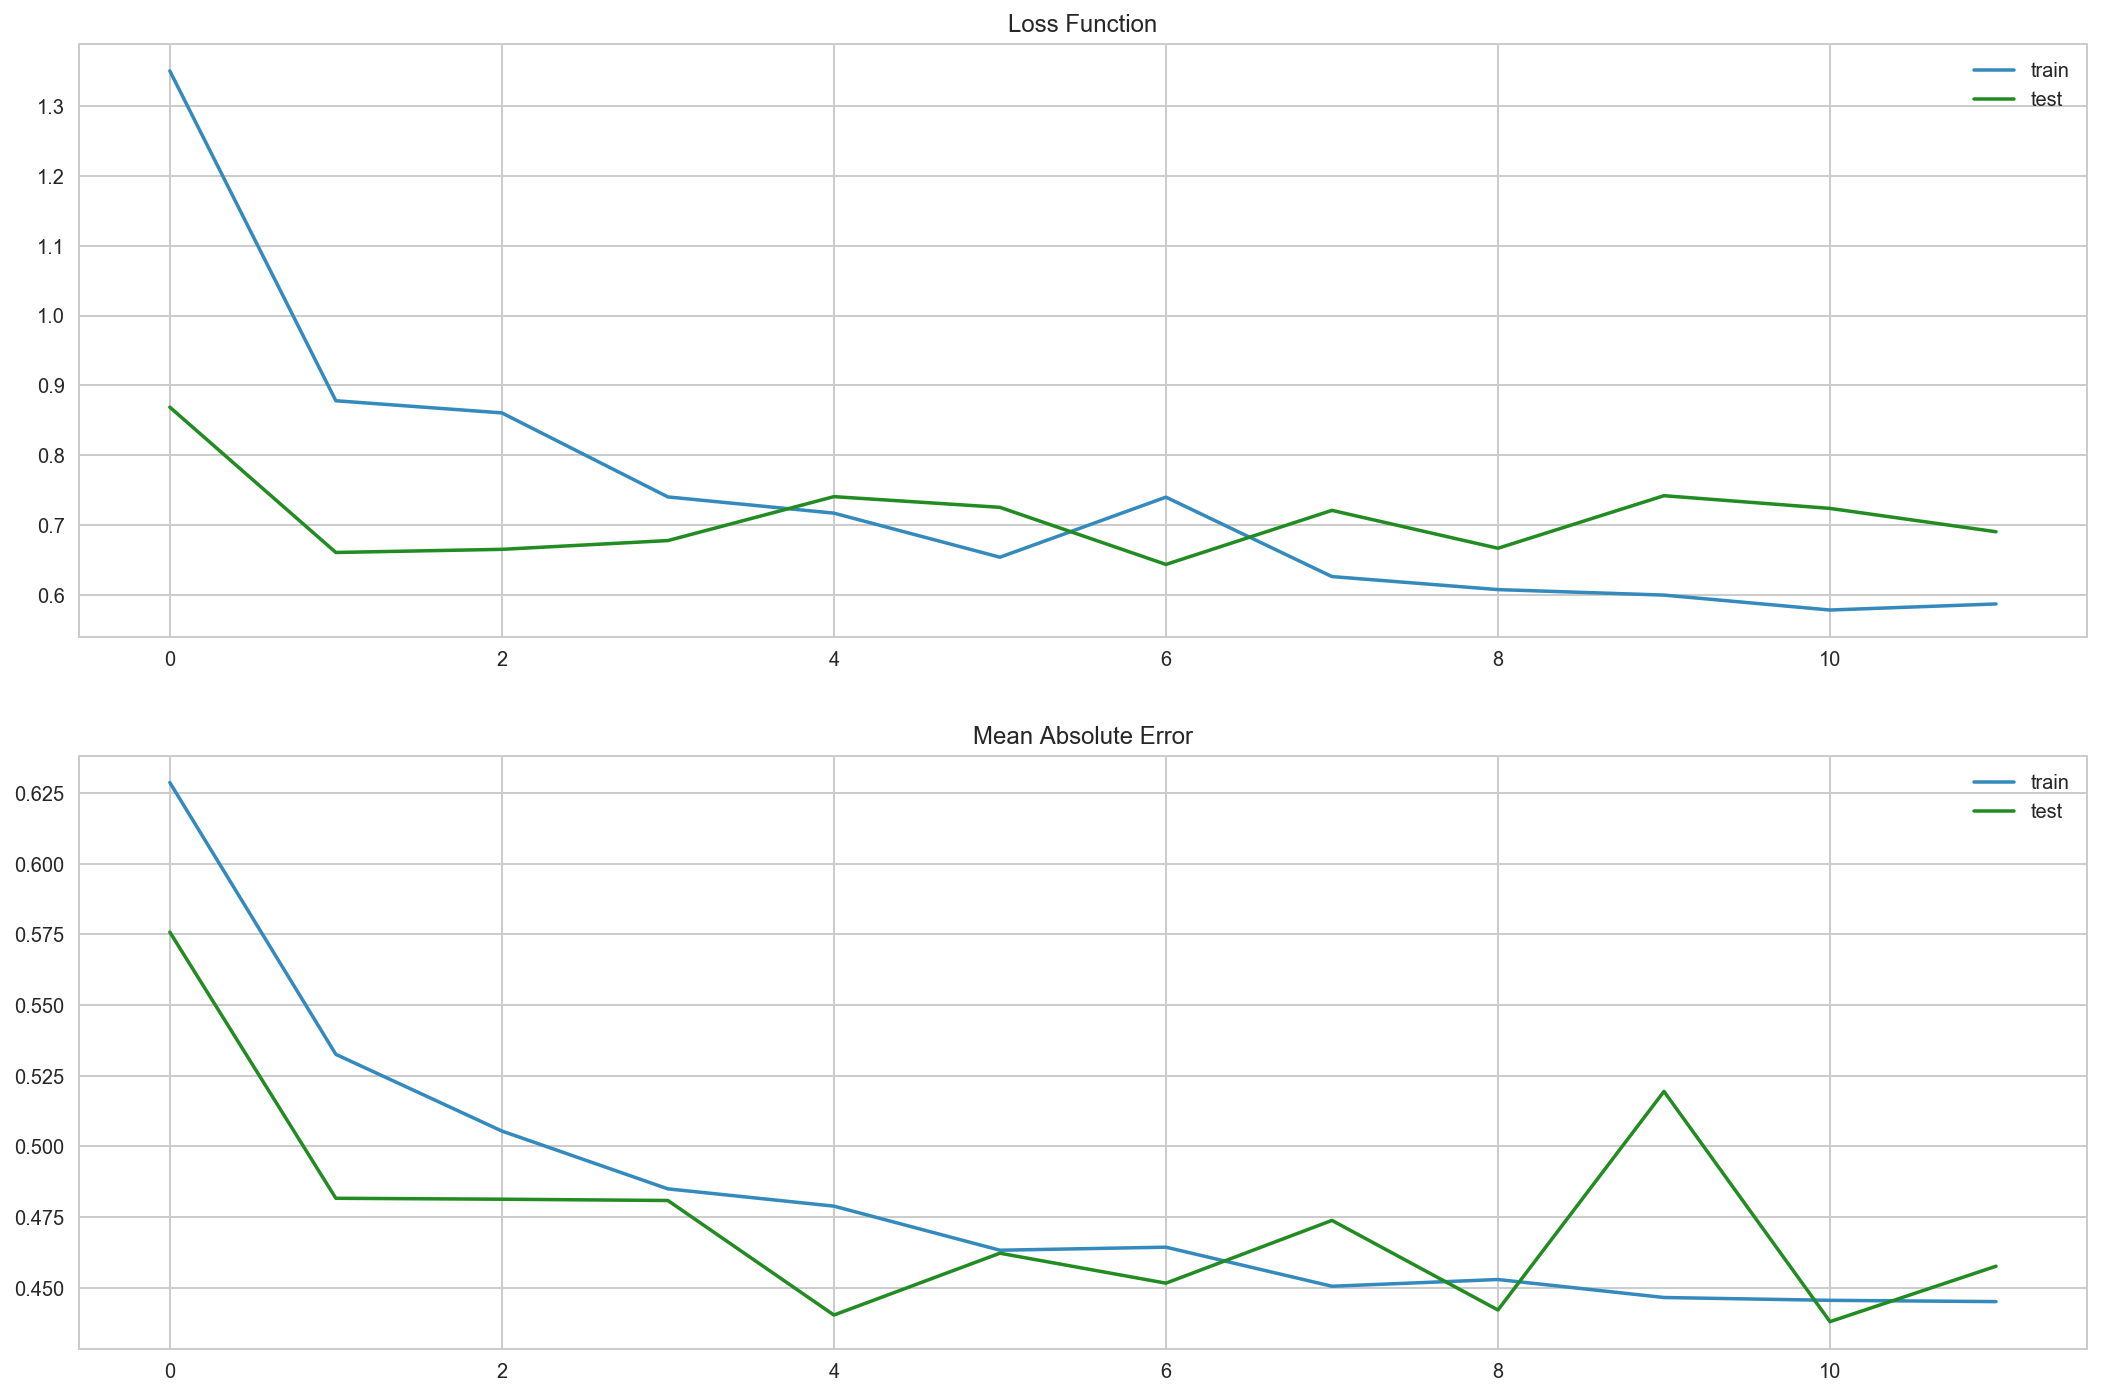

In [136]:
hide_code
history_plot(mlp_cat_history)

In [137]:
hide_code
mlp_cat_enc_model.load_weights('weights.best.mlp_cat_enc.hdf5')

y_train_cat_enc_mlp = mlp_cat_enc_model.predict(X_train_cat_enc)
y_test_cat_enc_mlp = mlp_cat_enc_model.predict(X_test_cat_enc)

mlp_cat_enc_model.save('mlp_cat_enc_model_p6.h5')

print(separator, '\nNumeric and Encoded Categorical Features')
scores('MLP Model', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_mlp, y_test_cat_enc_mlp)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Encoded Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.743241308373
EV score. Test:  0.69083287994
----------
R2 score. Train:  0.739140233695
R2 score. Test:  0.687996984944
----------
MSE score. Train:  0.474394239039
MSE score. Test:  0.624288045141
----------
MAE score. Train:  0.386926996945
MAE score. Test:  0.421789448425
----------
MdAE score. Train:  0.189329479006
MdAE score. Test:  0.197238723569


#### CNN

In [69]:
hide_code
def cnn_model():
    model = Sequential()
        
    model.add(Conv1D(36, 5, padding='valid', activation='relu', input_shape=(36, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(144, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(576, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='nadam', metrics=['mae'])
    return model

cnn_model = cnn_model()
cnn_checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', 
                                   verbose=2, save_best_only=True)
cnn_history = cnn_model.fit(X_train.reshape(-1, 36, 1), y_train, 
                            epochs=25, batch_size=128, verbose=0, callbacks=[cnn_checkpointer],
                            validation_data=(X_test.reshape(-1, 36, 1), y_test))

Epoch 00000: val_loss improved from inf to 0.81801, saving model to weights.best.cnn.hdf5
Epoch 00001: val_loss improved from 0.81801 to 0.78546, saving model to weights.best.cnn.hdf5
Epoch 00002: val_loss improved from 0.78546 to 0.74547, saving model to weights.best.cnn.hdf5
Epoch 00003: val_loss improved from 0.74547 to 0.70293, saving model to weights.best.cnn.hdf5
Epoch 00004: val_loss improved from 0.70293 to 0.66538, saving model to weights.best.cnn.hdf5
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss improved from 0.66538 to 0.65071, saving model to weights.best.cnn.hdf5
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss improved from 0.65071 to 0.64776, saving model to weights.best.cnn.hdf5
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss improved from 0.64776 to 0.59684, saving model to weights.best.cnn.hdf5
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss di

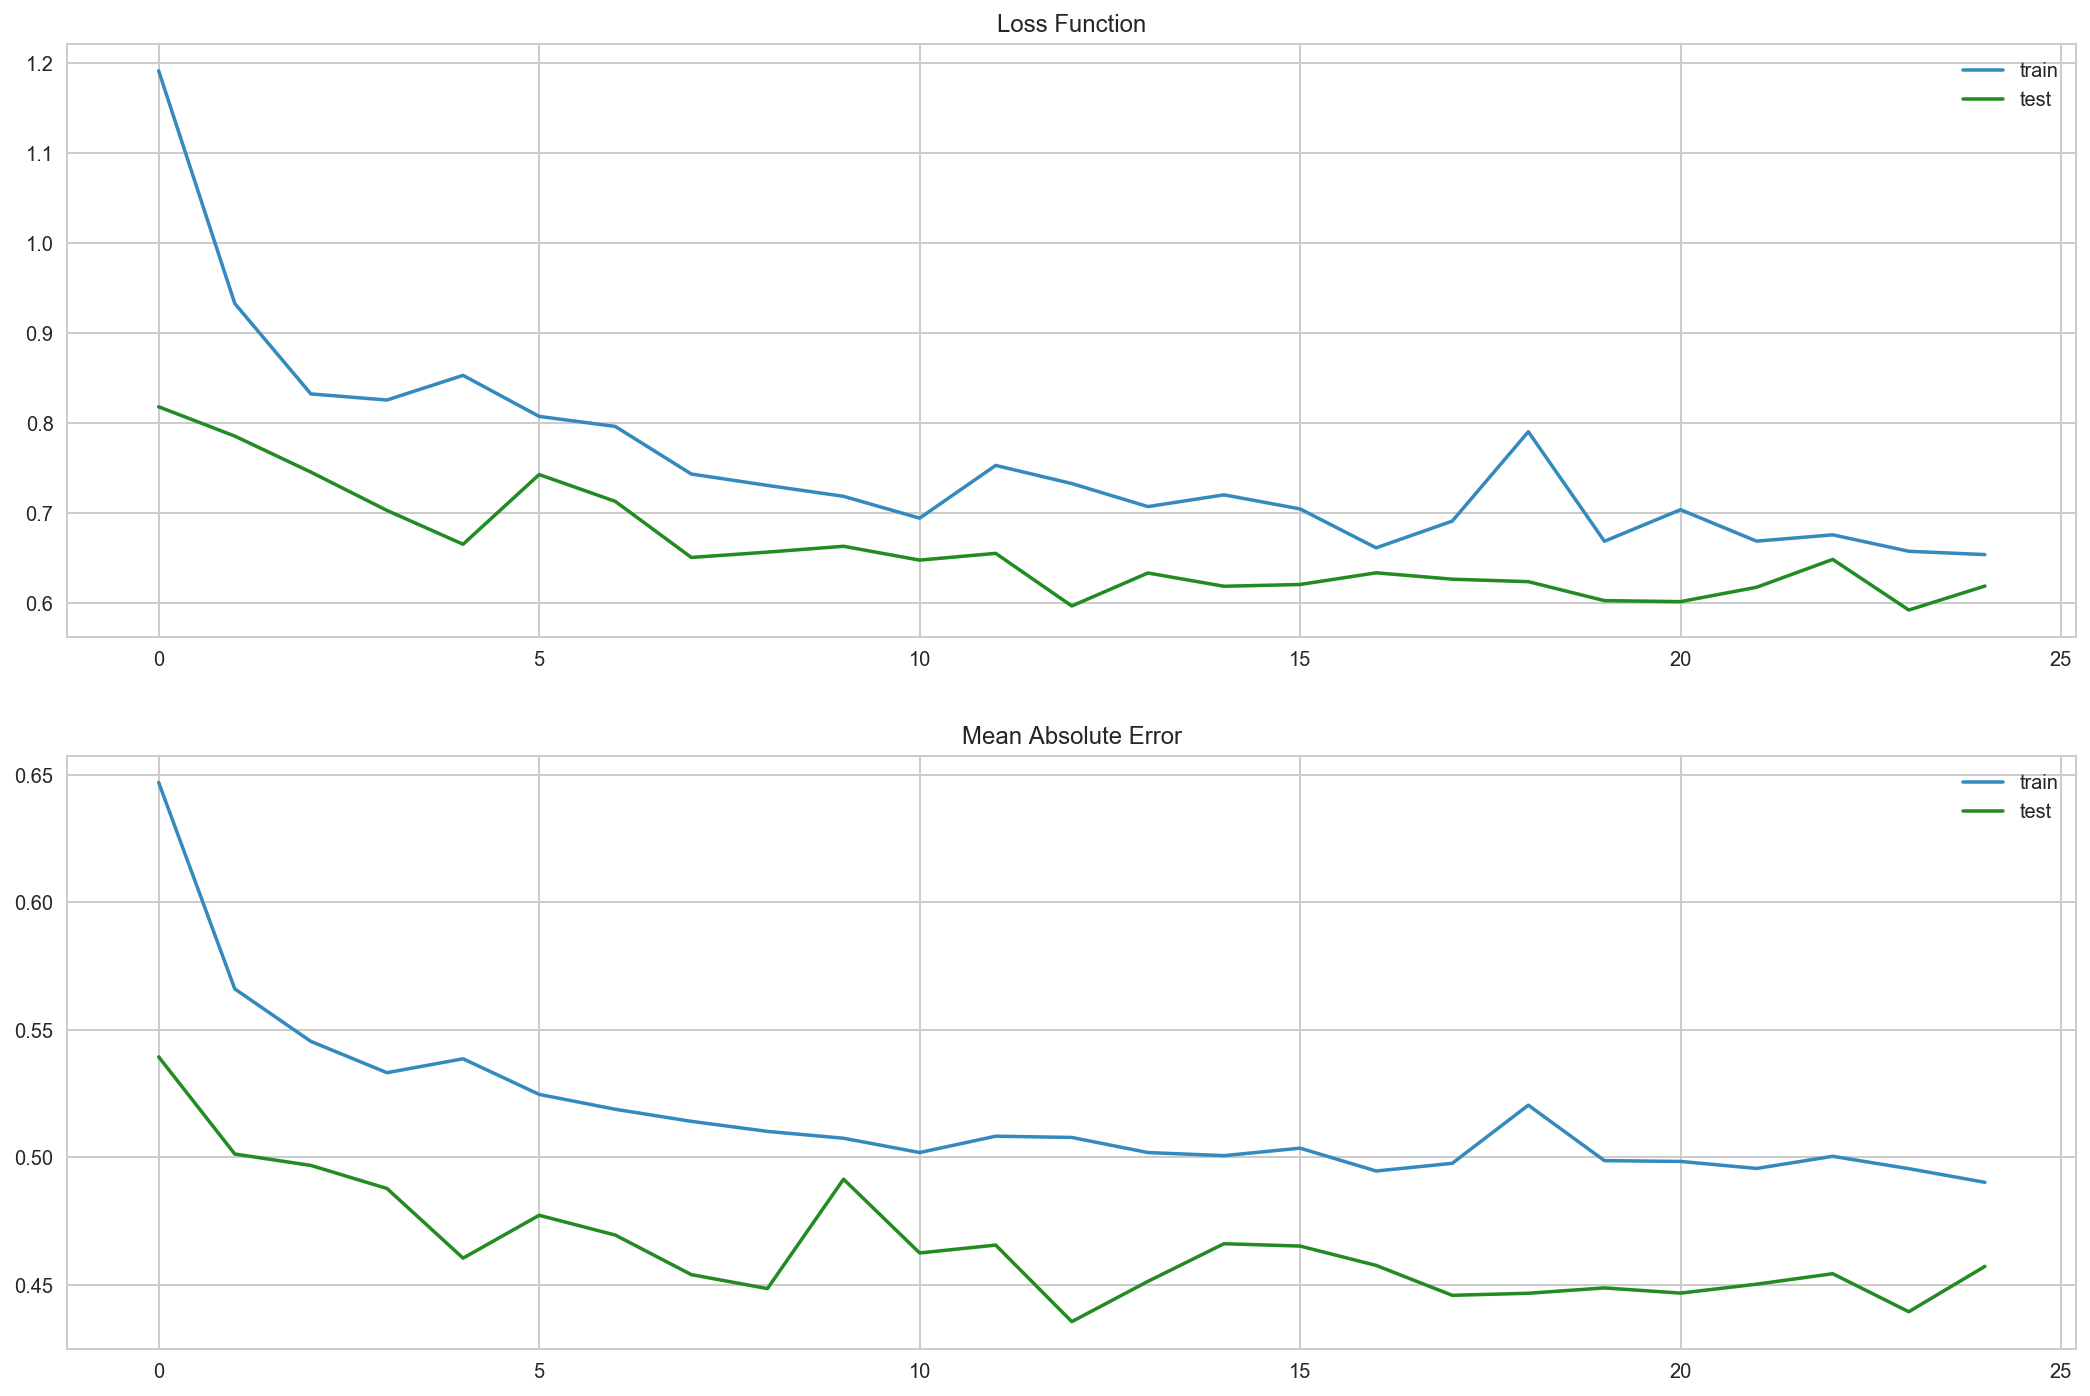

In [70]:
hide_code
history_plot(cnn_history)

In [60]:
# SVG(model_to_dot(cnn_model).create(prog='dot', format='svg'))

In [71]:
hide_code
cnn_model.load_weights('weights.best.cnn.hdf5')

y_train_cnn = cnn_model.predict(X_train.reshape(-1, 36, 1))
y_test_cnn = cnn_model.predict(X_test.reshape(-1, 36, 1))

cnn_model.save('cnn_model_p6.h5')

print(separator, '\nNumeric Features')
scores('CNN Model', y_train, y_test, y_train_cnn, y_test_cnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.727631414483
EV score. Test:  0.703957231501
----------
R2 score. Train:  0.727625640415
R2 score. Test:  0.703957118448
----------
MSE score. Train:  0.495334443021
MSE score. Test:  0.592353352
----------
MAE score. Train:  0.418152445921
MAE score. Test:  0.439423282638
----------
MdAE score. Train:  0.228637135161
MdAE score. Test:  0.231068283319


In [75]:
hide_code
def cnn_cat_model():
    model = Sequential()
        
    model.add(Conv1D(44, 5, padding='valid', activation='relu', input_shape=(44, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(156, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(624, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='nadam', metrics=['mae'])
    return model

cnn_cat_model = cnn_cat_model()
cnn_cat_checkpointer = ModelCheckpoint(filepath='weights.best.cnn_cat.hdf5', 
                                       verbose=2, save_best_only=True)
cnn_cat_history = cnn_cat_model.fit(X_train_cat.reshape(-1, 44, 1), y_train_cat, 
                                    epochs=20, batch_size=128, verbose=0, callbacks=[cnn_cat_checkpointer],
                                    validation_data=(X_test_cat.reshape(-1, 44, 1), y_test_cat))

Epoch 00000: val_loss improved from inf to 0.87827, saving model to weights.best.cnn_cat.hdf5
Epoch 00001: val_loss improved from 0.87827 to 0.80639, saving model to weights.best.cnn_cat.hdf5
Epoch 00002: val_loss improved from 0.80639 to 0.74491, saving model to weights.best.cnn_cat.hdf5
Epoch 00003: val_loss improved from 0.74491 to 0.71099, saving model to weights.best.cnn_cat.hdf5
Epoch 00004: val_loss improved from 0.71099 to 0.68997, saving model to weights.best.cnn_cat.hdf5
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss improved from 0.68997 to 0.65249, saving model to weights.best.cnn_cat.hdf5
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss improved from 0.65249 to 0.62657, saving model to weights.best.cnn_cat.hdf5
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve
Epoch 00015: v

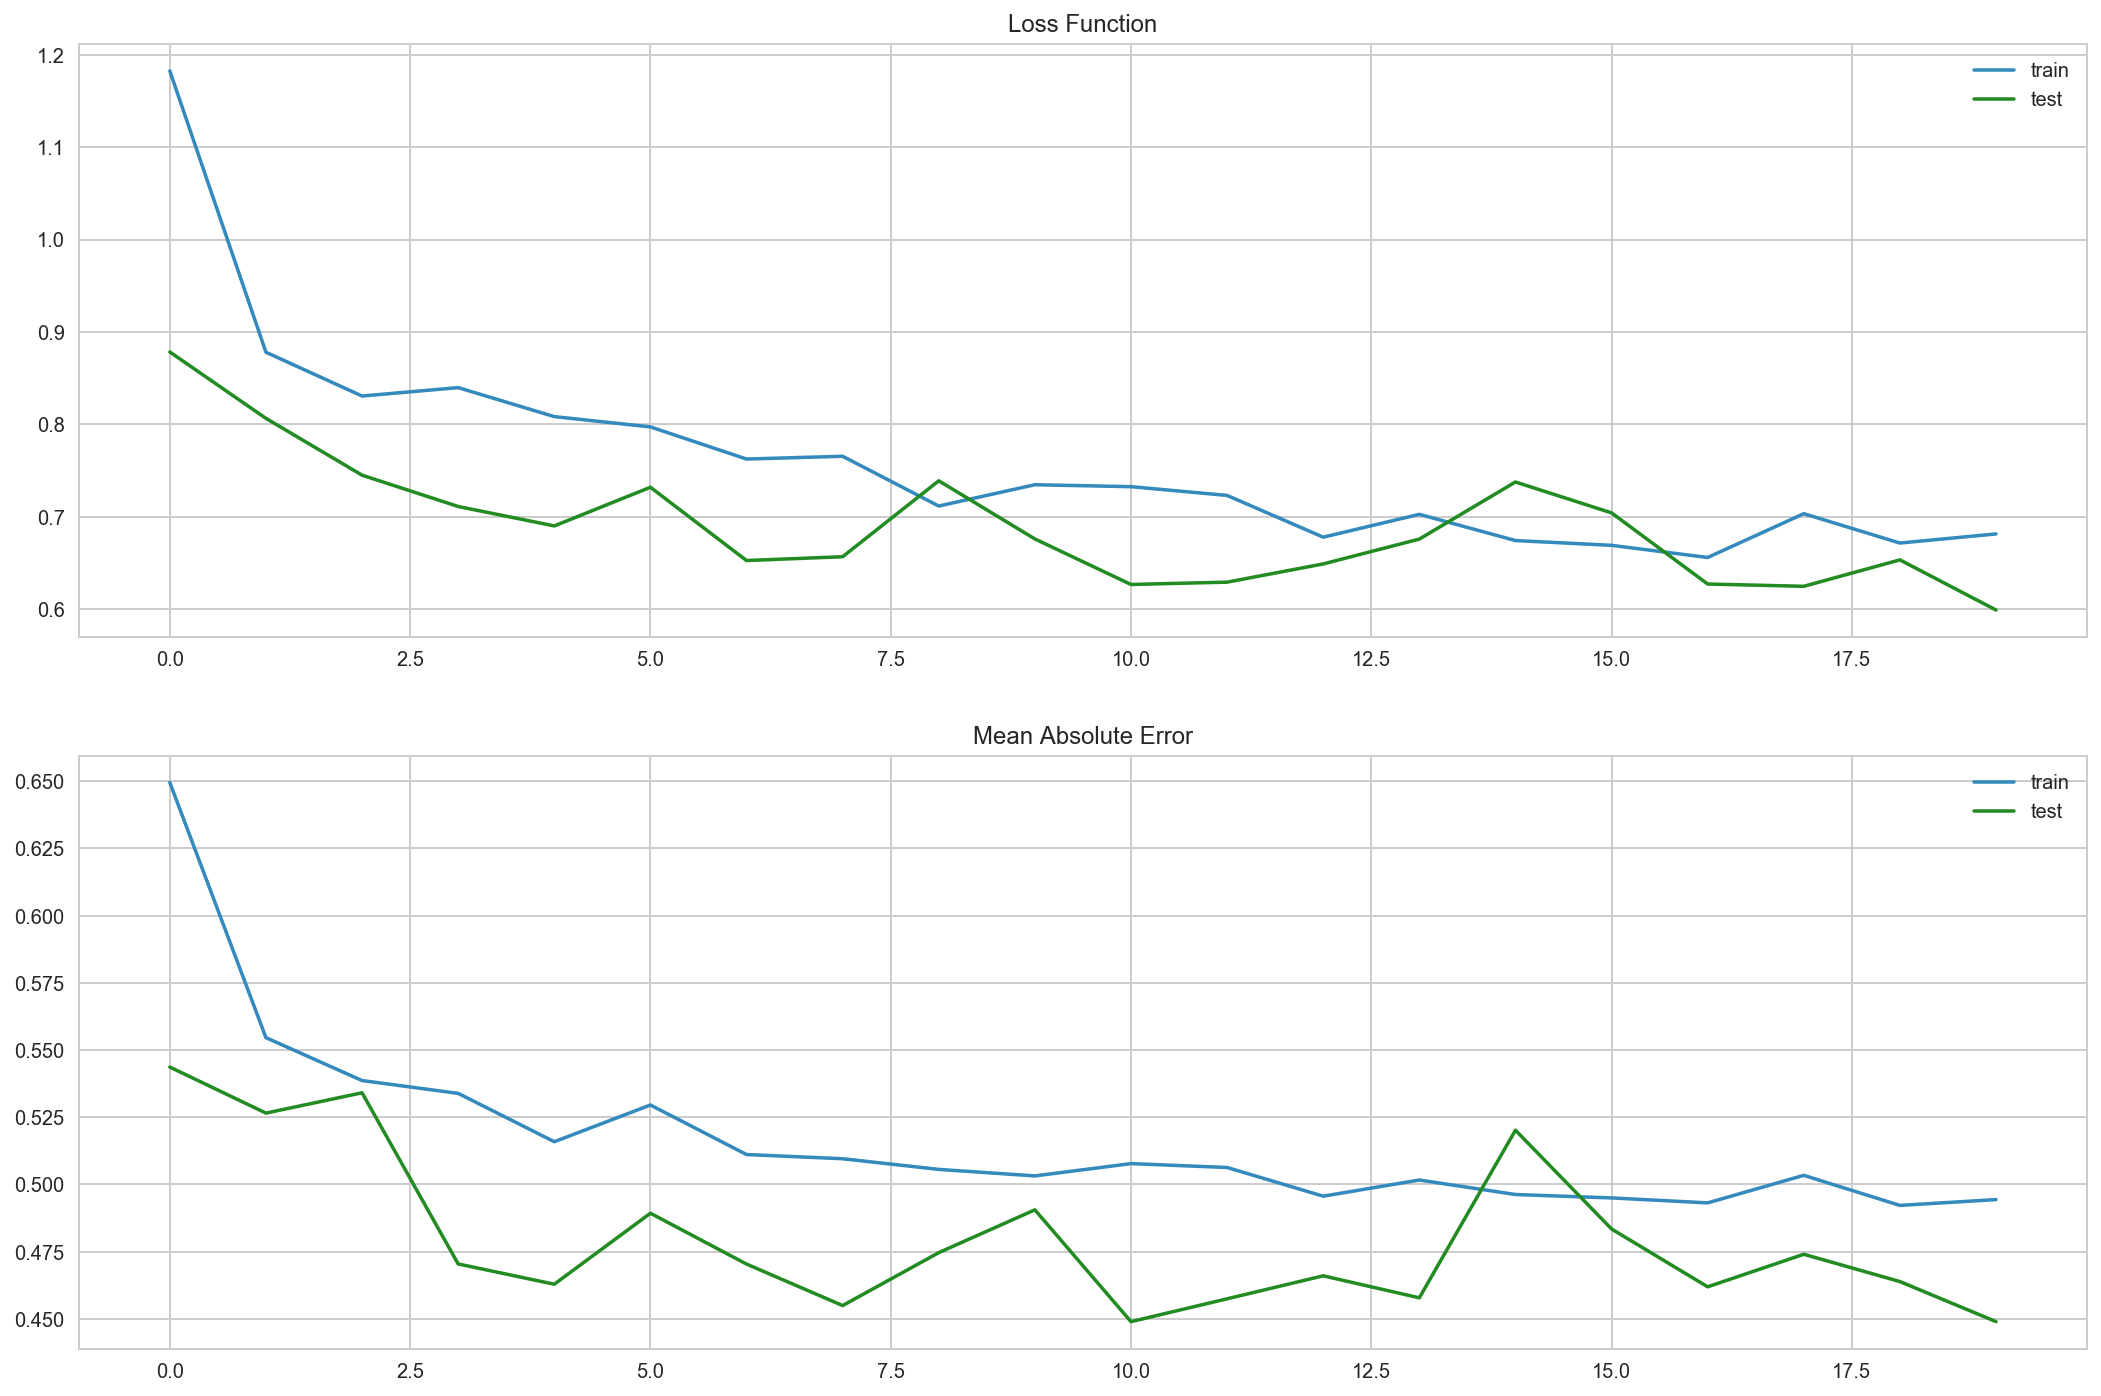

In [76]:
hide_code
history_plot(cnn_cat_history)

In [77]:
hide_code
cnn_cat_model.load_weights('weights.best.cnn_cat.hdf5')

y_train_cat_cnn = cnn_cat_model.predict(X_train_cat.reshape(-1, 44, 1))
y_test_cat_cnn = cnn_cat_model.predict(X_test_cat.reshape(-1, 44, 1))

cnn_cat_model.save('cnn_cat_model_p6.h5')

print(separator, '\nNumeric and Categorical Features')
scores('CNN Model', 
       y_train_cat, y_test_cat, y_train_cat_cnn, y_test_cat_cnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.728011216151
EV score. Test:  0.701369178787
----------
R2 score. Train:  0.727353488466
R2 score. Test:  0.700674511636
----------
MSE score. Train:  0.495829372991
MSE score. Test:  0.598921532723
----------
MAE score. Train:  0.427035218455
MAE score. Test:  0.448945430664
----------
MdAE score. Train:  0.235406486113
MdAE score. Test:  0.243071118461


In [78]:
hide_code
def cnn_cat_enc_model():
    model = Sequential()
        
    model.add(Conv1D(159, 5, padding='valid', activation='relu', input_shape=(636, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(318, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(636, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

cnn_cat_enc_model = cnn_cat_enc_model()
cnn_cat_enc_checkpointer = ModelCheckpoint(filepath='weights.best.cnn_cat_enc.hdf5', 
                                           verbose=2, save_best_only=True)
cnn_cat_enc_history = \
cnn_cat_enc_model.fit(X_train_cat_enc.reshape(-1, 636, 1), y_train_cat_enc, 
                      epochs=10, batch_size=128, verbose=0, callbacks=[cnn_cat_enc_checkpointer],
                      validation_data=(X_test_cat_enc.reshape(-1, 636, 1), y_test_cat_enc))

Epoch 00000: val_loss improved from inf to 0.88418, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00001: val_loss improved from 0.88418 to 0.73061, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss improved from 0.73061 to 0.67745, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00005: val_loss improved from 0.67745 to 0.64698, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00006: val_loss improved from 0.64698 to 0.62199, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss improved from 0.62199 to 0.60070, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00009: val_loss did not improve


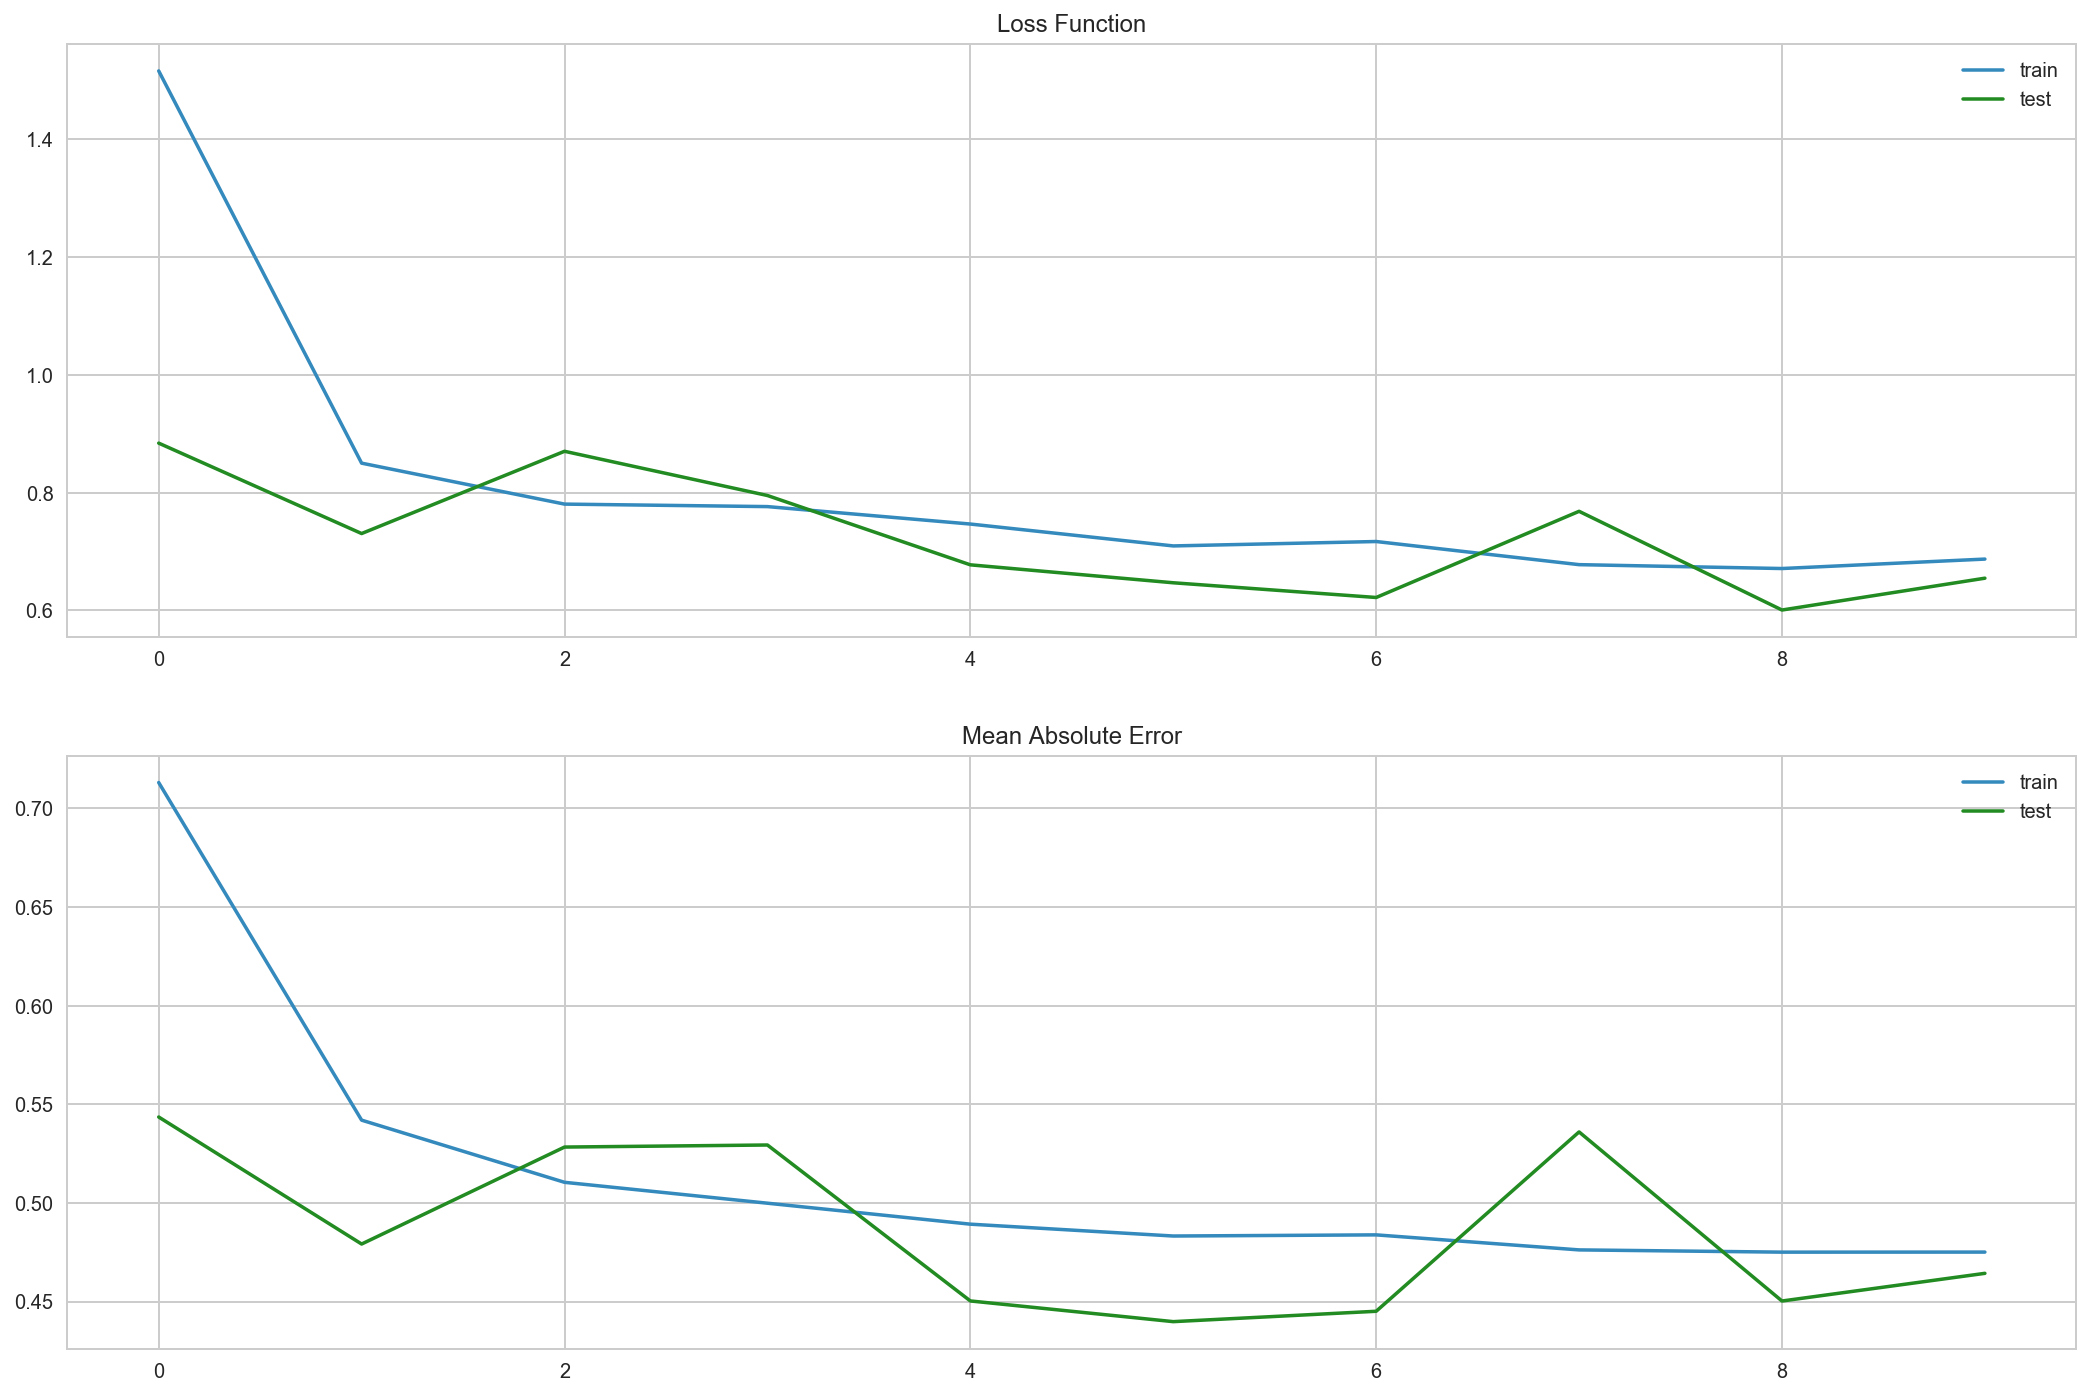

In [79]:
hide_code
history_plot(cnn_cat_enc_history)

In [80]:
hide_code
cnn_cat_enc_model.load_weights('weights.best.cnn_cat_enc.hdf5')

y_train_cat_enc_cnn = cnn_cat_enc_model.predict(X_train_cat_enc.reshape(-1, 636, 1))
y_test_cat_enc_cnn = cnn_cat_enc_model.predict(X_test_cat_enc.reshape(-1, 636, 1))

cnn_cat_enc_model.save('cnn_cat_enc_model_p6.h5')

print(separator, '\nNumeric and Encoded Categorical Features')
scores('CNN Model', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_cnn, y_test_cat_enc_cnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Encoded Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.685693804107
EV score. Test:  0.699922595278
----------
R2 score. Train:  0.685254339818
R2 score. Test:  0.699787682282
----------
MSE score. Train:  0.572390024218
MSE score. Test:  0.600695993024
----------
MAE score. Train:  0.43023266026
MAE score. Test:  0.450253957044
----------
MdAE score. Train:  0.225488724682
MdAE score. Test:  0.232632146115


#### RNN

In [138]:
hide_code
def rnn_model():
    model = Sequential()
    
    model.add(LSTM(144, return_sequences=True, input_shape=(1, 36)))
    model.add(LSTM(576, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_model = rnn_model()
rnn_checkpointer = ModelCheckpoint(filepath='weights.best.rnn.hdf5', 
                                   verbose=2, save_best_only=True)
rnn_history = rnn_model.fit(X_train.reshape(-1, 1, 36), y_train.reshape(-1), 
                            epochs=5, verbose=0, callbacks=[rnn_checkpointer],
                            validation_data=(X_test.reshape(-1, 1, 36), y_test.reshape(-1)))

Epoch 00000: val_loss improved from inf to 0.69494, saving model to weights.best.rnn.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss improved from 0.69494 to 0.65160, saving model to weights.best.rnn.hdf5
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss improved from 0.65160 to 0.63986, saving model to weights.best.rnn.hdf5


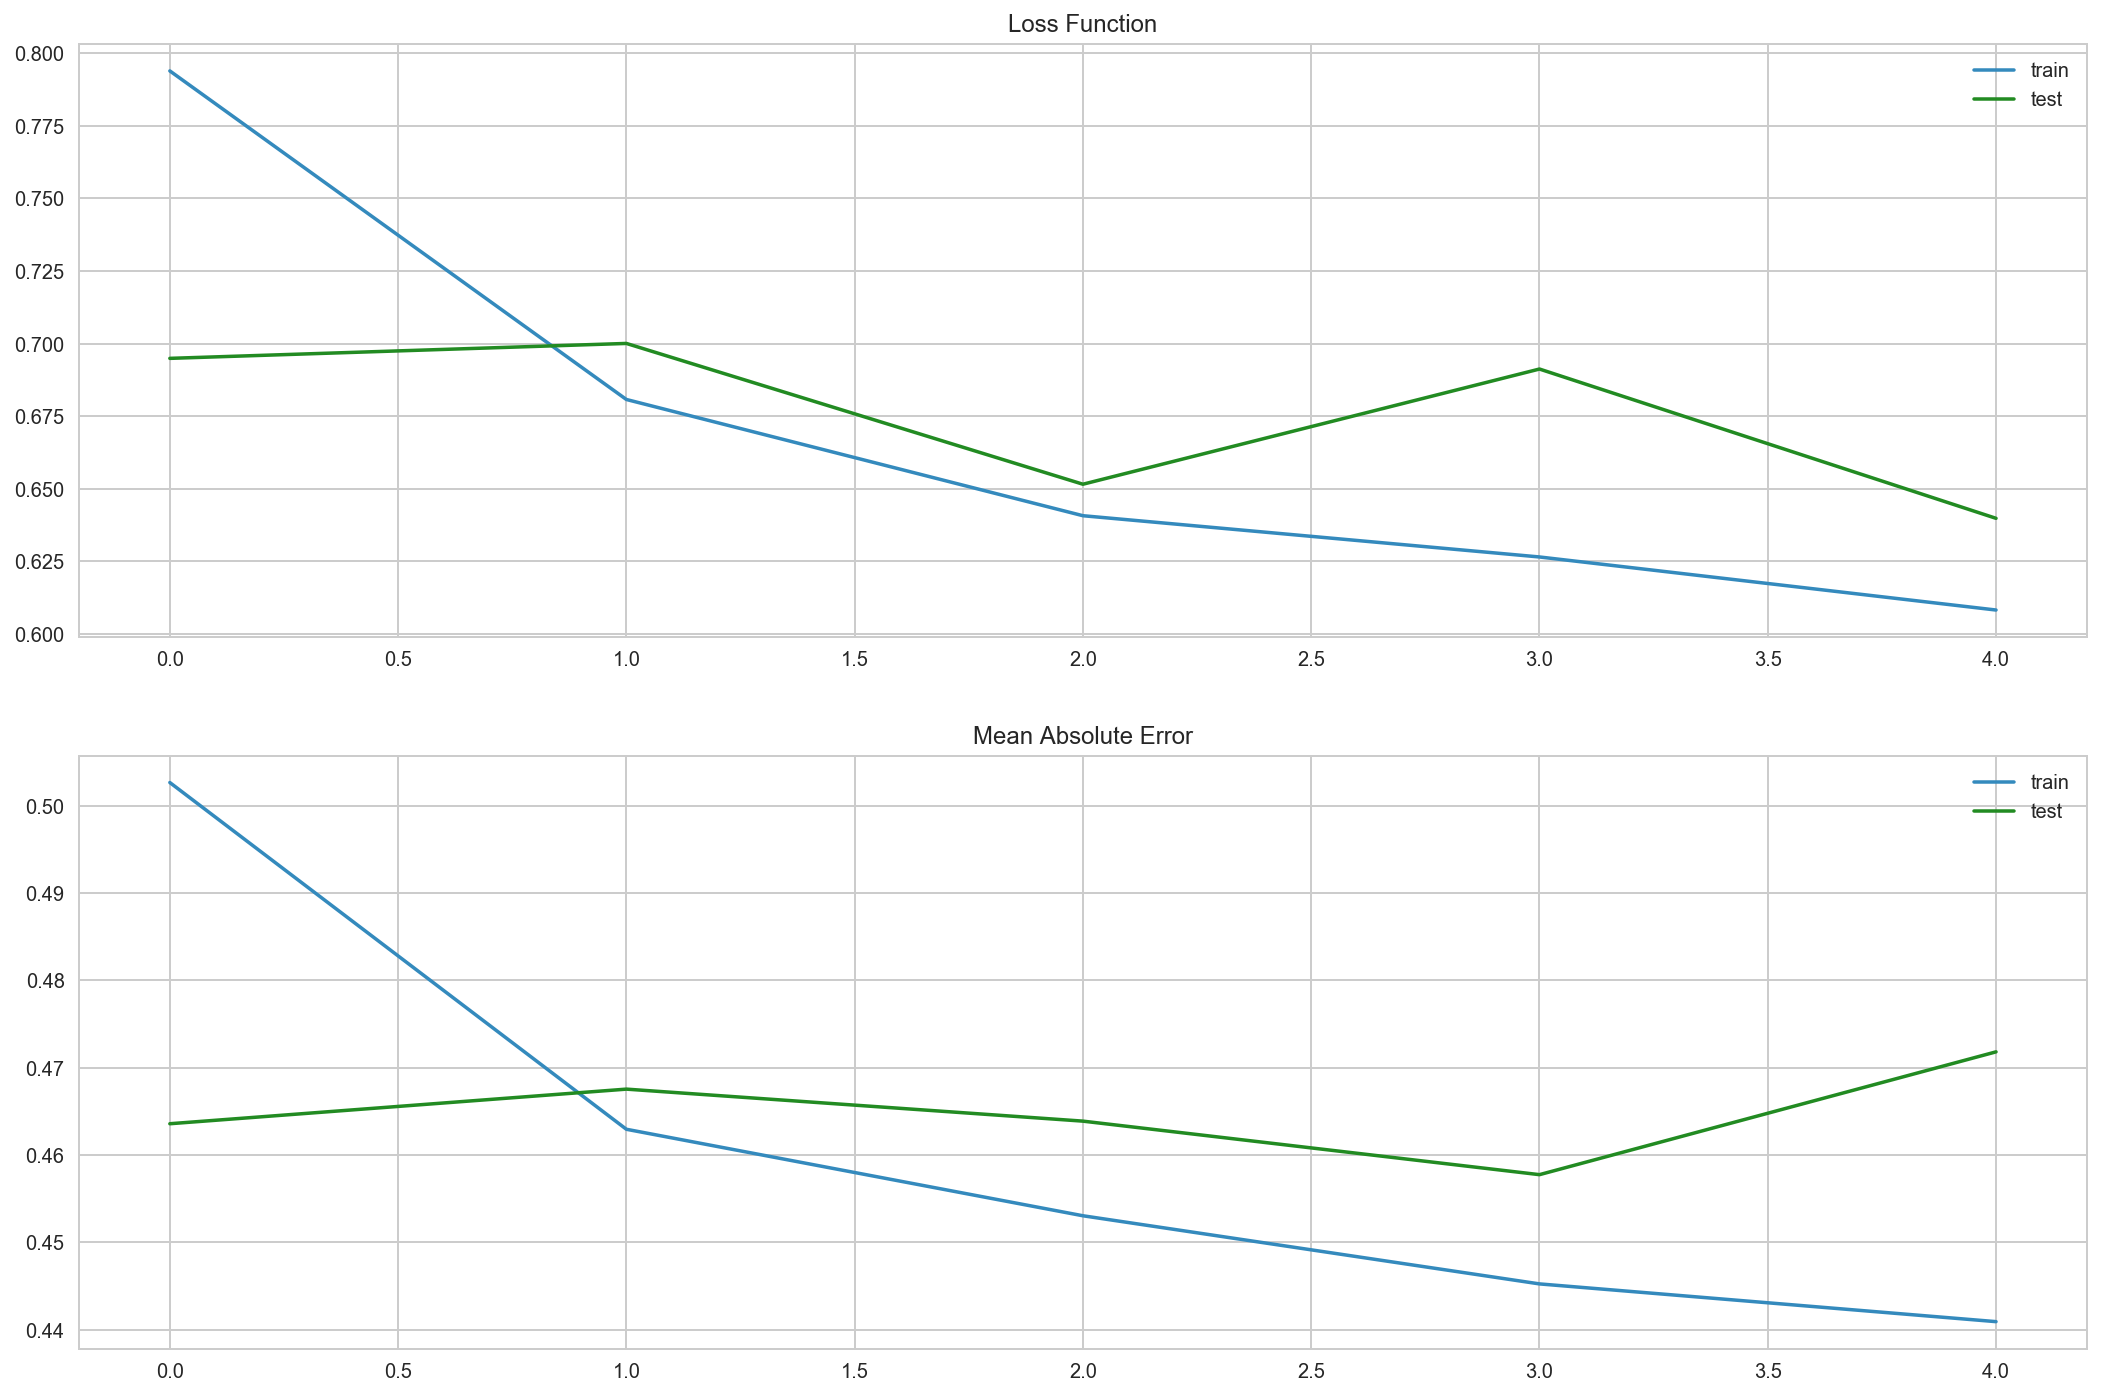

In [139]:
hide_code
history_plot(rnn_history)

In [140]:
hide_code
rnn_model.load_weights('weights.best.rnn.hdf5')

y_train_rnn = rnn_model.predict(X_train.reshape(-1, 1, 36))
y_test_rnn = rnn_model.predict(X_test.reshape(-1, 1, 36))

rnn_model.save('rnn_model_p6.h5')

print(separator, '\nNumeric Features')
scores('RNN Model', y_train, y_test, y_train_rnn, y_test_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.671431221925
EV score. Test:  0.680244859639
----------
R2 score. Train:  0.671299769447
R2 score. Test:  0.680214726591
----------
MSE score. Train:  0.597767520664
MSE score. Test:  0.639859596119
----------
MAE score. Train:  0.460049748743
MAE score. Test:  0.471822914923
----------
MdAE score. Train:  0.27352124385
MdAE score. Test:  0.278685333


In [144]:
hide_code
def rnn_cat_model():
    model = Sequential()
    
    model.add(LSTM(156, return_sequences=True, input_shape=(1, 44)))
    model.add(LSTM(624, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_cat_model = rnn_cat_model()
rnn_cat_checkpointer = ModelCheckpoint(filepath='weights.best.rnn_cat.hdf5', 
                                       verbose=2, save_best_only=True)
rnn_cat_history = rnn_cat_model.fit(X_train_cat.reshape(-1, 1, 44), y_train_cat.reshape(-1), 
                                    epochs=10, verbose=0, callbacks=[rnn_cat_checkpointer],
                                    validation_data=(X_test_cat.reshape(-1, 1, 44), y_test_cat.reshape(-1)))

Epoch 00000: val_loss improved from inf to 0.69302, saving model to weights.best.rnn_cat.hdf5
Epoch 00001: val_loss improved from 0.69302 to 0.66242, saving model to weights.best.rnn_cat.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss improved from 0.66242 to 0.62712, saving model to weights.best.rnn_cat.hdf5
Epoch 00004: val_loss improved from 0.62712 to 0.61226, saving model to weights.best.rnn_cat.hdf5
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss improved from 0.61226 to 0.60845, saving model to weights.best.rnn_cat.hdf5
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve


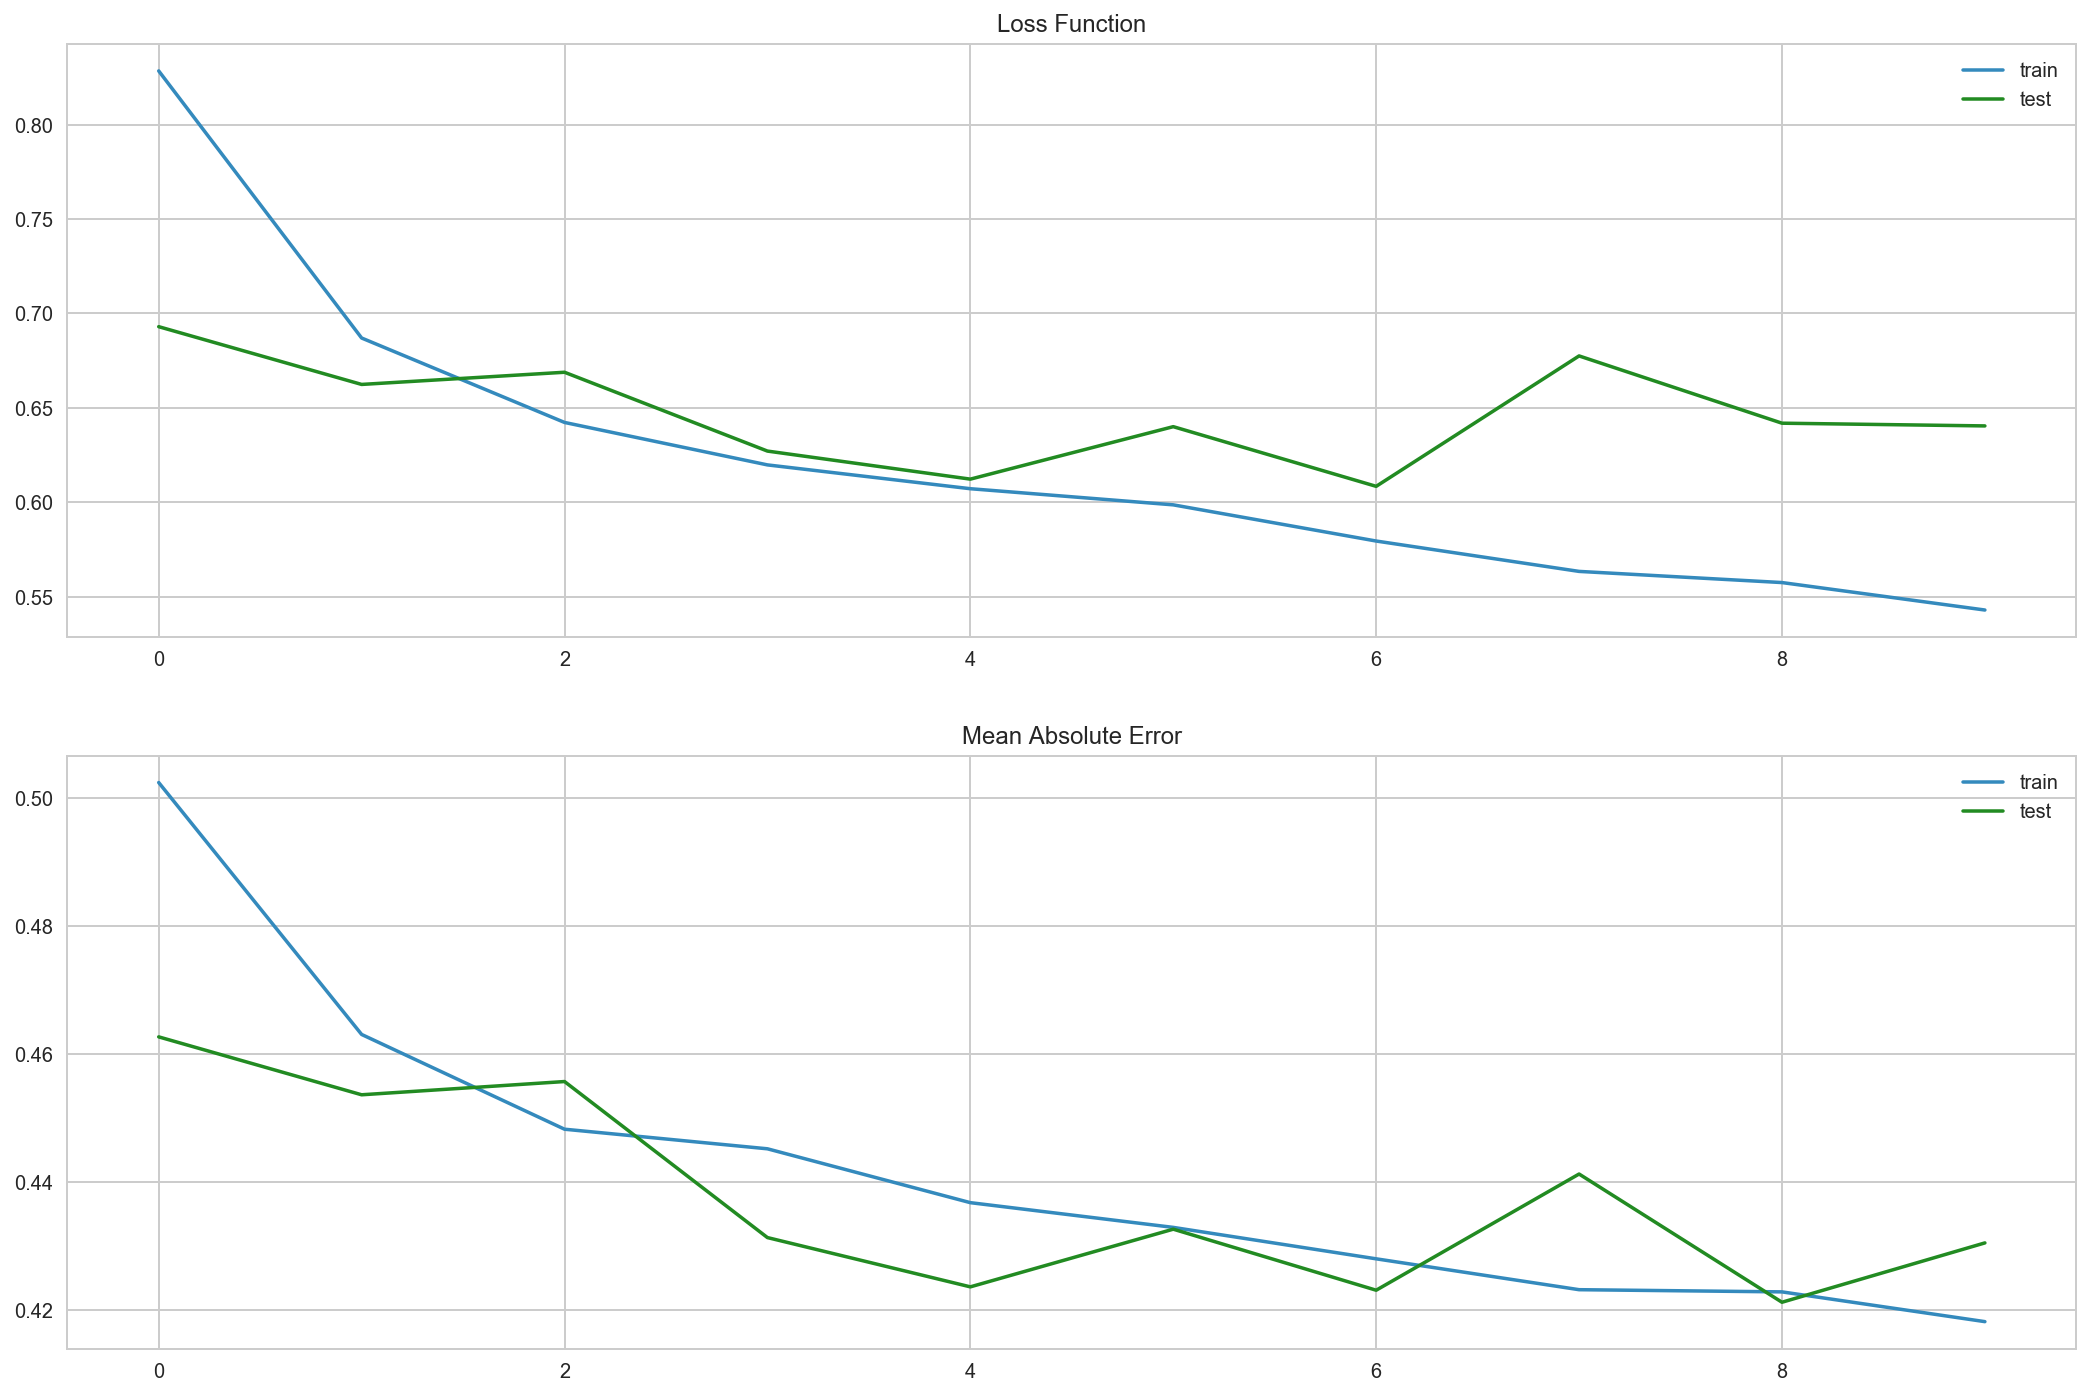

In [145]:
hide_code
history_plot(rnn_cat_history)

In [146]:
hide_code
rnn_cat_model.load_weights('weights.best.rnn_cat.hdf5')

y_train_cat_rnn = rnn_cat_model.predict(X_train_cat.reshape(-1, 1, 44))
y_test_cat_rnn = rnn_cat_model.predict(X_test_cat.reshape(-1, 1, 44))

rnn_cat_model.save('rnn_cat_model_p6.h5')

print(separator, '\nNumeric and Categorical Features')
scores('RNN Model', 
       y_train_cat, y_test_cat, y_train_cat_rnn, y_test_cat_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.703548395788
EV score. Test:  0.696297295072
----------
R2 score. Train:  0.702720761882
R2 score. Test:  0.695914703787
----------
MSE score. Train:  0.540625946065
MSE score. Test:  0.608445450743
----------
MAE score. Train:  0.410667137139
MAE score. Test:  0.42307076627
----------
MdAE score. Train:  0.207029392024
MdAE score. Test:  0.212416013762


In [147]:
hide_code
def rnn_cat_enc_model():
    model = Sequential()
    
    model.add(LSTM(159, return_sequences=True, input_shape=(1, 636)))
    model.add(LSTM(636, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_cat_enc_model = rnn_cat_enc_model()
rnn_cat_enc_checkpointer = ModelCheckpoint(filepath='weights.best.rnn_cat_enc.hdf5', 
                                           verbose=2, save_best_only=True)
rnn_cat_enc_history = \
rnn_cat_enc_model.fit(X_train_cat_enc.reshape(-1, 1, 636), y_train_cat_enc.reshape(-1), 
                      epochs=10, verbose=0, callbacks=[rnn_cat_enc_checkpointer],
                      validation_data=(X_test_cat_enc.reshape(-1, 1, 636), y_test_cat_enc.reshape(-1)))

Epoch 00000: val_loss improved from inf to 0.69237, saving model to weights.best.rnn_cat_enc.hdf5
Epoch 00001: val_loss improved from 0.69237 to 0.67024, saving model to weights.best.rnn_cat_enc.hdf5
Epoch 00002: val_loss improved from 0.67024 to 0.60691, saving model to weights.best.rnn_cat_enc.hdf5
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve


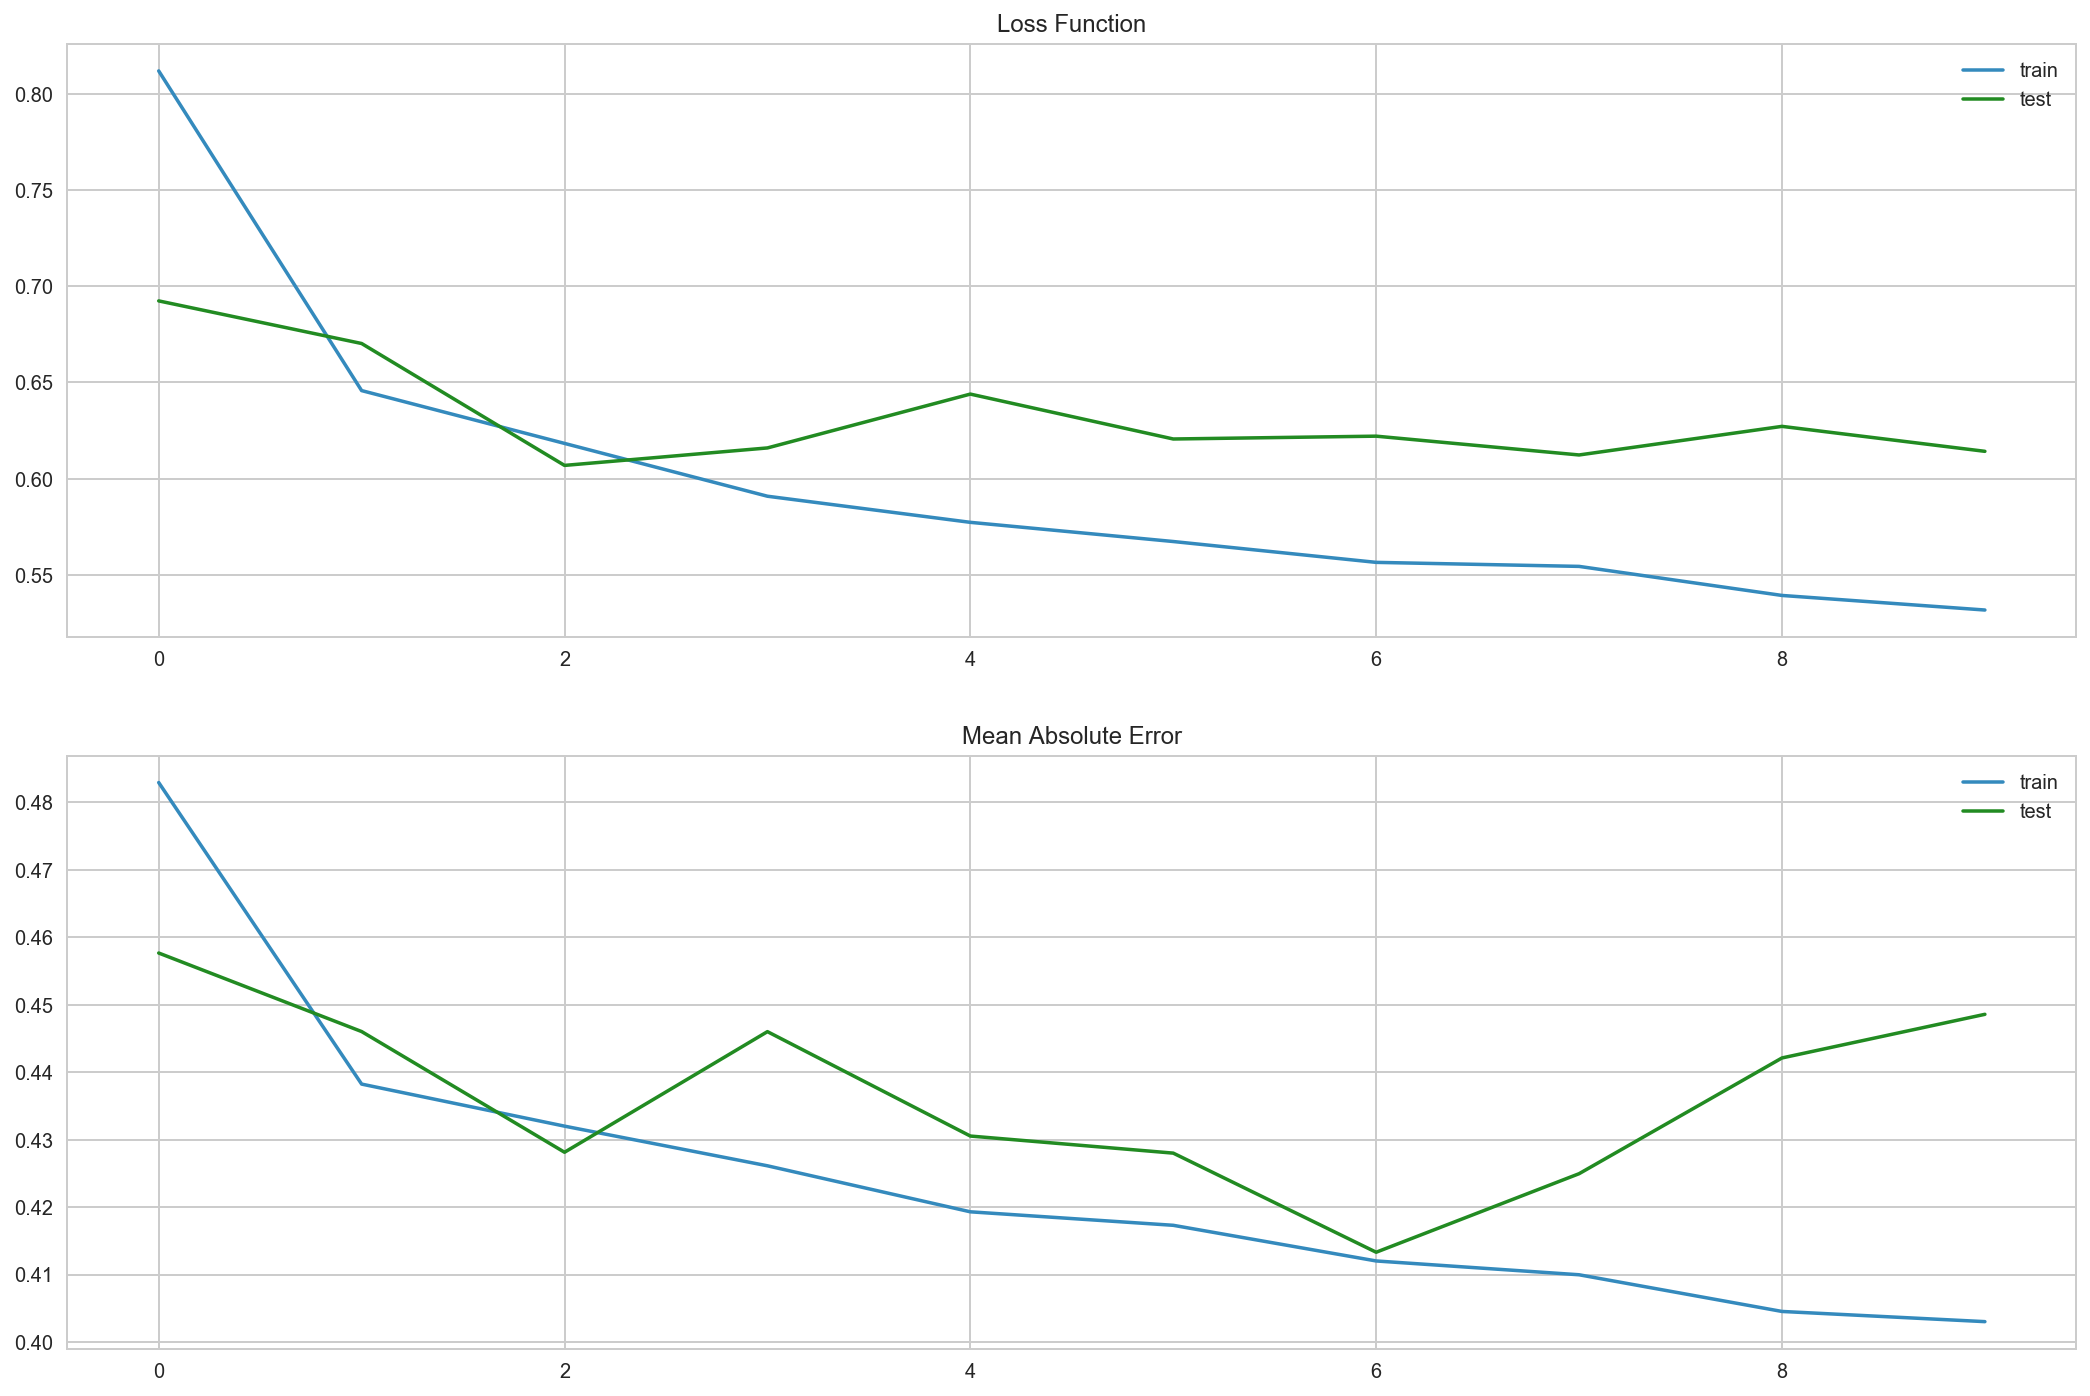

In [148]:
hide_code
history_plot(rnn_cat_enc_history)

In [149]:
hide_code
rnn_cat_enc_model.load_weights('weights.best.rnn_cat_enc.hdf5')

y_train_cat_enc_rnn = rnn_cat_enc_model.predict(X_train_cat_enc.reshape(-1, 1, 636))
y_test_cat_enc_rnn = rnn_cat_enc_model.predict(X_test_cat_enc.reshape(-1, 1, 636))

rnn_cat_enc_model.save('rnn_cat_enc_model_p6.h5')

print(separator, '\nNumeric and Encoded Categorical Features')
scores('RNN Model', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_rnn, y_test_cat_enc_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Encoded Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.695078966011
EV score. Test:  0.696768138719
----------
R2 score. Train:  0.695073645906
R2 score. Test:  0.69668235308
----------
MSE score. Train:  0.554532834872
MSE score. Test:  0.60690945829
----------
MAE score. Train:  0.409431456101
MAE score. Test:  0.428132265344
----------
MdAE score. Train:  0.207926585926
MdAE score. Test:  0.220357726018


#### Display Predictions

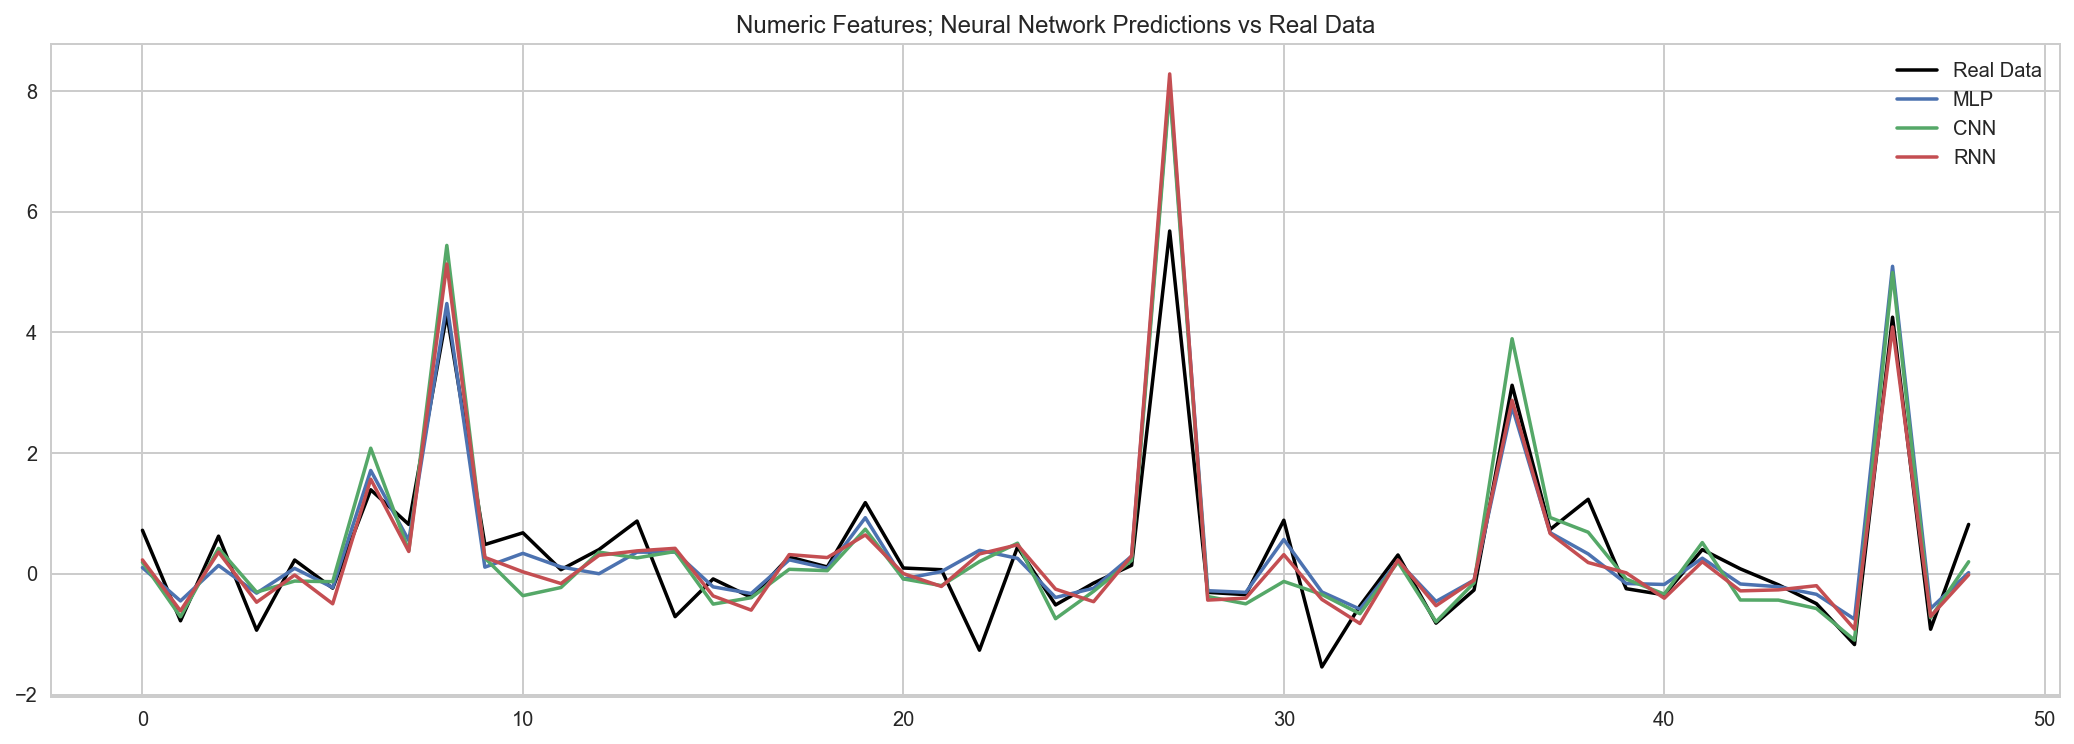

In [150]:
hide_code
plt.figure(figsize = (18, 6))
plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_mlp[1:50], label='MLP')
plt.plot(y_test_cnn[1:50], label='CNN')
plt.plot(y_test_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric Features; Neural Network Predictions vs Real Data");

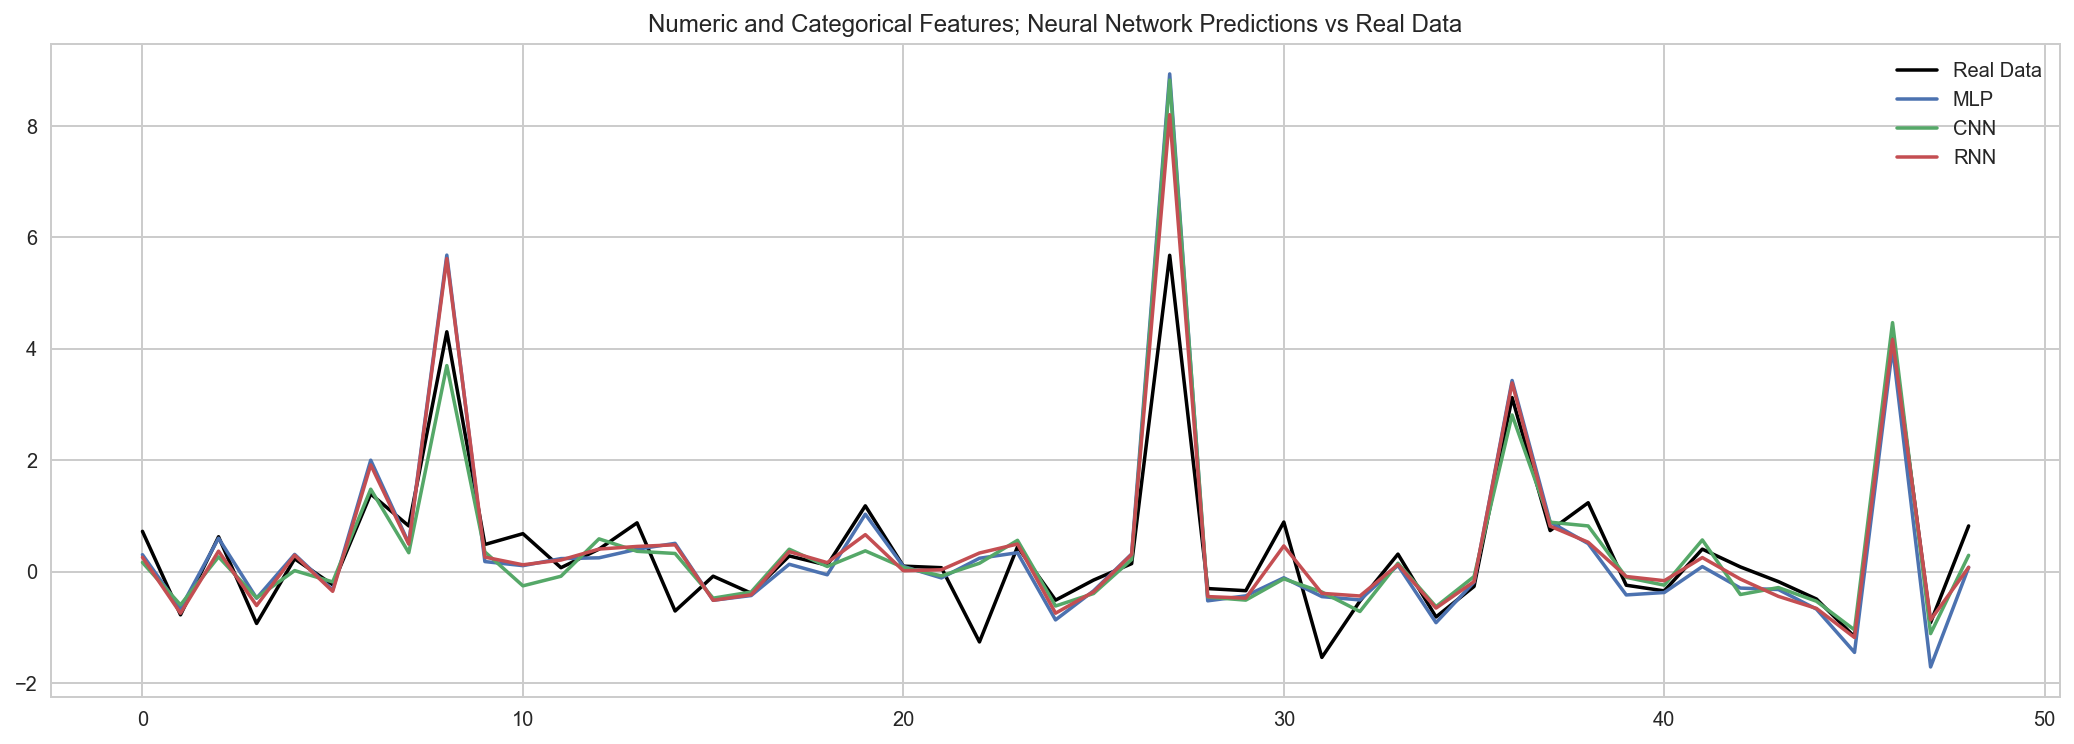

In [151]:
hide_code
plt.figure(figsize = (18, 6))
plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_mlp[1:50], label='MLP')
plt.plot(y_test_cat_cnn[1:50], label='CNN')
plt.plot(y_test_cat_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Categorical Features; Neural Network Predictions vs Real Data");

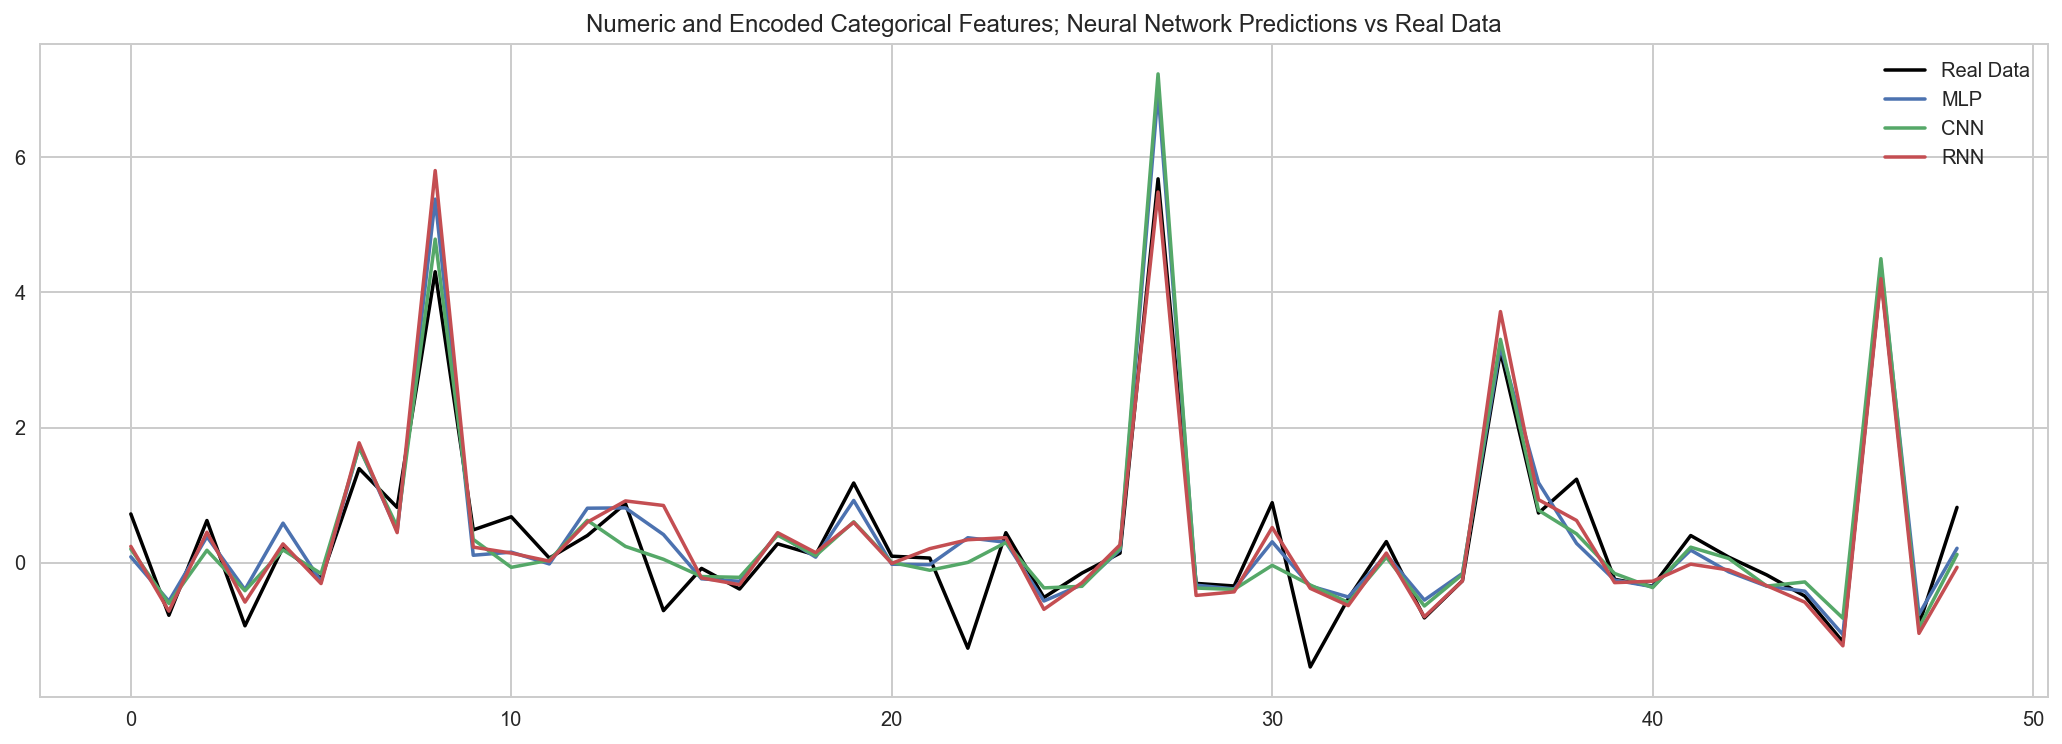

In [152]:
hide_code
plt.figure(figsize = (18, 6))
plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_enc_mlp[1:50], label='MLP')
plt.plot(y_test_cat_enc_cnn[1:50], label='CNN')
plt.plot(y_test_cat_enc_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Encoded Categorical Features; Neural Network Predictions vs Real Data");

## Evaluation Metrics and Predictions
- explained variance regression score
- coefficient of determination
- mean squared error
- mean absolute error
- median absolute error

In [158]:
hide_code
target_scale = RobustScaler()
s_target_train = target_scale.fit_transform(target_train.reshape(-1,1))
######################################################################################
feature_scale = RobustScaler()
s_features_train = feature_scale.fit_transform(features_train)
s_features_test = feature_scale.transform(features_test)
######################################################################################
feature_cat_scale = RobustScaler()
s_features_train_cat = feature_cat_scale.fit_transform(features_train_cat)
s_features_test_cat = feature_cat_scale.transform(features_test_cat)
######################################################################################
feature_cat_enc_scale = RobustScaler()
s_features_train_cat_enc = feature_cat_enc_scale.fit_transform(features_train_cat_enc)
s_features_test_cat_enc = feature_cat_enc_scale.transform(features_test_cat_enc)

### Regressors; Scikit-Learn
#### Numeric Features

In [159]:
hide_code
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=360)
gbr.fit(s_features_train, s_target_train)
br = BaggingRegressor(n_estimators=360)
br.fit(s_features_train, s_target_train)

s_target_train_gbr = gbr.predict(s_features_train)
s_target_test_gbr = gbr.predict(s_features_test)
s_target_train_br = br.predict(s_features_train)
s_target_test_br = br.predict(s_features_test)
s_target_train_mlpr = mlpr.predict(s_features_train)
s_target_test_mlpr = mlpr.predict(s_features_test)

scores2('Gradient Boosting Regressor', s_target_train, s_target_train_gbr)
scores2('Bagging Regressor', s_target_train, s_target_train_br)
scores2('MLP Regressor', s_target_train, s_target_train_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Gradient Boosting Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.851729559483
----------
R2 score: 0.851729559483
----------
MSE score: 0.273663122104
----------
MAE score: 0.324355312761
----------
MdAE score: 0.17539487972
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Bagging Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.958673168561
----------
R2 score: 0.958649811062
----------
MSE score: 0.0763201469208
----------
MAE score: 0.144578783039
----------
MdAE score: 0.0628286831822
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.699354284618
----------
R2 score: 0.69932065661
----------
MSE score: 0.554964614506
----------
MAE score: 0.423522294048
----------
MdAE score: 0.234736923498


#### Numeric and Categorical Features

In [160]:
hide_code
gbr_cat = GradientBoostingRegressor(max_depth=3, n_estimators=396)
gbr_cat.fit(s_features_train_cat, s_target_train)
br_cat = BaggingRegressor(n_estimators=308)
br_cat.fit(s_features_train_cat, s_target_train)

s_target_train_cat_gbr = gbr_cat.predict(s_features_train_cat)
s_target_test_cat_gbr = gbr_cat.predict(s_features_test_cat)
s_target_train_cat_br = br_cat.predict(s_features_train_cat)
s_target_test_cat_br = br_cat.predict(s_features_test_cat)
s_target_train_cat_mlpr = mlpr_cat.predict(s_features_train_cat)
s_target_test_cat_mlpr = mlpr_cat.predict(s_features_test_cat)

scores2('Gradient Boosting Regressor', s_target_train, s_target_train_cat_gbr)
scores2('Bagging Regressor', s_target_train, s_target_train_cat_br)
scores2('MLP Regressor', s_target_train, s_target_train_cat_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Gradient Boosting Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.813227343634
----------
R2 score: 0.813227343634
----------
MSE score: 0.344726757987
----------
MAE score: 0.357167721423
----------
MdAE score: 0.190744564286
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Bagging Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.958401319901
----------
R2 score: 0.958376833249
----------
MSE score: 0.0768239827516
----------
MAE score: 0.144458842366
----------
MdAE score: 0.0621988196009
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.713929709415
----------
R2 score: 0.71392710523
----------
MSE score: 0.528005455834
----------
MAE score: 0.415068371286
----------
MdAE score: 0.226551595988


#### Numeric and Encoded Categorical Features

In [161]:
hide_code
gbr_cat_enc = GradientBoostingRegressor(max_depth=4, n_estimators=318)
gbr_cat_enc.fit(s_features_train_cat_enc, s_target_train)
br_cat_enc = BaggingRegressor(n_estimators=159)
br_cat_enc.fit(s_features_train_cat_enc, s_target_train)

s_target_train_cat_enc_gbr = gbr_cat_enc.predict(s_features_train_cat_enc)
s_target_test_cat_enc_gbr = gbr_cat_enc.predict(s_features_test_cat_enc)
s_target_train_cat_enc_br = br_cat.predict(s_features_train_cat_enc)
s_target_test_cat_enc_br = br_cat.predict(s_features_test_cat_enc)
s_target_train_cat_enc_mlpr = mlpr_cat_enc.predict(s_features_train_cat_enc)
s_target_test_cat_enc_mlpr = mlpr_cat_enc.predict(s_features_test_cat_enc)

scores2('Gradient Boosting Regressor', s_target_train, s_target_train_cat_enc_gbr)
scores2('Bagging Regressor', s_target_train, s_target_train_cat_enc_br)
scores2('MLP Regressor', s_target_train, s_target_train_cat_enc_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Gradient Boosting Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.835548897222
----------
R2 score: 0.835548897222
----------
MSE score: 0.303527810822
----------
MAE score: 0.339775897345
----------
MdAE score: 0.183338754074
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Bagging Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.919889093965
----------
R2 score: 0.919788326366
----------
MSE score: 0.148046886213
----------
MAE score: 0.201599986829
----------
MdAE score: 0.0919321248199
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.741545391123
----------
R2 score: 0.74151850405
----------
MSE score: 0.477079942171
----------
MAE score: 0.403509095175
----------
MdAE score: 0.214798934835


### Neural Networks; Keras
#### Numeric Features

In [162]:
hide_code
s_target_train_mlp = mlp_model.predict(s_features_train)
s_target_test_mlp = mlp_model.predict(s_features_test)
s_target_train_cnn = cnn_model.predict(s_features_train.reshape(-1, 36, 1))
s_target_test_cnn = cnn_model.predict(s_features_test.reshape(-1, 36, 1))
s_target_train_rnn = rnn_model.predict(s_features_train.reshape(-1, 1, 36))
s_target_test_rnn = rnn_model.predict(s_features_test.reshape(-1, 1, 36))

scores2('MLP', s_target_train, s_target_train_mlp)
scores2('CNN', s_target_train, s_target_train_cnn)
scores2('RNN', s_target_train, s_target_train_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.703448604353
----------
R2 score: 0.703080754155
----------
MSE score: 0.548024593084
----------
MAE score: 0.438609549777
----------
MdAE score: 0.244033662606
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.722543352699
----------
R2 score: 0.722541570794
----------
MSE score: 0.512105715244
----------
MAE score: 0.421598939355
----------
MdAE score: 0.229351729867
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.673192254985
----------
R2 score: 0.673121688551
----------
MSE score: 0.603320115238
----------
MAE score: 0.46149894987
----------
MdAE score: 0.274319756321


#### Numeric and Categorical Features

In [163]:
hide_code
s_target_train_cat_mlp = mlp_cat_model.predict(s_features_train_cat)
s_target_test_cat_mlp = mlp_cat_model.predict(s_features_test_cat)
s_target_train_cat_cnn = cnn_cat_model.predict(s_features_train_cat.reshape(-1, 44, 1))
s_target_test_cat_cnn = cnn_cat_model.predict(s_features_test_cat.reshape(-1, 44, 1))
s_target_train_cat_rnn = rnn_cat_model.predict(s_features_train_cat.reshape(-1, 1, 44))
s_target_test_cat_rnn = rnn_cat_model.predict(s_features_test_cat.reshape(-1, 1, 44))

scores2('MLP', s_target_train, s_target_train_cat_mlp)
scores2('CNN', s_target_train, s_target_train_cat_cnn)
scores2('RNN', s_target_train, s_target_train_cat_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.703455962152
----------
R2 score: 0.703312838532
----------
MSE score: 0.547596234368
----------
MAE score: 0.429398732994
----------
MdAE score: 0.244127272542
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.722403633405
----------
R2 score: 0.721699194835
----------
MSE score: 0.513660490653
----------
MAE score: 0.430513914168
----------
MdAE score: 0.236649880217
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.701920380764
----------
R2 score: 0.701277009977
----------
MSE score: 0.551353768214
----------
MAE score: 0.412435759236
----------
MdAE score: 0.208014898253


#### Numeric and Encoded Categorical Features

In [164]:
hide_code
s_target_train_cat_enc_mlp = mlp_cat_enc_model.predict(s_features_train_cat_enc)
s_target_test_cat_enc_mlp = mlp_cat_enc_model.predict(s_features_test_cat_enc)
s_target_train_cat_enc_cnn = cnn_cat_enc_model.predict(s_features_train_cat_enc.reshape(-1, 636, 1))
s_target_test_cat_enc_cnn = cnn_cat_enc_model.predict(s_features_test_cat_enc.reshape(-1, 636, 1))
s_target_train_cat_enc_rnn = rnn_cat_enc_model.predict(s_features_train_cat_enc.reshape(-1, 1, 636))
s_target_test_cat_enc_rnn = rnn_cat_enc_model.predict(s_features_test_cat_enc.reshape(-1, 1, 636))

scores2('MLP', s_target_train, s_target_train_cat_enc_mlp)
scores2('CNN', s_target_train, s_target_train_cat_enc_cnn)
scores2('RNN', s_target_train, s_target_train_cat_enc_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.731839791389
----------
R2 score: 0.728046880876
----------
MSE score: 0.501944550686
----------
MAE score: 0.392924405114
----------
MdAE score: 0.190418202392
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.688685529597
----------
R2 score: 0.688317969766
----------
MSE score: 0.575272301074
----------
MAE score: 0.433003671962
----------
MdAE score: 0.225702012559
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.695444478217
----------
R2 score: 0.695441116541
----------
MSE score: 0.562125091294
----------
MAE score: 0.412760128732
----------
MdAE score: 0.211032679125


### Display All Predictions

In [165]:
hide_code
# Rescale Predictions
target_train_gbr = target_scale.inverse_transform(s_target_train_gbr.reshape(-1,1))
target_test_gbr = target_scale.inverse_transform(s_target_test_gbr.reshape(-1,1))
target_train_br = target_scale.inverse_transform(s_target_train_br.reshape(-1,1))
target_test_br = target_scale.inverse_transform(s_target_test_br.reshape(-1,1))
target_train_mlpr = target_scale.inverse_transform(s_target_train_mlpr.reshape(-1,1))
target_test_mlpr = target_scale.inverse_transform(s_target_test_mlpr.reshape(-1,1))

target_train_mlp = target_scale.inverse_transform(s_target_train_mlp)
target_test_mlp = target_scale.inverse_transform(s_target_test_mlp)
target_train_cnn = target_scale.inverse_transform(s_target_train_cnn)
target_test_cnn = target_scale.inverse_transform(s_target_test_cnn)
target_train_rnn = target_scale.inverse_transform(s_target_train_rnn)
target_test_rnn = target_scale.inverse_transform(s_target_test_rnn)

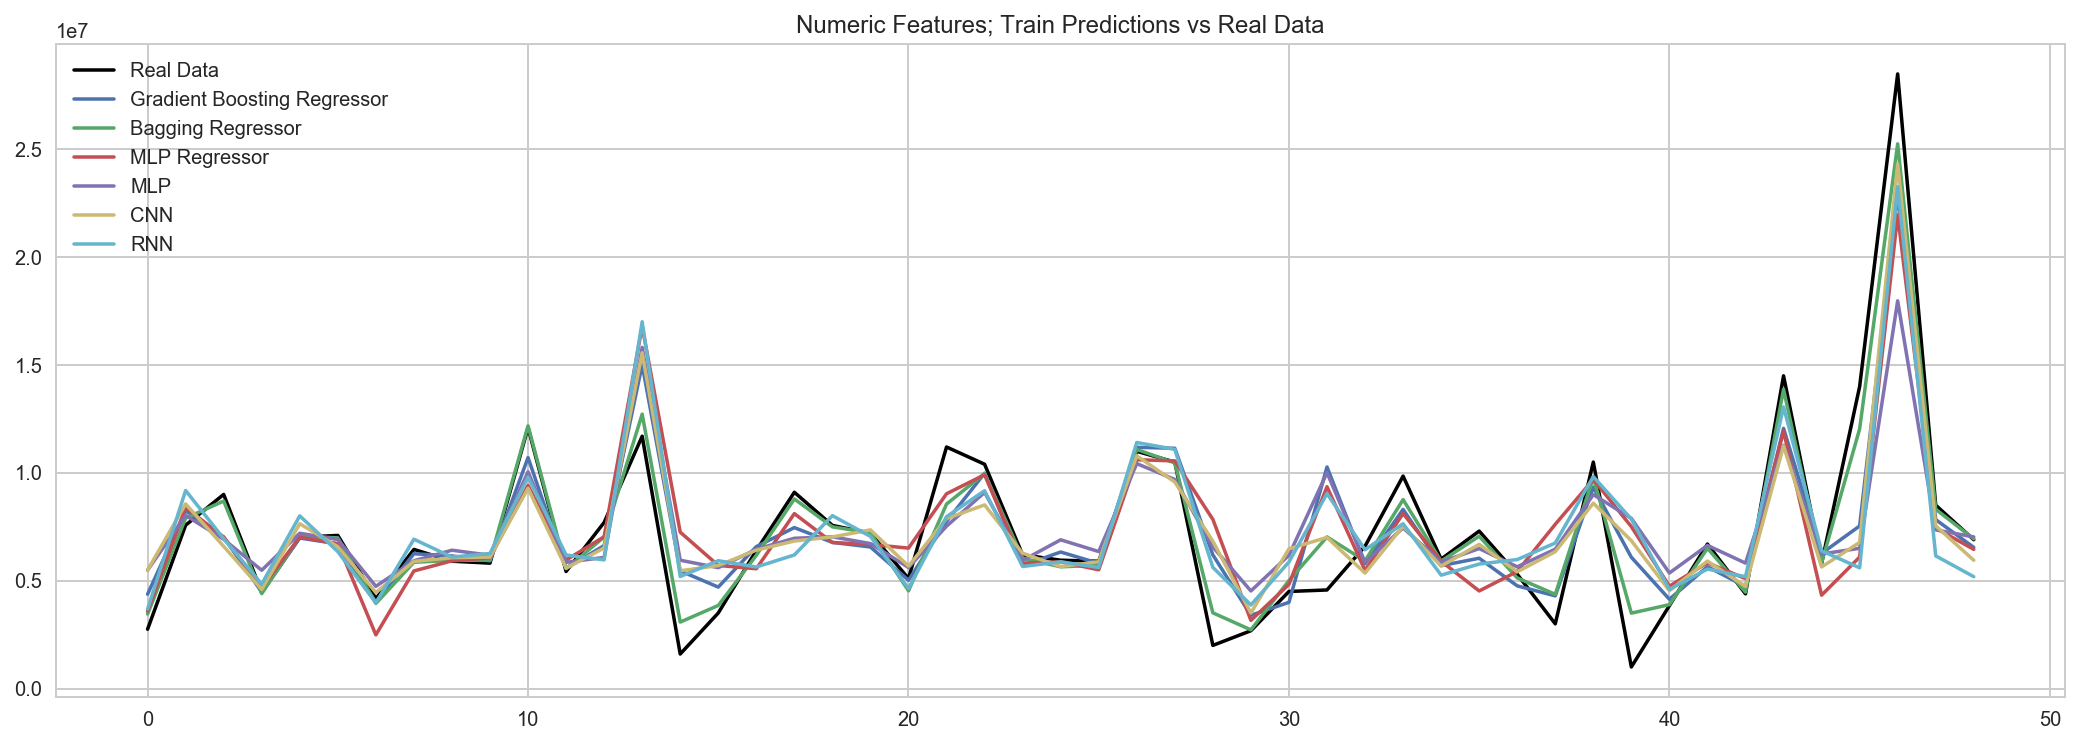

In [166]:
hide_code
plt.figure(figsize = (18, 6))
plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_br[1:50], label='Bagging Regressor')
plt.plot(target_train_mlpr[1:50], label='MLP Regressor')

plt.plot(target_train_mlp[1:50], label='MLP')
plt.plot(target_train_cnn[1:50], label='CNN')
plt.plot(target_train_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric Features; Train Predictions vs Real Data");

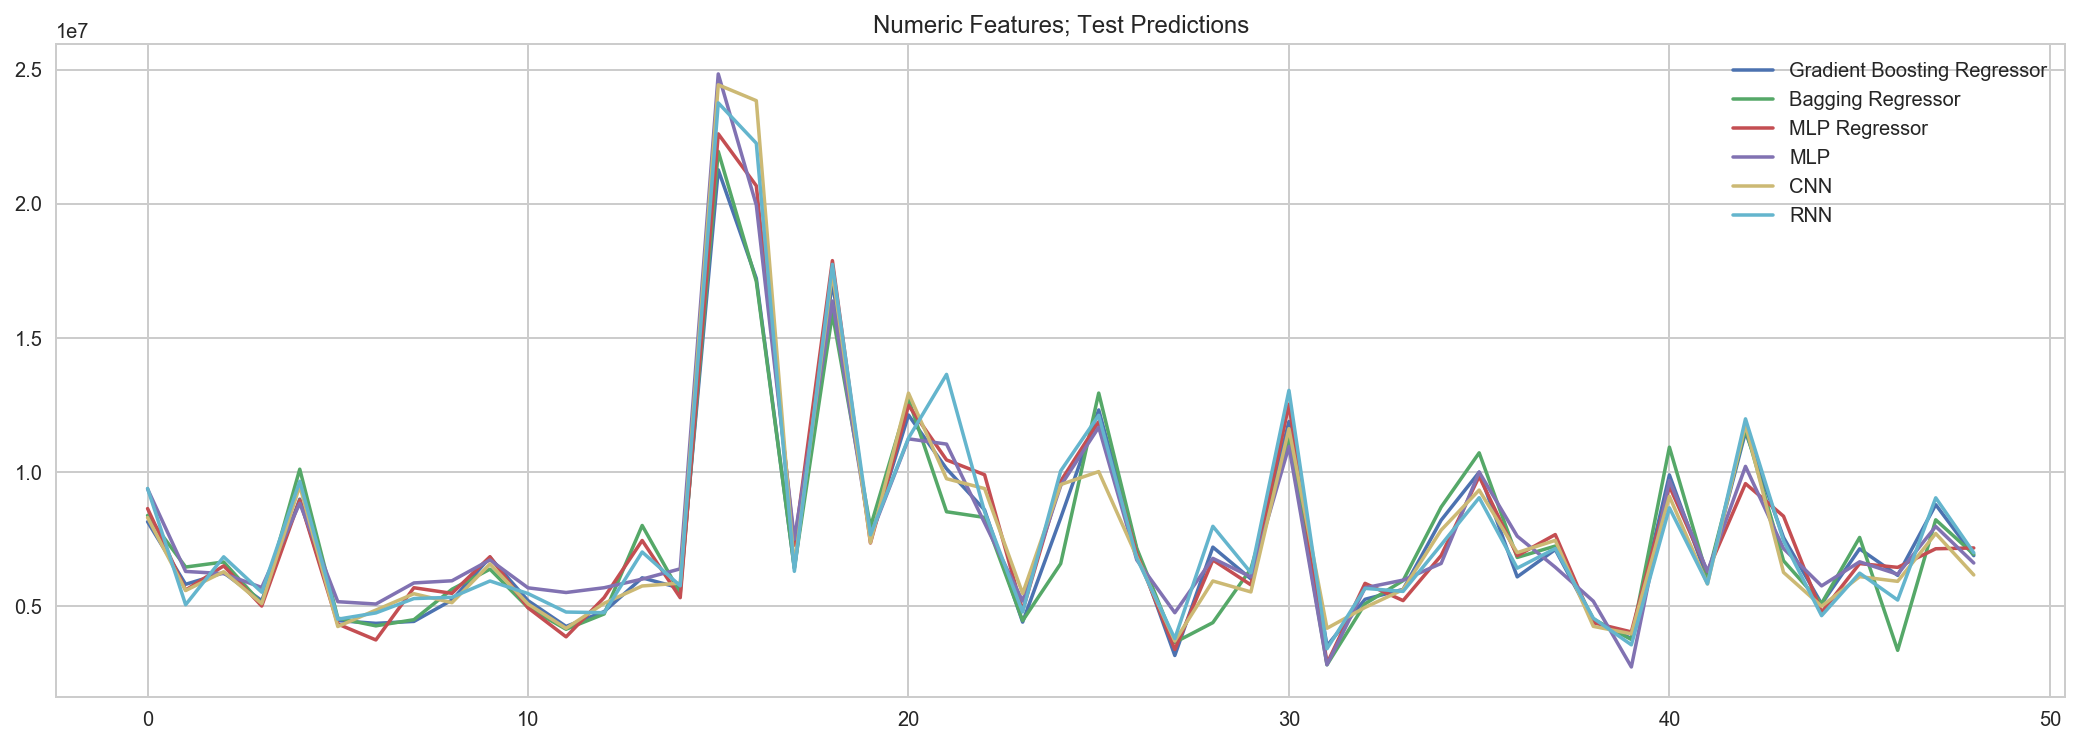

In [167]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_br[1:50], label='Bagging Regressor')
plt.plot(target_test_mlpr[1:50], label='MLP Regressor')

plt.plot(target_test_mlp[1:50], label='MLP')
plt.plot(target_test_cnn[1:50], label='CNN')
plt.plot(target_test_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric Features; Test Predictions");

In [168]:
hide_code
# Rescale Predictions
target_train_cat_gbr = target_scale.inverse_transform(s_target_train_cat_gbr.reshape(-1,1))
target_test_cat_gbr = target_scale.inverse_transform(s_target_test_cat_gbr.reshape(-1,1))
target_train_cat_br = target_scale.inverse_transform(s_target_train_cat_br.reshape(-1,1))
target_test_cat_br = target_scale.inverse_transform(s_target_test_cat_br.reshape(-1,1))
target_train_cat_mlpr = target_scale.inverse_transform(s_target_train_cat_mlpr.reshape(-1,1))
target_test_cat_mlpr = target_scale.inverse_transform(s_target_test_cat_mlpr.reshape(-1,1))

target_train_cat_mlp = target_scale.inverse_transform(s_target_train_cat_mlp.reshape(-1,1))
target_test_cat_mlp = target_scale.inverse_transform(s_target_test_cat_mlp.reshape(-1,1))
target_train_cat_cnn = target_scale.inverse_transform(s_target_train_cat_cnn.reshape(-1,1))
target_test_cat_cnn = target_scale.inverse_transform(s_target_test_cat_cnn.reshape(-1,1))
target_train_cat_rnn = target_scale.inverse_transform(s_target_train_cat_rnn.reshape(-1,1))
target_test_cat_rnn = target_scale.inverse_transform(s_target_test_cat_rnn.reshape(-1,1))

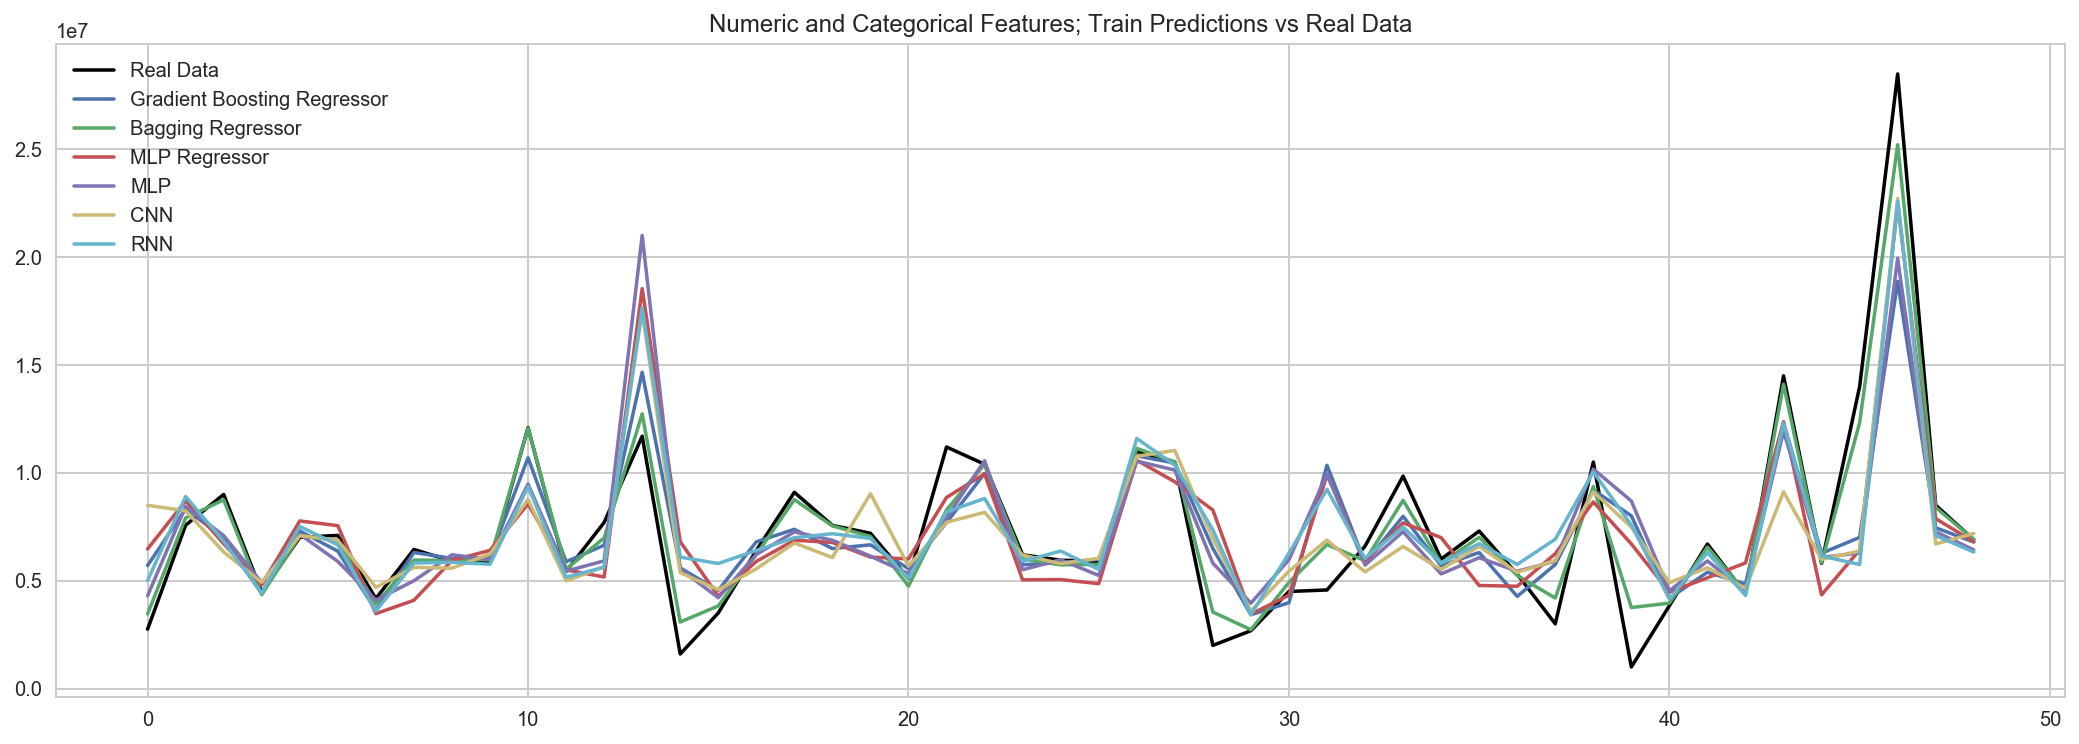

In [169]:
hide_code
plt.figure(figsize = (18, 6))
plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_cat_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_cat_br[1:50], label='Bagging Regressor')
plt.plot(target_train_cat_mlpr[1:50], label='MLP Regressor')

plt.plot(target_train_cat_mlp[1:50], label='MLP')
plt.plot(target_train_cat_cnn[1:50], label='CNN')
plt.plot(target_train_cat_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Categorical Features; Train Predictions vs Real Data");

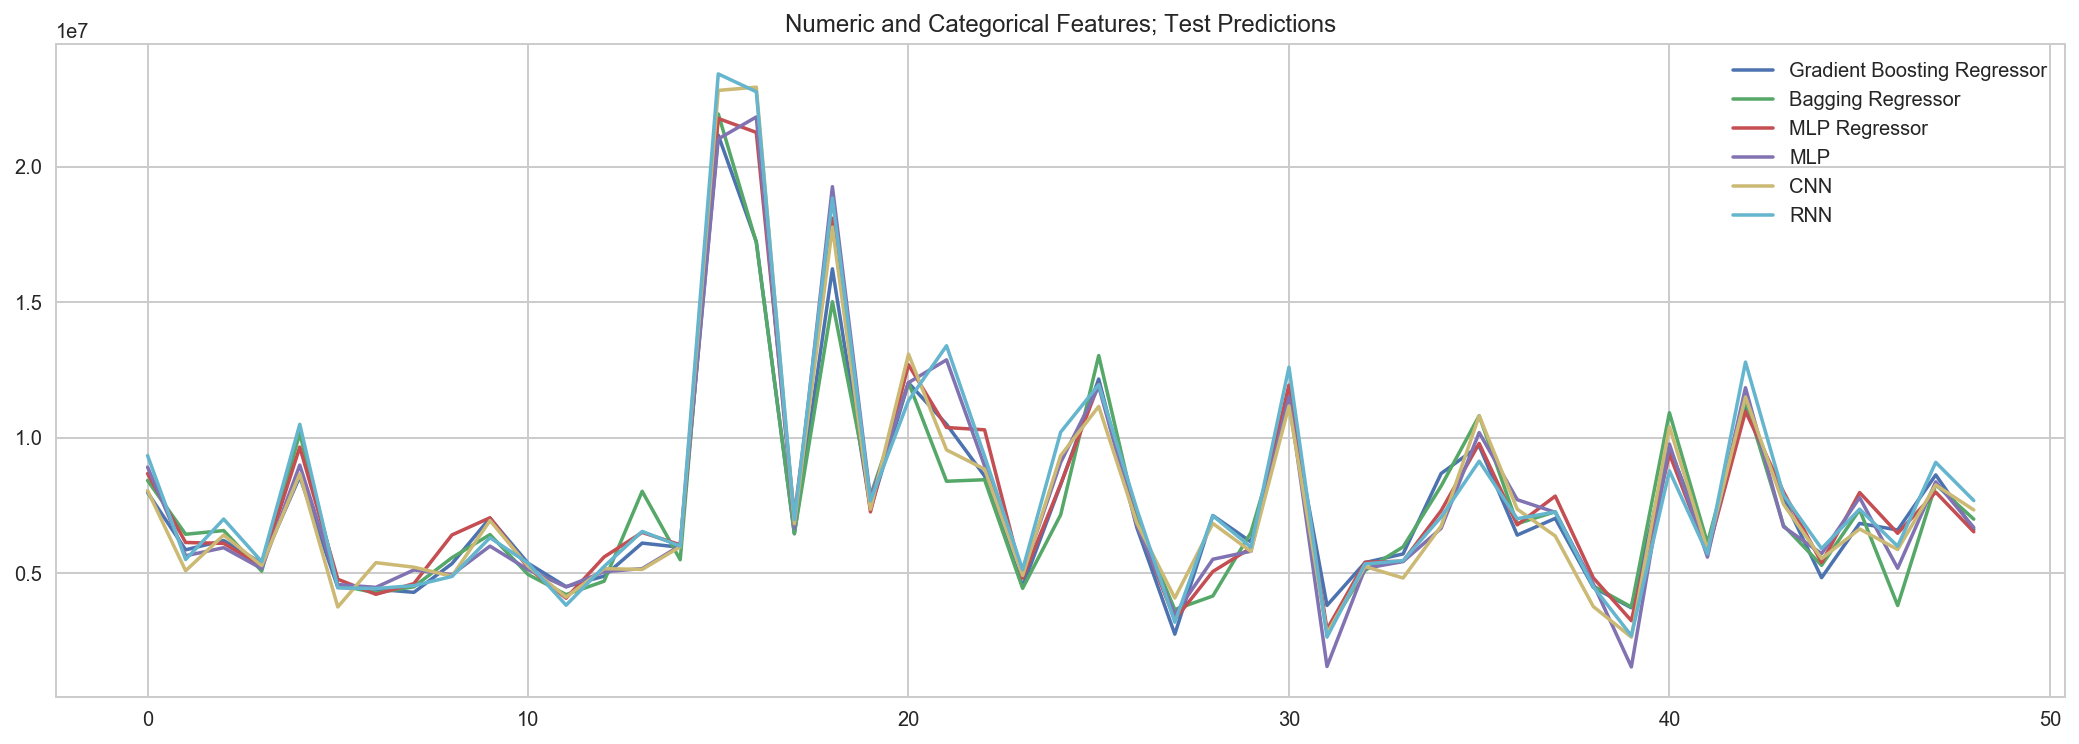

In [170]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_cat_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_cat_br[1:50], label='Bagging Regressor')
plt.plot(target_test_cat_mlpr[1:50], label='MLP Regressor')

plt.plot(target_test_cat_mlp[1:50], label='MLP')
plt.plot(target_test_cat_cnn[1:50], label='CNN')
plt.plot(target_test_cat_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Categorical Features; Test Predictions");

In [171]:
hide_code
# Rescale Predictions
target_train_cat_enc_gbr = target_scale.inverse_transform(s_target_train_cat_enc_gbr.reshape(-1,1))
target_test_cat_enc_gbr = target_scale.inverse_transform(s_target_test_cat_enc_gbr.reshape(-1,1))
target_train_cat_enc_br = target_scale.inverse_transform(s_target_train_cat_enc_br.reshape(-1,1))
target_test_cat_enc_br = target_scale.inverse_transform(s_target_test_cat_enc_br.reshape(-1,1))
target_train_cat_enc_mlpr = target_scale.inverse_transform(s_target_train_cat_enc_mlpr.reshape(-1,1))
target_test_cat_enc_mlpr = target_scale.inverse_transform(s_target_test_cat_enc_mlpr.reshape(-1,1))

target_train_cat_enc_mlp = target_scale.inverse_transform(s_target_train_cat_enc_mlp.reshape(-1,1))
target_test_cat_enc_mlp = target_scale.inverse_transform(s_target_test_cat_enc_mlp.reshape(-1,1))
target_train_cat_enc_cnn = target_scale.inverse_transform(s_target_train_cat_enc_cnn.reshape(-1,1))
target_test_cat_enc_cnn = target_scale.inverse_transform(s_target_test_cat_enc_cnn.reshape(-1,1))
target_train_cat_enc_rnn = target_scale.inverse_transform(s_target_train_cat_enc_rnn.reshape(-1,1))
target_test_cat_enc_rnn = target_scale.inverse_transform(s_target_test_cat_enc_rnn.reshape(-1,1))

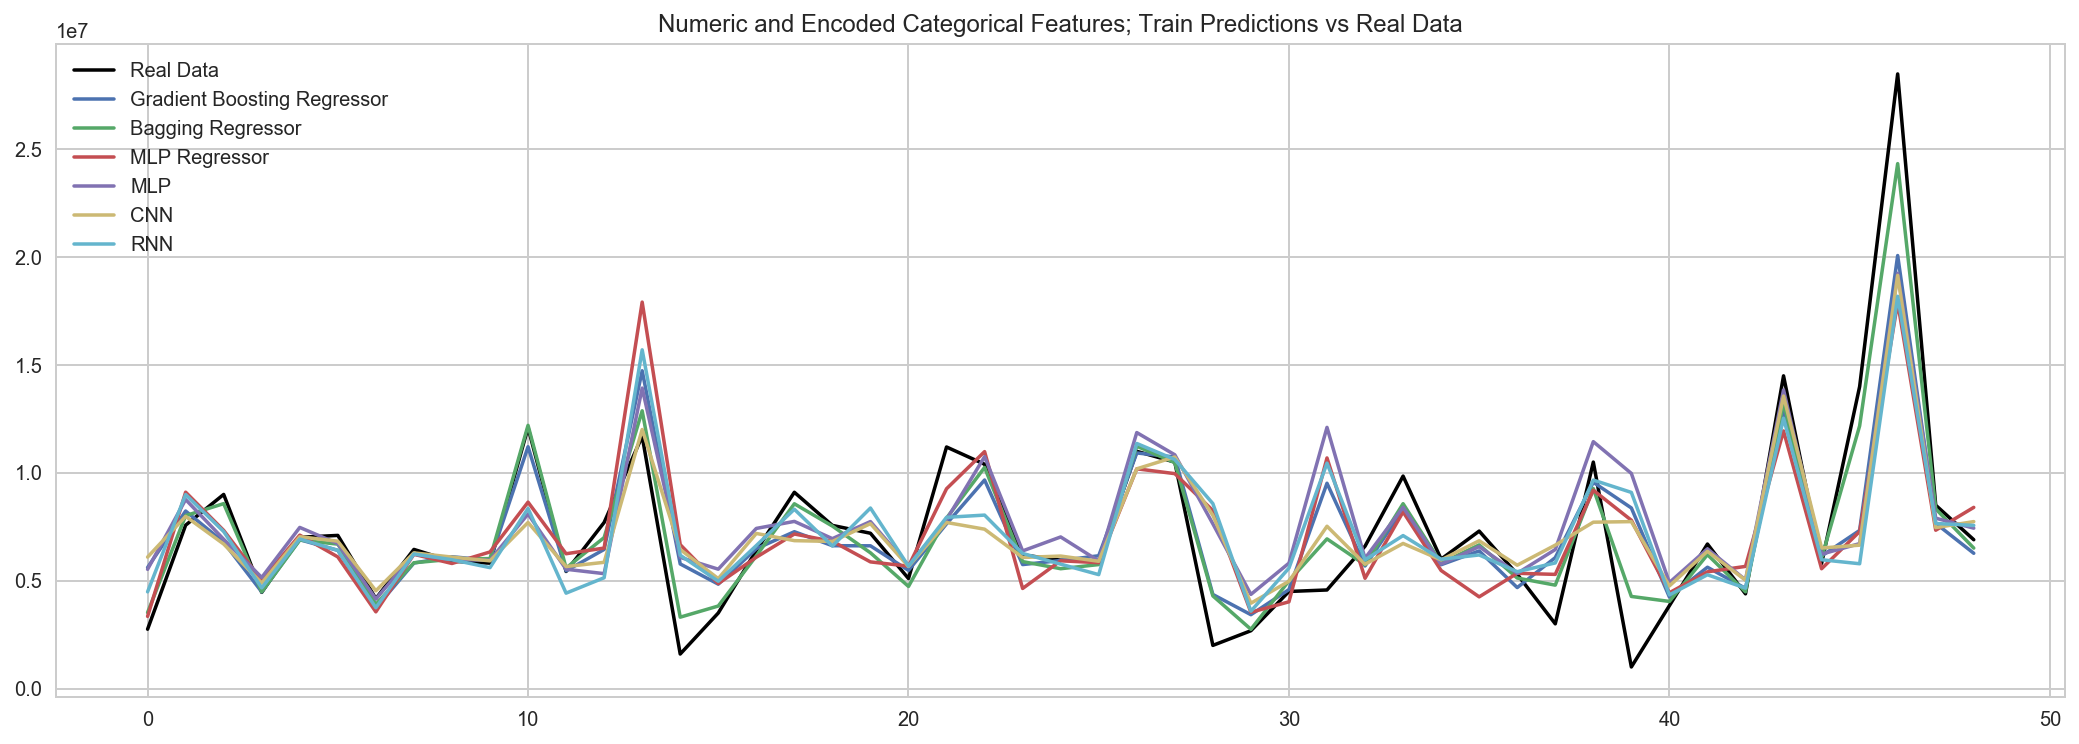

In [172]:
hide_code
plt.figure(figsize = (18, 6))
plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_cat_enc_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_cat_enc_br[1:50], label='Bagging Regressor')
plt.plot(target_train_cat_enc_mlpr[1:50], label='MLP Regressor')

plt.plot(target_train_cat_enc_mlp[1:50], label='MLP')
plt.plot(target_train_cat_enc_cnn[1:50], label='CNN')
plt.plot(target_train_cat_enc_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Encoded Categorical Features; Train Predictions vs Real Data");

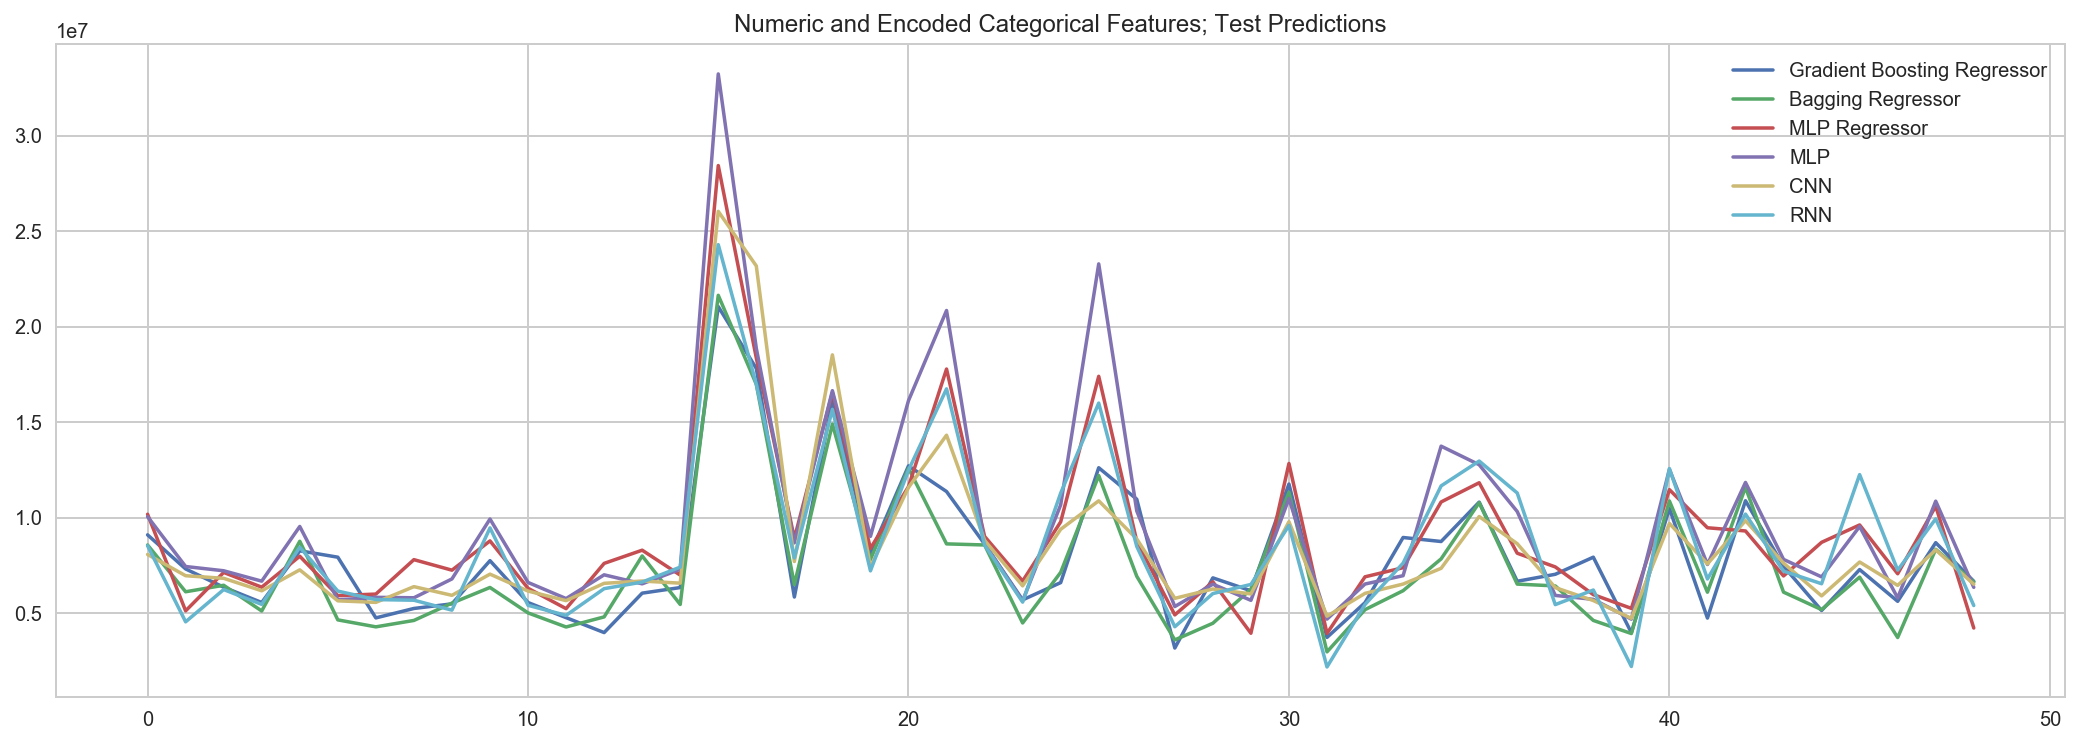

In [173]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_cat_enc_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_cat_enc_br[1:50], label='Bagging Regressor')
plt.plot(target_test_cat_enc_mlpr[1:50], label='MLP Regressor')

plt.plot(target_test_cat_enc_mlp[1:50], label='MLP')
plt.plot(target_test_cat_enc_cnn[1:50], label='CNN')
plt.plot(target_test_cat_enc_rnn[1:50], label='RNN')

plt.legend()
plt.title("Numeric and Encoded Categorical Features; Test Predictions");

## Project Design

The project was built on the basis of the competition offered on the site https://www.kaggle.com.

The competition version of this notebook is avalible here: https://www.kaggle.com/olgabelitskaya/sberbank-russian-housing-market .

There are several popular resources (numpy, pandas, matplotlib, scikit-learn and keras) for regression models were used.

The most valuable in this project is the study of real data and the attempt to approximate the predictions on them to the threshold of 70-80 percent.